---

# Problem Statement: 
### Prepare a model that can summarize a conversation.

---

---
EXPECTED RESULTS

-----------------------------------
INPUT
-----------------------------------
Marry: Hi! Susan! I haven't seen you for ages!

Susan: I've been really busy. How is everything?

Mary: Oh, fine. Hey, why don't we grab a bite to eat and do some catching up?

Susan: Yeah, why not? I'Ve got a little free time on my hands. Where do you want to eat?

-----------------------------------
OUTPUT
-----------------------------------
Susan and Marry meet again after a long time.

---

---

# Install required libraries

---

In [1]:
!pip3 list

Package                   Version
------------------------- ---------------
absl-py                   2.1.0
accelerate                0.22.0
aiohappyeyeballs          2.4.3
aiohttp                   3.10.9
aiosignal                 1.3.1
aniso8601                 9.0.1
annotated-types           0.7.0
ansi2html                 1.9.2
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.2.0
autovizwidget             0.21.0
awscli                    1.34.16
Babel                     2.14.0
beautifulsoup4            4.12.3
bitsandbytes              0.44.1
bleach                    6.1.0
blinker                   1.8.2
bokeh                     3.5.1
boto3                     1.35.16
botocore                  1.35.16
Brotli                    1.1.0
cached-property           1.5.2
captum       

grpcio                    1.66.2
gssapi                    1.8.3
gym                       0.26.2
gym-notices               0.0.8
h11                       0.14.0
h2                        4.1.0
hdijupyterutils           0.21.0
hpack                     4.0.0
httpcore                  1.0.5
httpx                     0.27.0
huggingface-hub           0.25.1
hyperframe                6.0.1
idna                      3.7
imageio                   2.34.2
importlib-metadata        6.11.0
importlib_resources       6.4.0
ipykernel                 6.29.5
ipython                   8.26.0
ipywidgets                8.1.3
isoduration               20.11.0
itsdangerous              2.2.0
jedi                      0.19.1
Jinja2                    3.1.4
jmespath                  1.0.1
joblib                    1.4.2
json5                     0.9.25
jsonpointer               3.0.0
jsonschema                4.23.0
jsonschema-specifications 2023.12.1
jupyter                   1.0.0
jupyter_client         

In [2]:
!pip3 install setuptools==68.0.0
!pip3 install nltk==3.8.1
!pip3 install datasets==2.14.5
!pip3 install numpy==1.24.4
!pip3 install torch==2.0.1
!pip3 install scipy==1.14.0
!pip3 install transformers==4.33.1
!pip3 install accelerate==0.22.0
!pip3 install loralib==0.1.2
!pip3 install peft==0.13
!pip3 install bitsandbytes==0.44.1
!pip3 install evaluate==0.4.0
!pip3 install rouge-score==0.1.2
!pip3 install openpyxl
!pip3 install tensorboard
!pip3 install rich

In [3]:
!pip3 list

Package                   Version
------------------------- ---------------
absl-py                   2.1.0
accelerate                0.22.0
aiohappyeyeballs          2.4.3
aiohttp                   3.10.9
aiosignal                 1.3.1
aniso8601                 9.0.1
annotated-types           0.7.0
ansi2html                 1.9.2
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.2.0
autovizwidget             0.21.0
awscli                    1.34.16
Babel                     2.14.0
beautifulsoup4            4.12.3
bitsandbytes              0.44.1
bleach                    6.1.0
blinker                   1.8.2
bokeh                     3.5.1
boto3                     1.35.16
botocore                  1.35.16
Brotli                    1.1.0
cached-property           1.5.2
captum       

mdurl                     0.1.2
mistune                   3.0.2
mock                      4.0.3
mpi4py                    4.0.0
mpmath                    1.3.0
multidict                 6.1.0
multiprocess              0.70.15
munkres                   1.1.4
nbclient                  0.10.0
nbconvert                 7.16.4
nbformat                  5.10.4
nest_asyncio              1.6.0
networkx                  3.3
nltk                      3.8.1
notebook                  7.2.1
notebook_shim             0.2.4
numba                     0.60.0
numpy                     1.24.4
nvgpu                     0.10.0
nvidia-cublas-cu11        11.10.3.66
nvidia-cuda-cupti-cu11    11.7.101
nvidia-cuda-nvrtc-cu11    11.7.99
nvidia-cuda-runtime-cu11  11.7.99
nvidia-cudnn-cu11         8.5.0.96
nvidia-cufft-cu11         10.9.0.58
nvidia-curand-cu11        10.2.10.91
nvidia-cusolver-cu11      11.4.0.1
nvidia-cusparse-cu11      11.7.4.91
nvidia-ml-py              12.555.43
nvidia-nccl-cu11          2.14.

---

# Import required libraries

---

In [4]:
import os
import numpy as np
import pandas as pd
import datetime
import pytz
import random

import matplotlib.pyplot as plt
%matplotlib inline

import transformers

import torch
import torch.nn as nn
from tqdm import tqdm

import json
import datasets
from datasets import load_dataset
from datasets import concatenate_datasets
from datasets import DatasetDict

import bitsandbytes as bnb

from IPython.display import Markdown

import nltk
import evaluate

from rich import print as rich_print
from pprint import pprint

The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
# set random seed

var_seed = 42

torch.manual_seed(var_seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(var_seed)

In [8]:
# create a flag to show intermediate outputs or not

show_tokenizer_output = True

#### Declare important variables

In [9]:
project_name = "HF-LLM-FINETUNE"
show_tokenizer_output = True

model_source = "facebook"
model_name_ver = "bart-large"
model_checkpoint = model_source + "/" + model_name_ver
model_save_local_dir = project_name + "/" + model_source + "_" + model_name_ver + "_dialogsum_samsum"

In [10]:
print(model_checkpoint)

facebook/bart-large


In [11]:
print(model_save_local_dir)

HF-LLM-FINETUNE/facebook_bart-large_dialogsum_samsum


## Import an existing pre-trained language model from HuggingFace

---

## Facebook BART

We will explore Facebook BART model from HuggingFace
https://huggingface.co/facebook/bart-large

Bidirectional and Auto-Regressive Transformers (BART)

BART model pre-trained on English language. It was introduced in the paper BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Lewis et al.

---

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

In [13]:
print(model_checkpoint)

facebook/bart-large


### Load the Tokenizer and Language Model (LLM)

In [14]:
%%time

# Load the tokenizer
init_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Load the model
init_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint, force_download=True)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

CPU times: user 7.44 s, sys: 2.18 s, total: 9.62 s
Wall time: 8.3 s


In [15]:
rich_print(init_tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large', vocab_size=50265, model_max_length=1024, is_fast=True, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': 
AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, 
clean_up_tokenization_spaces=True)

In [16]:
init_tokenizer.vocab

{'Ġnucleus': 38531,
 'ĠSanskrit': 44018,
 'ĠSgt': 9236,
 'Ġsingles': 7695,
 'Registration': 45366,
 'Ġmaterially': 11463,
 'BR': 7202,
 'cially': 24354,
 'ĠRohing': 41955,
 'Ġupstream': 21561,
 'Adds': 9984,
 'ĠDrink': 24319,
 'ĠVaj': 31786,
 'opolis': 42310,
 'Ġinfographic': 42745,
 'Ġcomplexes': 34003,
 'Ġdistracting': 33197,
 'Ġolive': 14983,
 'ĠDal': 7853,
 'utan': 22165,
 'Ġsustainable': 5068,
 'Ġfateful': 34619,
 'Ġcanyon': 34671,
 'Ġlabeled': 16274,
 'many': 19827,
 'Ġmunicipalities': 14044,
 'ĠBethlehem': 26557,
 'STON': 12917,
 'Ġgadgets': 21485,
 'ĠKurds': 20673,
 'ĠGeoffrey': 24968,
 'Ġspans': 23645,
 'Ġubiquitous': 25107,
 'Ġcondo': 20568,
 'Ġconsum': 20411,
 'Ġmisery': 23110,
 'Ġmaj': 22878,
 'ios': 4544,
 'oug': 13098,
 'Ġtuning': 28927,
 '268': 31145,
 'ĠYugoslavia': 37869,
 'Ġovertly': 38394,
 'Ġ1914': 34720,
 'Ġcelestial': 38402,
 'Ġrinse': 39448,
 'parts': 41466,
 'ĠAtari': 43200,
 'Word': 44051,
 'Ġintrig': 44907,
 'ogeneity': 47270,
 'you': 6968,
 'ĠBroad': 8397,
 '

In [17]:
rich_print(init_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): GELUActivation()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
  )
  (lm_head): Linear(in_features=1024, out_features=50265, bias=False)
)

***
##### FYI

Gaussian Error Linear Units (GELUs): https://arxiv.org/abs/1606.08415
***

In [18]:
rich_print(f"Model Size: {np.round(init_model.num_parameters() / 1e6, 1)} Million parameters")

Model Size: 406.3 Million parameters

In [19]:
rich_print(f"Memory Requirement: {np.round(init_model.get_memory_footprint() / 1e9, 2)} GB")

Memory Requirement: 1.63 GB

## Explore some sample inputs

#### A sample instruction

In [20]:
sample_input = "Provide a step by step recipe to make pasta."

In [21]:
%%time

# tokenize/encode the sample input
sample_input_ids = init_tokenizer(sample_input, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[    0, 35746,  1949,    10,  1149,    30,  1149, 10324,     7,   146,
         18236,     4,     2]])}
CPU times: user 1.7 ms, sys: 619 μs, total: 2.32 ms
Wall time: 1.76 ms


In [22]:
%%time

# generate text
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens=100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 35746,  1949,    10,  1149,    30,  1149, 10324,     7,
           146, 18236,     4,     2]])
CPU times: user 16.7 s, sys: 50.9 ms, total: 16.8 s
Wall time: 711 ms


In [23]:
pprint(init_tokenizer.batch_decode(outputs, skip_special_tokens=True)[0])

'Provide a step by step recipe to make pasta.'


#### A sample conversation

In [24]:
### Sample: Generate Summary for sample conversation

sample_dialogue = """
Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.
"""

sample_baseline_summary = "Jon is in a hurry to catch a train. Tom tells Jon there is plenty of time."

In [25]:
sample_input_ids = init_tokenizer(sample_dialogue, padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[    0, 50118, 27693,  ...,     1,     1,     1]])}


In [26]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 15691,    35,   653,    86,    16,    24,     6,  1560,
           116, 15691,    35,  1801,    10,  2289,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 27693,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
         15691,    35,   370,   348,  2710,     9,    86,   648,     4,    20,
         10780,  1992,    16,   182,   593,     4,    85,   351,    75,   185,
            55,    87, 10328,   728,     7,   120,    89,     4,    38,   531,
            28,   160,   122,     4,    38,   581,    28,   124,    11,    41,
          1946,    50,    98,     4, 48173, 15113, 48003,  5543, 37127,  3726,
         18537, 48173, 15113, 36714,  4726, 12736, 48173, 15113, 37127,  3726,
             2]])


In [27]:
pprint(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

("Tom: What time is it, Tom?Tom: Just a minute. It's ten to nine by my "
 "watch.Jon: Is it? I had no idea it was so late.Tom: You've plenty of time "
 "yet. The railway station is very close. It won't take more than twenty "
 "minutes to get there. I must be off now. I'll be back in an hour or "
 'so.通信書通美通�')


## Prompt Engineering: Prompt Templates
### Prompt 1: 'Summarize the following conversation'

In [28]:
start_prompt = "Summarize the following conversation.\n"
end_prompt = "\n\nSummary: "

sample_prompt = f'{start_prompt}{sample_dialogue}{end_prompt}'

print(sample_prompt)

Summarize the following conversation.

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.


Summary: 


In [29]:
sample_input_ids = init_tokenizer(sample_dialogue, padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[    0, 50118, 27693,  ...,     1,     1,     1]])}


In [30]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 15691,    35,   653,    86,    16,    24,     6,  1560,
           116, 15691,    35,  1801,    10,  2289,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 27693,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
         15691,    35,   370,   348,  2710,     9,    86,   648,     4,    20,
         10780,  1992,    16,   182,   593,     4,    85,   351,    75,   185,
            55,    87, 10328,   728,     7,   120,    89,     4,    38,   531,
            28,   160,   122,     4,    38,   581,    28,   124,    11,    41,
          1946,    50,    98,     4, 48173, 15113, 48003,  5543, 37127,  3726,
         18537, 48173, 15113, 36714,  4726, 12736, 48173, 15113, 37127,  3726,
             2]])


In [31]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [32]:
print("-" * 100)
print(f"Input Prompt:\n{sample_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Summarize the following conversation.

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.


Summary: 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Tom: What time is it, Tom?Tom: Just a minute. It's ten to nine by my watch.Jon: Is it? I had no idea it was so late.Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there. I must be off now. I'll be back in an hour or so.通信書通美通�

-------------------------------------------------------------------------------------------

## Prompt Engineering: Prompt Templates
### Prompt 2 : 'What's going on prompt'

In [33]:
start_prompt = "Dialogue:\n"
end_prompt = "\nWhat was going on? "

sample_prompt = f'{start_prompt}{sample_dialogue}{end_prompt}'

print(sample_prompt)

Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 


In [34]:
sample_input_ids = init_tokenizer(sample_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 48201,    35, 50118, 50118, 27693,    35,   653,    86,    16,
            24,     6,  1560,   116, 50118, 15691,    35,  1801,    10,  2289,
             4,    85,    18,  2724,     7,  1117,    30,   127,  1183,     4,
         50118, 27693,    35,  1534,    24,   116,    38,    56,   117,  1114,
            24,    21,    98,   628,     4,    38,   531,    28,   160,   122,
             4, 50118, 15691,    35,   653,    18,     5, 20607,   116, 50118,
         27693,    35,    38,   531,  2916,     5,  1117,    12,   212, 32430,
          2341,     4, 50118, 15691,    35,   370,   348,  2710,     9,    86,
           648,     4,    20, 10780,  1992,    16,   182,   593,     4,    85,
           351,    75,   185,    55,    87, 10328,   728,     7,   120,    89,
             4, 50118, 50118,  2264,    21,   164,    15,   116,  1437,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 

In [35]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 48201,    35, 48201,    35, 27693,    35,   653,    86,
            16,    24,     6,  1560,   116, 50242, 15691,    35,  1801,    10,
          2289,     4,    20, 10780,  1992,    16,   182,   593,     4,    85,
           351,    75,   185,    55,    87, 10328,   728,     7,   120,    89,
             4,    38,   531,    28,   160,   122,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 50249, 15691,    35,    85,
            18,    45,    14,   628,     6,    16,    24,   116,    85,    18,
           129,   799,    12,   212, 32430,     4, 50249, 27693,    35,  5534,
             6,  4420,     4,    85,    16,     4,    38,   437,  6661,     4,
         50249,   243,    18,    45,   350,   628,     6,  1560,     4, 50249,
             2]])


In [36]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [37]:
print("-" * 100)
print(f"Input Prompt:\n{sample_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Dialogue:Dialogue:Jon: What time is it, Tom?ゼウスTom: Just a minute. The railway station is very close. It won't take more than twenty minutes to get there. I must be off now. It's ten to nine by my watch.                Tom: It's not that late, is it? It's only eight-thirty.                Jon: Oh, yes. It is. I'm sorry.                It's not too late, Tom.                

--------------------------

## Prompt Engineering: Prompt Templates
### Few-shot Inference 1

In [38]:
start_prompt = "Dialogue:\n"
end_prompt = "\nWhat was going on? "
stop_sequence = "\n\n\n"

In [39]:
another_sample_dialogue = """
Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.
"""

another_sample_baseline_summary = "Adam urges Max to get on the bus."

In [40]:
few_shot_prompt = start_prompt + another_sample_dialogue + end_prompt + "\n" + another_sample_baseline_summary + "\n\n\n" + \
                    start_prompt + sample_dialogue + end_prompt


print(few_shot_prompt)

Dialogue:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

What was going on? 
Adam urges Max to get on the bus.


Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 


In [41]:
sample_input_ids = init_tokenizer(few_shot_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 48201,    35, 50118, 50118, 24671,    35,   653,    32,    47,
          2445,    13,   116,  2315,    15,    14,  2353,  1335,     4, 50118,
         19854,    35,   125,   147,   109,    38,   120,    10,  3682,   116,
         50118, 24671,    35,   374,     5,  2353,     4,    20,  1393, 22671,
             5, 18688,     4,   370,   581,    33,     7,   185,   110, 19607,
            15,   792,     4, 50118, 19854,    35,  5534,     6,    38,  2813,
            38,   399,    75,    33,    98,   203,     7,  2324,     4, 50118,
         50118,  2264,    21,   164,    15,   116,  1437, 50118, 24671, 19288,
          4471,     7,   120,    15,     5,  2353,     4, 50140, 50118, 48201,
            35, 50118, 50118, 27693,    35,   653,    86,    16,    24,     6,
          1560,   116, 50118, 15691,    35,  1801,    10,  2289,     4,    85,
            18,  2724,     7,  1117,    30,   127,  1183,     4, 50118, 27693,
            35,  1534,    24,   116,  

In [42]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0,     0,     0, 48201,    35, 48201,    35, 13635, 48201,
            35,  5514,  5514,  5514,    12,  5514,  5514,   578,  5514,  5514,
          2383,  5514,  5514,    93,  5514,  5514, 13635,  5514,   578,   578,
          5514,  2383,   578,  5514,   578,  2383,  5514,   578,    12,  5514,
           578,    93,  5514,   578, 13635,   578,  5514,    12,   578,   578,
          2383,   578,   578,   578,    12,   578,  2383,  2383,   578,    12,
          2383,   578,  2383,    12,   578,    12,    12,  5514,  2383,  2383,
          5514,  2383,    12,  2383,  2383,  2383,    12,  5514,    12,  2383,
            12, 13635,   578,  2383, 13635,   578,   578, 13635,  5514,  5514,
         28629,   578,   578,    93,  2383,   578,    93,   578,  2383,    93,
             2]])


In [43]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [44]:
print("-" * 100)
print(f"Input Prompt:\n{few_shot_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Dialogue:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

What was going on? 
Adam urges Max to get on the bus.


Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Dialogue:Dialogue:​Dialogue:­­­-­­—­­–­­ —­­​­——­–—­—–­—-­— —­—​—­-——–———-—––—-–—–-—--­––­–-–––-­-–-​—–​—

## Prompt Engineering: Prompt Templates
### Few-shot Inference 2

In [45]:
start_prompt = "Here is a conversation between two friends:\n"
end_prompt = "\nProvide a summary of the conversation: "
stop_sequence = "\n\n\n"

In [46]:
few_shot_prompt = start_prompt + another_sample_dialogue + end_prompt + another_sample_baseline_summary + "\n\n\n" + \
                    start_prompt + sample_dialogue + end_prompt


print(few_shot_prompt)

Here is a conversation between two friends:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

Provide a summary of the conversation: Adam urges Max to get on the bus.


Here is a conversation between two friends:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Provide a summary of the conversation: 


In [47]:
sample_input_ids = init_tokenizer(few_shot_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 11773,    16,    10,  1607,   227,    80,   964,    35, 50118,
         50118, 24671,    35,   653,    32,    47,  2445,    13,   116,  2315,
            15,    14,  2353,  1335,     4, 50118, 19854,    35,   125,   147,
           109,    38,   120,    10,  3682,   116, 50118, 24671,    35,   374,
             5,  2353,     4,    20,  1393, 22671,     5, 18688,     4,   370,
           581,    33,     7,   185,   110, 19607,    15,   792,     4, 50118,
         19854,    35,  5534,     6,    38,  2813,    38,   399,    75,    33,
            98,   203,     7,  2324,     4, 50118, 50118, 35746,  1949,    10,
          4819,     9,     5,  1607,    35,  3086, 19288,  4471,     7,   120,
            15,     5,  2353,     4, 50140, 50118, 11773,    16,    10,  1607,
           227,    80,   964,    35, 50118, 50118, 27693,    35,   653,    86,
            16,    24,     6,  1560,   116, 50118, 15691,    35,  1801,    10,
          2289,     4,    85,    18,  

In [48]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 11773,    16,    10,  1607,   227,    80,   964,    35,
         50024, 50028, 50019, 48771, 50024, 50028, 48771, 50024, 50019, 48771,
         50019, 48771, 48771, 50024, 50024, 50028,  5214, 50024, 50028,  5457,
         50024, 50024, 50019,  5214, 50024, 50024, 50024,  5214, 50024, 48771,
         50024, 48771, 50028, 48771, 48771, 48771, 50028,  5214, 50019, 48771,
          5214, 50024,  5214, 48771, 50024,  5214, 50019,  5214, 48771, 48771,
          1215, 48771, 48771,  5214, 48771, 50019,  5214,  5214, 48771,  5214,
          5214,  1215, 48771,  5214,    12, 48771, 48771, 43292, 48771, 48771,
         48613, 48771, 48771, 49310, 48771, 48771, 49915, 48771, 48771,   328,
         48771, 48771,   207, 48771, 48771, 15483, 48771, 48771, 49085, 48771,
             2]])


In [49]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [50]:
print("-" * 100)
print(f"Input Prompt:\n{few_shot_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Here is a conversation between two friends:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

Provide a summary of the conversation: Adam urges Max to get on the bus.


Here is a conversation between two friends:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Provide a summary of the conversation: 

----------------------------------------------------------------------------------------------------
Model Generated Summary

---

# Datasets

### Conversation dataset used:
- DialogSum
- SAMSum

To load the datasets, use the load_dataset() method from the HuggingFace Datasets library.

After loading these datasets, we will clean and merge them, to create a custom training dataset for the model fine-tuning process.

---

## Load the 'DialogSum' dataset

https://github.com/cylnlp/dialogsum (DialogSum: A Real-life Scenario Dialogue Summarization Dataset)

In [51]:
%%time

hf_dataset_1_name = "knkarthick/dialogsum"
hf_dataset_1_dict = load_dataset(hf_dataset_1_name)

CPU times: user 79.5 ms, sys: 4.22 ms, total: 83.7 ms
Wall time: 1.82 s


In [52]:
hf_dataset_1_dict.shape

{'train': (12460, 4), 'validation': (500, 4), 'test': (1500, 4)}

In [53]:
pprint(hf_dataset_1_dict["train"][0])

{'dialogue': "#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here "
             'today?\n'
             '#Person2#: I found it would be a good idea to get a check-up.\n'
             "#Person1#: Yes, well, you haven't had one for 5 years. You "
             'should have one every year.\n'
             '#Person2#: I know. I figure as long as there is nothing wrong, '
             'why go see the doctor?\n'
             '#Person1#: Well, the best way to avoid serious illnesses is to '
             'find out about them early. So try to come at least once a year '
             'for your own good.\n'
             '#Person2#: Ok.\n'
             '#Person1#: Let me see here. Your eyes and ears look fine. Take a '
             'deep breath, please. Do you smoke, Mr. Smith?\n'
             '#Person2#: Yes.\n'
             '#Person1#: Smoking is the leading cause of lung cancer and heart '
             'disease, you know. You really should quit.\n'
             "#Person2#: I've tried

#### Load sample conversation and run through the model

In [54]:
example_index = 40

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.


In [55]:
sample_input_ids = init_tokenizer(sample_dialogue, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[    0, 10431, 41761,   134, 10431,    35,   653,    86,    16,    24,
             6,  1560,   116, 50118, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4, 50118, 10431, 41761,   134, 10431,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
            38,   531,    28,   160,   122,     4, 50118, 10431, 41761,   176,
         10431,    35,   653,    18,     5, 20607,   116, 50118, 10431, 41761,
           134, 10

In [56]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   653,    86,    16,
            24,     6,  1560,   116, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4,    38,   531,    28,   160,   122,     4,    20, 10780,
          1992,    16,   182,   593,     4,    85,   351,    75,   185,    55,
            87, 10328,   728,     7,   120,    89,     4,    38,   581,   972,
            47,    89,    23,  1117,    12,   212, 32430,     6,   114,    47,
           218,    75,  1508,     4, 10431, 41761,   288, 10431,    35,    85,
            18,   350,   628,     6,  1560,     6,    38,   437,  6661,    59,
            14,     4,    38,    56,   117,  1114,    24,    21,    98,   628,
             2]])


In [57]:
print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: What time is it, Tom?#Person2#: Just a minute. It's ten to nine by my watch. I must be off now. The railway station is very close. It won't take more than twenty minutes to get there. I'll meet you there at nine-thirty, if you don't mind.#Person0#: It's too late, Tom, I'm sorry about that. I had no idea it was so late


## Load the 'SAMSum' dataset

https://github.com/tensorflow/datasets/blob/master/docs/catalog/samsum.md (SAMSum Corpus contains over 16k chat dialogues with manually annotated summaries.)

In [58]:
%%time

hf_dataset_2_name = "knkarthick/samsum"
hf_dataset_2_dict = load_dataset(hf_dataset_2_name)

CPU times: user 75 ms, sys: 54 μs, total: 75.1 ms
Wall time: 1.36 s


In [59]:
hf_dataset_2_dict.shape

{'train': (14732, 3), 'validation': (818, 3), 'test': (819, 3)}

In [60]:
pprint(hf_dataset_2_dict["train"][0])

{'dialogue': 'Amanda: I baked  cookies. Do you want some?\n'
             'Jerry: Sure!\n'
             "Amanda: I'll bring you tomorrow :-)",
 'id': '13818513',
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}


#### Load sample conversation and run through the model

In [61]:
example_index = 40

sample_dialogue = hf_dataset_2_dict["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_2_dict["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
Sebastian: It's been already a year since we moved here.
Sebastian: This is totally the best time of my life.
Kevin: Really? 
Sebastian: Yeah! Totally maaan.
Sebastian: During this 1 year I learned more than ever. 
Sebastian: I learned how to be resourceful, I'm learning responsibility, and I literally have the power to make my dreams come true.
Kevin: It's great to hear that.
Kevin: It's great that you are satisfied with your decisions.
Kevin: And above all it's great to see that you have someone you love by your side :)
Sebastian: Exactly!
Sebastian: That's another part of my life that is going great.
Kevin: I wish I had such a person by my side.
Sebastian: Don't worry about it.
Sebastian: I have a feeling this day will come shortly.
Kevin: Haha. I don' think so, but thanks.
Sebastian: This one year proved to me that when you want something really badly, you can achieve

In [62]:
sample_input_ids = init_tokenizer(sample_dialogue, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         

In [63]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0,     0,   104,  3209,  1988,   811,    35,    85,    18,
            57,   416,    10,    76,   187,    52,  1410,   259,     4,    38,
           218,   108,   206,    98,     6,    53,  2446,     4,    38,   437,
            98,  1372,     7,    28,   259,     8,    38,   437,   269,  1372,
            19,   127,   301,   259,     4, 50095, 10172,  8906, 21910,    35,
            38,   437,  1372,    13,    47,     6,   350,     4,    38,  1034,
            47,    33,    10,   372,    86,   259,     4,   104, 19928,   225,
         21910,    35,  3837,    47,    98,   203,     4,    38,   269,  5478,
            24,     4,    38,   216,    24,    18,    57,    10,   251,    86,
             6,    53,    38,   437,  7785,    47,   214,  1372,   259,     4,
             2]])


In [64]:
pprint(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

("Sebastian: It's been already a year since we moved here. I don' think so, "
 "but thanks. I'm so happy to be here and I'm really happy with my life "
 "here.�Kevin: I'm happy for you, too. I hope you have a great time "
 "here.SeadenKevin: Thank you so much. I really appreciate it. I know it's "
 "been a long time, but I'm glad you're happy here.")


---

# Preprocessing Step

---

### Merge different sets in 'DialogSum' 

There are 3 sets, namely, 'train', 'validation', and 'test' in the 'DialogSum' dataset. We will merge them for model fine-tuning.

You can view the data here: https://huggingface.co/datasets/knkarthick/dialogsum

In [65]:
from datasets import concatenate_datasets
from datasets import DatasetDict

rich_print(hf_dataset_1_dict["train"].features)
rich_print(hf_dataset_1_dict["test"].features)
rich_print(hf_dataset_1_dict["validation"].features)

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

In [66]:
%%time

# Merge / Concatenate datasets
hf_dataset_1_dict_merged = concatenate_datasets([hf_dataset_1_dict["train"]
                                                 , hf_dataset_1_dict["test"]
                                                 , hf_dataset_1_dict["validation"]], axis=0)

rich_print(hf_dataset_1_dict_merged)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 14460
})

CPU times: user 0 ns, sys: 5.12 ms, total: 5.12 ms
Wall time: 4.84 ms


In [67]:
# shuffle

hf_dataset_1_dict_merged = hf_dataset_1_dict_merged.shuffle(seed=var_seed)
rich_print(hf_dataset_1_dict_merged)

Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 14460
})

In [68]:
# check the length of input and output texts
all_input_length_1 = [len(diag) for diag in hf_dataset_1_dict_merged["dialogue"]]
all_output_length_1 = [len(diag) for diag in hf_dataset_1_dict_merged["summary"]]

df_all_length_1 = pd.DataFrame([all_input_length_1, all_output_length_1]).T
df_all_length_1.columns = ["length_input", "length_output"]
rich_print(df_all_length_1.head(10))

length_input  length_output
0           246             49
1           607            105
2          1307            281
3           672            114
4          1429            292
5           554            142
6           864            144
7           238             50
8           610            130
9           461            124

In [69]:
# maximum length of the input conversation and the output summary 
max(df_all_length_1["length_input"]), max(df_all_length_1["length_output"])

(5178, 1039)

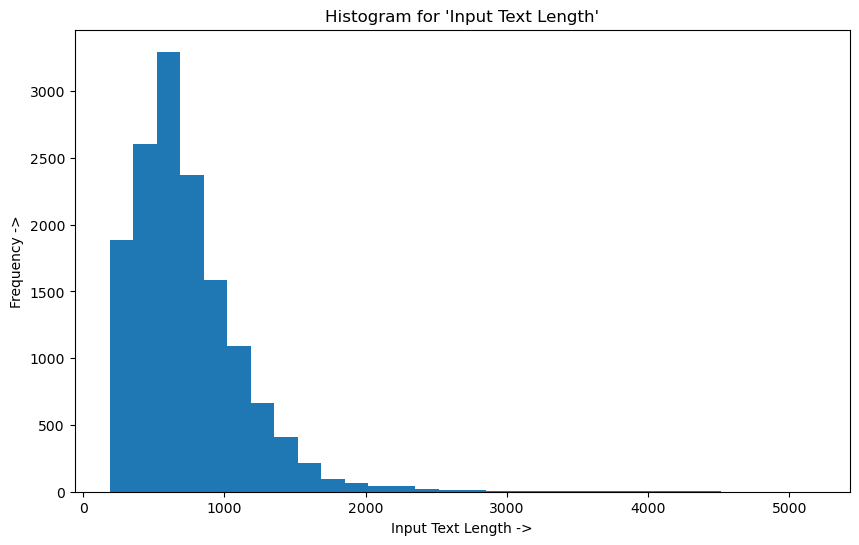

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_1["length_input"], bins=30)
plt.xlabel("Input Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Input Text Length'")
plt.show()

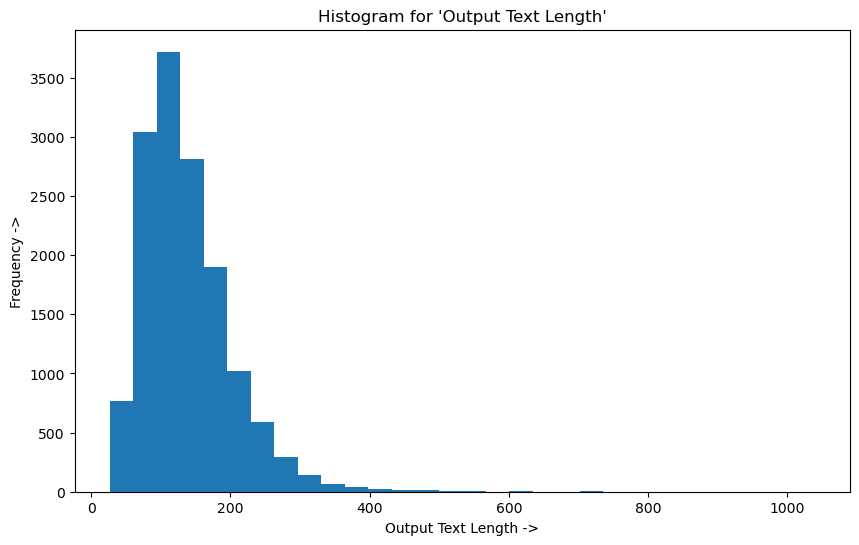

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_1["length_output"], bins=30)
plt.xlabel("Output Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Output Text Length'")
plt.show()

In [72]:
print(np.percentile(df_all_length_1["length_input"], 90))
print(np.percentile(df_all_length_1["length_output"], 99))

1228.0
340.8199999999997


In [73]:
# set the maximum length for the Input Conversation (training data) and the Output Summary (target)
max_input = 1024
max_target = 256

In [74]:
# train/validation/test split ratio
processing_train_split = 0.92
processing_valid_split = 0.04
processing_test_split = 0.04

In [75]:
hf1_t1 = hf_dataset_1_dict_merged.train_test_split(1 - processing_train_split, seed=var_seed)

hf1_t2 = hf1_t1['test'].train_test_split(
    processing_test_split / (processing_valid_split + processing_test_split), seed=var_seed)

hf1_t3 = DatasetDict(
    {
        "train": hf1_t1["train"],
        "validation": hf1_t2["train"],
        "test": hf1_t2["test"]
    }
)

In [76]:
rich_print(hf1_t3)

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 578
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 579
    })
})

#### Load sample conversation before tokenization

In [77]:
example_index = 40

sample_dialogue = hf1_t3["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf1_t3["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: I've never met anyone like Clyde before.
#Person2#: He's such a buppie-a black yuppie. Black people come in all shapes and sizes. Just check out the party.
#Person1#: Wow! There are so many different people here. I expected mostly athletes and rappers.
#Person2#: You'll find some of those here, too. But not if you don't shake it up! There's an African saying, ' If you can talk, you can sing! If you can walk, you can dance! '
#Person1#: Then I'll just shut up and sit down!

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# and #Person2# talk about black people at the party who are born to be good at singing and dancing.


In [78]:
%%time

# tokenize the data batches
def hf_tokenize_dialogsum_data(sample_batch, padding="max_length"):
    # generate prompts for training
    start_prompt = "Summarize the following conversation.\n\n"
    end_prompt = "\n\nSummary: "
    
    # model inputs
    model_inputs = [start_prompt + sample + end_prompt for sample in sample_batch["dialogue"]]
    
    # Input Conversation
    model_inputs = init_tokenizer(
        model_inputs, 
        max_length=max_input, 
        padding=padding, 
        truncation=True)
        
    # Output Summary
    # Tokenize labels with the `text_target` argument
    labels = init_tokenizer(
        text_target=sample_batch["summary"], 
        padding="max_length", 
        max_length=max_target, 
        truncation=True)
    
    # replace all tokenizer.pad_token_id in the labels by -100
    if padding == "max_length":
        labels["input_ids"] = [
            [(l if l != init_tokenizer.pad_token_id else -100) for l in temp_label] 
            for temp_label in labels["input_ids"]
        ]
    
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs
    
    
tokenized_hf1_t3 = hf1_t3.map(hf_tokenize_dialogsum_data, batched=True)
tokenized_hf1_t3 = tokenized_hf1_t3.remove_columns(['id', 'topic', 'dialogue', 'summary'])

CPU times: user 76.8 ms, sys: 13 μs, total: 76.8 ms
Wall time: 76.6 ms


In [79]:
rich_print(tokenized_hf1_t3)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

#### Load sample conversation after tokenization

In [80]:
example_index = 40

sample_dialogue = tokenized_hf1_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog Length:")
print(len(sample_dialogue))

print()

sample_baseline_summary = tokenized_hf1_t3["test"][example_index]["labels"]
print("-" * 100)
print("Baseline Summary Length:")
print(len(sample_baseline_summary))

----------------------------------------------------------------------------------------------------
Sample Dialog Length:
1024

----------------------------------------------------------------------------------------------------
Baseline Summary Length:
256


In [81]:
train_sample_percentage = 1.00

In [82]:
%%time

# sample the dataset for training
skip_inds = int(1 / train_sample_percentage)
sample_tokenized_hf1_dataset = tokenized_hf1_t3.filter(
    lambda example, indice: indice % skip_inds == 0, with_indices=True)

CPU times: user 6.09 ms, sys: 0 ns, total: 6.09 ms
Wall time: 5.95 ms


In [83]:
rich_print(sample_tokenized_hf1_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

### Merge different sets in 'SAMSum'. 

There are 3 sets, namely, 'train', 'validation', and 'test' in the 'SAMSum' dataset. We will merge them for model fine-tuning.

You can view the data here: https://huggingface.co/datasets/knkarthick/samsum

In [84]:
from datasets import concatenate_datasets
from datasets import DatasetDict

rich_print(hf_dataset_2_dict["train"].features)
rich_print(hf_dataset_2_dict["test"].features)
rich_print(hf_dataset_2_dict["validation"].features)

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

In [85]:
%%time

# Merge / Concatenate datasets
hf_dataset_2_dict_merged = concatenate_datasets([hf_dataset_2_dict["train"]
                                                 , hf_dataset_2_dict["test"]
                                                 , hf_dataset_2_dict["validation"]], axis=0)

rich_print(hf_dataset_2_dict_merged)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 16369
})

CPU times: user 4.21 ms, sys: 3 μs, total: 4.21 ms
Wall time: 4.03 ms


In [86]:
# shuffle
hf_dataset_2_dict_merged = hf_dataset_2_dict_merged.shuffle(seed=var_seed)

rich_print(hf_dataset_2_dict_merged)

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 16369
})

In [87]:
# check the length of input and output texts
all_input_length_2 = []
all_output_length_2 = []

# there is one sample where either the dialogue or the summary is missing
for sample in hf_dataset_2_dict_merged:
    if sample["dialogue"] is None or sample["summary"] is None:
        print(sample["id"])
    
    if sample["dialogue"] is not None and sample["summary"] is not None:
        all_input_length_2.append(len(sample["dialogue"]))
        all_output_length_2.append(len(sample["summary"]))
        
df_all_length_2 = pd.DataFrame([all_input_length_2, all_output_length_2]).T
df_all_length_2.columns = ["length_input", "length_output"]
rich_print(df_all_length_2.head(10))

13828807


length_input  length_output
0           120             66
1           194             99
2           675            225
3           510            136
4           408             67
5           154             43
6           740            140
7           236             46
8          1470            133
9          1219            177

In [88]:
# maximum length of the input conversation and the output summary
max(df_all_length_2["length_input"]), max(df_all_length_2["length_output"])

(5474, 300)

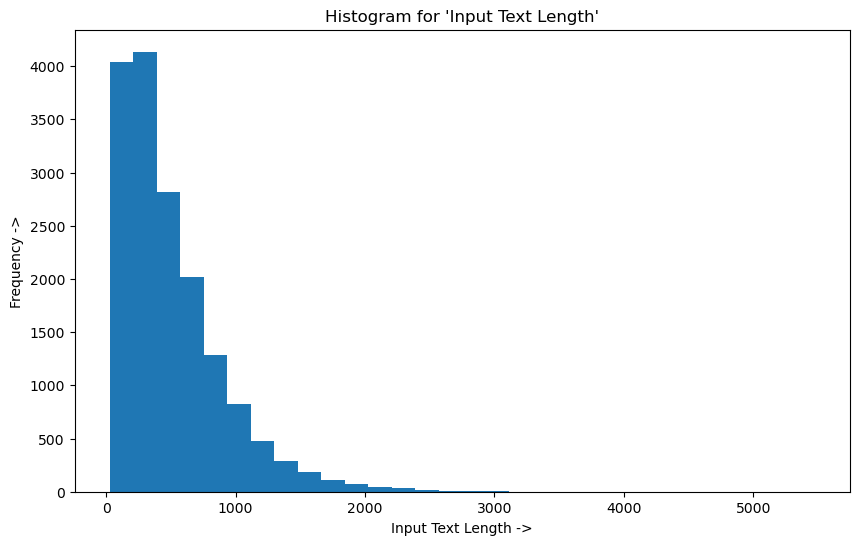

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_2["length_input"], bins=30)
plt.xlabel("Input Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Input Text Length'")
plt.show()

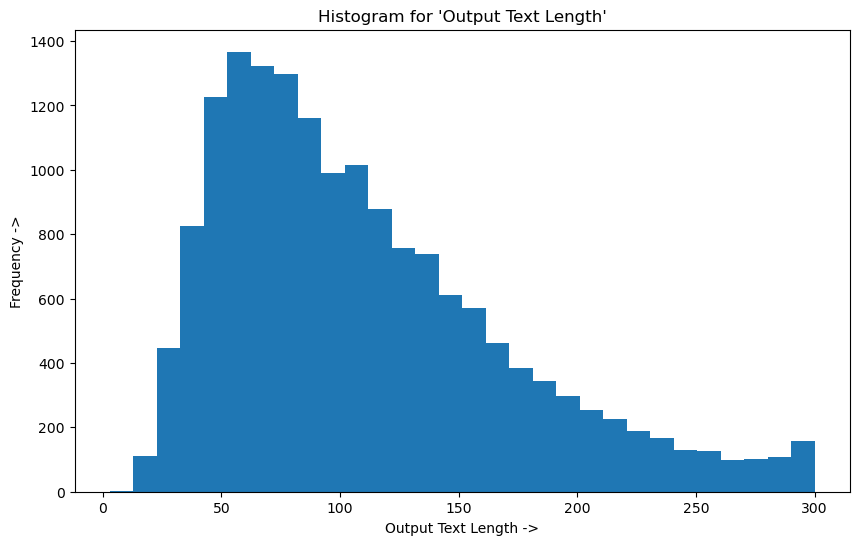

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_2["length_output"], bins=30)
plt.xlabel("Output Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Output Text Length'")
plt.show()

In [91]:
print(np.percentile(df_all_length_2["length_input"], 90))
print(np.percentile(df_all_length_2["length_output"], 99))

1017.0
290.0


In [92]:
# set the maximum length for the Input Conversation (training data) and the Output Summary (target)
max_input = 1024
max_target = 256

In [93]:
# train/validation/test split ratio
processing_train_split = 0.92
processing_valid_split = 0.04
processing_test_split = 0.04

In [94]:
%%time

hf_dataset_2_df_merged = pd.DataFrame(hf_dataset_2_dict_merged)
hf_dataset_2_df_merged.fillna("", inplace=True)

CPU times: user 1.15 s, sys: 29 μs, total: 1.15 s
Wall time: 1.15 s


In [95]:
hf_dataset_2_df_merged.shape

(16369, 3)

In [96]:
hf_dataset_2_df_merged.head()

,id,dialogue,summary
0,13864627,Mary: Are you going by car or train?\nTom: Ell...,"Ella rented a car, this makes things much fast..."
1,13730660,"Linden: Hi Litia, this is my new email linden@...",Linden has a new e-mail address linden@gmail.b...
2,13828264,Julie: How was Rome??\nJulie: I saw some pictu...,Martha had a hen party in Rome. She was there ...
3,13682264,Damian: Have a situation and need your help ma...,Damian's got a flat tyre on the corner of Coll...
4,13716803,Bob: Have you been to this new exhibition?\nDa...,"Bob, Daryl and Greg are going to the National ..."


In [97]:
# invalid sample. needs to be removed before tokenization
hf_dataset_2_df_merged[(hf_dataset_2_df_merged["dialogue"] == "") | (hf_dataset_2_df_merged["summary"] == "")]

,id,dialogue,summary
8278,13828807,,problem with visualization of the content


In [98]:
hf_dataset_2_df_merged = hf_dataset_2_df_merged[hf_dataset_2_df_merged["dialogue"] != ""]
# hf_dataset_2_df_merged.reset_index(drop=True, inplace=True)
hf_dataset_2_df_merged.index = hf_dataset_2_df_merged.id
hf_dataset_2_df_merged.drop(columns=["id"], inplace=True)

In [99]:
hf_dataset_2_df_merged.head()

,dialogue,summary
id,,
13864627,Mary: Are you going by car or train?\nTom: Ell...,"Ella rented a car, this makes things much fast..."
13730660,"Linden: Hi Litia, this is my new email linden@...",Linden has a new e-mail address linden@gmail.b...
13828264,Julie: How was Rome??\nJulie: I saw some pictu...,Martha had a hen party in Rome. She was there ...
13682264,Damian: Have a situation and need your help ma...,Damian's got a flat tyre on the corner of Coll...
13716803,Bob: Have you been to this new exhibition?\nDa...,"Bob, Daryl and Greg are going to the National ..."


In [100]:
hf_dataset_2_df_merged.shape

(16368, 2)

In [101]:
from datasets import Dataset

# convert dataframe to transformers Dataset format
hf_dataset_2_dict_merged = Dataset.from_pandas(hf_dataset_2_df_merged, info=None)

In [102]:
hf_dataset_2_dict_merged

Dataset({
    features: ['dialogue', 'summary', 'id'],
    num_rows: 16368
})

In [103]:
hf2_t1 = hf_dataset_2_dict_merged.train_test_split(1 - processing_train_split, seed=var_seed)

hf2_t2 = hf2_t1['test'].train_test_split(
    processing_test_split / (processing_valid_split + processing_test_split), seed=var_seed)

hf2_t3 = DatasetDict(
    {
        "train": hf2_t1["train"],
        "validation": hf2_t2["train"],
        "test": hf2_t2["test"]
    }
)

In [104]:
rich_print(hf2_t3)

DatasetDict({
    train: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 655
    })
    test: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 655
    })
})

#### Load sample conversation before tokenization

In [105]:
example_index = 40

sample_dialogue = hf2_t3["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf2_t3["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
Terry: Are you coming to the pub with us tonight?
Doris: I can't.
Terry: Why?
Doris: I'm studying. I have an exam tomorrow.
Terry: Right, you told me, I forgot. Sorry.
Doris: It's fine :)
Terry: OK, so I let you study then!
Doris: Thx and have a good time!
Terry: Thank you! Good luck tomorrow!
Doris: Thx!
Terry: Hi, how was the exam?
Doris: Fine. 
Terry: Did you pass?
Doris: YES!!!!!!
Terry: Congratulations! 
Terry: We have to celebrate it! How about a beer or two? ;)
Doris: Sounds perfect!...
Terry: :) What time are you free?
Doris: In an hour or so in fact :) And you?
Terry: I can meet in two hours.
Doris: Great! Usual place?
Terry: Yes. Unless you want to try something new?
Doris: Oh no! The last "let's try somethign new" was such a disaster...
Terry: You've got a point there. 
Terry: So see you at 7:00?
Doris: see u!

--------------------------------------------------

In [106]:
%%time

# tokenize the data batches
def hf_tokenize_samsum_data(sample_batch, padding="max_length"):
    # generate prompts for training
    start_prompt = "Summarize the following conversation.\n\n"
    end_prompt = "\n\nSummary: "
    
    # model inputs
    model_inputs = [start_prompt + sample + end_prompt for sample in sample_batch["dialogue"]]
    
    # Input Conversation
    model_inputs = init_tokenizer(
        model_inputs, 
        max_length=max_input, 
        padding=padding, 
        truncation=True)
        
    # Output Summary
    # Tokenize labels with the `text_target` argument
    labels = init_tokenizer(
        text_target=sample_batch["summary"], 
        padding="max_length", 
        max_length=max_target, 
        truncation=True)
    
    # replace all tokenizer.pad_token_id in the labels by -100
    if padding == "max_length":
        labels["input_ids"] = [
            [(l if l != init_tokenizer.pad_token_id else -100) for l in temp_label] 
            for temp_label in labels["input_ids"]
        ]
    
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs
    
    
tokenized_hf2_t3 = hf2_t3.map(hf_tokenize_samsum_data, batched=True)
tokenized_hf2_t3 = tokenized_hf2_t3.remove_columns(['id', 'dialogue', 'summary'])

Map:   0%|          | 0/15058 [00:00<?, ? examples/s]

Map:   0%|          | 0/655 [00:00<?, ? examples/s]

Map:   0%|          | 0/655 [00:00<?, ? examples/s]

CPU times: user 17.6 s, sys: 380 ms, total: 18 s
Wall time: 17.9 s


In [107]:
rich_print(tokenized_hf2_t3)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

#### Load sample conversation after tokenization

In [108]:
example_index = 40

sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog Length:")
print(len(sample_dialogue))

print()

sample_baseline_summary = tokenized_hf2_t3["test"][example_index]["labels"]
print("-" * 100)
print("Baseline Summary Length:")
print(len(sample_baseline_summary))

----------------------------------------------------------------------------------------------------
Sample Dialog Length:
1024

----------------------------------------------------------------------------------------------------
Baseline Summary Length:
256


In [109]:
train_sample_percentage = 1.00

In [110]:
%%time

# sample the dataset for training
skip_inds = int(1 / train_sample_percentage)
sample_tokenized_hf2_dataset = tokenized_hf2_t3.filter(
    lambda example, indice: indice % skip_inds == 0, with_indices=True)

Filter:   0%|          | 0/15058 [00:00<?, ? examples/s]

Filter:   0%|          | 0/655 [00:00<?, ? examples/s]

Filter:   0%|          | 0/655 [00:00<?, ? examples/s]

CPU times: user 14.9 s, sys: 72.1 ms, total: 15 s
Wall time: 15 s


In [111]:
rich_print(sample_tokenized_hf2_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

---

# Merge datasets: 'DialogSum' and 'SAMSum'

---

In [112]:
# DialogSum
rich_print(sample_tokenized_hf1_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

In [113]:
# SAMSum
rich_print(sample_tokenized_hf2_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

In [114]:
# Merge / Concatenate train sets from both datasets
sample_tokenized_hf_dataset_train = concatenate_datasets([sample_tokenized_hf1_dataset["train"]
                                                    , sample_tokenized_hf2_dataset["train"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_train = sample_tokenized_hf_dataset_train.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_train)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 28361
})

In [115]:
# Merge / Concatenate validation sets from both datasets
sample_tokenized_hf_dataset_valid = concatenate_datasets([sample_tokenized_hf1_dataset["validation"]
                                                    , sample_tokenized_hf2_dataset["validation"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_valid = sample_tokenized_hf_dataset_valid.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_valid)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1233
})

In [116]:
# Merge / Concatenate test sets from both datasets
sample_tokenized_hf_dataset_test = concatenate_datasets([sample_tokenized_hf1_dataset["test"]
                                                    , sample_tokenized_hf2_dataset["test"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_test = sample_tokenized_hf_dataset_test.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_test)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1234
})

#### Prepare the final Dataset Dictionary for train/validation/test sets

In [117]:
%%time

sample_tokenized_hf_dataset = datasets.DatasetDict({"train": sample_tokenized_hf_dataset_train
                                                    , "validation": sample_tokenized_hf_dataset_valid
                                                    , "test": sample_tokenized_hf_dataset_test})

# shuffle
sample_tokenized_hf_dataset = sample_tokenized_hf_dataset.shuffle(seed=var_seed)

CPU times: user 4.66 ms, sys: 10 μs, total: 4.67 ms
Wall time: 4.26 ms


In [118]:
rich_print(sample_tokenized_hf_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 28361
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1234
    })
})

In [119]:
## Freeze original model weights
# not needed as we are calling the method 'prepare_model_for_kbit_training()' from 'peft' library 
"""
for param in init_model.parameters():
    param.requires_grad = False
    
    # cast small parameters to float32 for stability
    if param.ndim == 1:
        param.data = param.data.to(torch.float32)
        
init_model.gradient_checkpointing_enable()
init_model.enable_input_require_grads()

class CastOutputToFloat(nn.Sequential):
    def forward(self, x):
        return super().forward(x).to(torch.float32)
    
init_model.lm_head = CastOutputToFloat(init_model.lm_head)
"""

'\nfor param in init_model.parameters():\n    param.requires_grad = False\n    \n    # cast small parameters to float32 for stability\n    if param.ndim == 1:\n        param.data = param.data.to(torch.float32)\n        \ninit_model.gradient_checkpointing_enable()\ninit_model.enable_input_require_grads()\n\nclass CastOutputToFloat(nn.Sequential):\n    def forward(self, x):\n        return super().forward(x).to(torch.float32)\n    \ninit_model.lm_head = CastOutputToFloat(init_model.lm_head)\n'

---

# Model Fine-tuning

---

Reference: https://github.com/huggingface/peft/blob/main/README.md

In [120]:
# model parameters
epochs = 5
learning_rate = 2e-4
weight_decay = 0.01
train_batch_size = 4
valid_batch_size = 4
test_batch_size = 4
batch_size = 1

# LoRA parameters
# the dimension of the low-rank matrices
d_lr = 16
# the scaling factor for the low-rank matrices
alpha_scale = 32
# the dropout probability of the LoRA layers
lora_dropout_rate = 0.05

lora_target_modules = ["q_proj", "v_proj"]

In [121]:
from peft import LoraConfig, get_peft_model, TaskType, prepare_model_for_kbit_training

lora_config = LoraConfig(
    r=d_lr,
    lora_alpha=alpha_scale,
    target_modules=lora_target_modules,
    lora_dropout=lora_dropout_rate,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM
)

# prepare a LoRA model for training
# https://github.com/huggingface/peft/blob/main/src/peft/utils/other.py
peft_model = prepare_model_for_kbit_training(init_model)

peft_model = get_peft_model(peft_model, lora_config)
peft_model.print_trainable_parameters()

trainable params: 2,359,296 || all params: 408,650,752 || trainable%: 0.5773


In [122]:
# ignore tokenizer pad token in the loss
label_pad_token_id = -100

data_collator = transformers.DataCollatorForSeq2Seq(
    init_tokenizer, 
    model=peft_model,
    label_pad_token_id=label_pad_token_id,
    # pad_to_multiple_of=8
)

In [123]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=model_save_local_dir + "/checkpoints",
    overwrite_output_dir=True,
    # fp16=True,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=learning_rate,
    num_train_epochs=epochs,
    per_device_train_batch_size=train_batch_size,
    per_device_eval_batch_size=valid_batch_size,
    warmup_steps=10,
    weight_decay=weight_decay, 
    report_to="tensorboard"
)

In [124]:
trainer = Trainer(
    model=peft_model,
    tokenizer=init_tokenizer,
    args=training_args,
    train_dataset=sample_tokenized_hf_dataset["train"],
    eval_dataset=sample_tokenized_hf_dataset["validation"],
    data_collator=data_collator,
)

In [125]:
peft_model.config.use_cache = False

In [126]:
print(f"Memory Requirement: {np.round(peft_model.get_memory_footprint() / 1e9, 2)} GB")

Memory Requirement: 1.63 GB


In [127]:
print(f"Model Size: {np.round(peft_model.num_parameters() / 1e6, 1)} Million paramters")

Model Size: 408.7 Million paramters


In [128]:
model_flops = (
    peft_model.floating_point_ops(
        {
            "input_ids": torch.zeros(
                (1, max_input)
            )
        }
    ) * training_args.gradient_accumulation_steps
)

print(f"GFLOPs:  {model_flops / 1e9}")

GFLOPs:  2181.600116736


## Start training

In [129]:
%%time

trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.425400,1.279596
2,1.314600,1.255348
3,1.264700,1.237608
4,1.228600,1.233925
5,1.202900,1.222917


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


CPU times: user 40d 18h 33min 54s, sys: 2d 2h 51min 50s, total: 42d 21h 25min 45s
Wall time: 1d 20h 9min 18s


TrainOutput(global_step=35455, training_loss=1.2872408687068115, metrics={'train_runtime': 158958.7983, 'train_samples_per_second': 0.892, 'train_steps_per_second': 0.223, 'total_flos': 3.093618045537485e+17, 'train_loss': 1.2872408687068115, 'epoch': 5.0})

## Save the fine-tuned model

In [130]:
print(model_save_local_dir)

HF-LLM-FINETUNE/facebook_bart-large_dialogsum_samsum


In [131]:
%%time

trainer.save_model(model_save_local_dir + "/fined_tuned_lora_peft")
# trainer.model.config.save_pretrained(model_save_local_dir)

CPU times: user 140 ms, sys: 15.8 ms, total: 156 ms
Wall time: 186 ms


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [132]:
%%time

# trainer.model.save_pretrained(model_save_local_dir + "/fined_tuned_lora_peft")

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 13.6 μs


## Load the fine-tuned model

In [133]:
%%time

ft_model = AutoModelForSeq2SeqLM.from_pretrained(model_save_local_dir + "/fined_tuned_lora_peft", local_files_only=True)

CPU times: user 6.52 s, sys: 263 ms, total: 6.78 s
Wall time: 4.14 s


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [134]:
rich_print(init_tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large', vocab_size=50265, model_max_length=1024, is_fast=True, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': 
AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, 
clean_up_tokenization_spaces=True)

In [135]:
len(init_tokenizer)

50265

In [136]:
rich_print(ft_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): lora.Linear(
              (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
              (lora_dropout): ModuleDict(
                (default): Dropout(p=0.05, inplace=False)
              )
              (lora_A): ModuleDict(
                (default): Linear(in_features=1024, out_features=16, bias=False)
              )
              (lora_B): ModuleDict(
                (default): Linear(in_features=16, out_features=1024, bias=False)
              )
              (lora_embedding_A): ParameterDict()
              (lora_embedding_B): ParameterDict()
              (lora_magnitude_vector): ModuleDict()
            )
            (q_proj): lora.Linear(
              (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
              (lora_dropout): ModuleDict(
                (default): Dropout(p=0.05, inplace=False)
              )
              (lora_A): ModuleDict(
                (default): Linear(in_features=1024, out_features=16, bias=False)
              )
              (lora_B): ModuleDict(
                (default): Linear(in_features=16, out_features=1024, bias=False)
              )
              (lora_embedding_A): ParameterDict()
              (lora_embedding_B): ParameterDict()
              (lora_magnitude_vector): ModuleDict()
            )
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): lora.Linear(
              (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
              (lora_dropout): ModuleDict(
                (default): Dropout(p=0.05, inplace=False)
              )
              (lora_A): ModuleDict(
                (default): Linear(in_features=1024, out_features=16, bias=False)
              )
              (lora_B): ModuleDict(
                (default): Linear(in_features=16, out_features=1024, bias=False)
              )
              (lora_embedding_A): ParameterDict()
              (lora_embedding_B): ParameterDict()
              (lora_magnitude_vector): ModuleDict()
            )
            (q_proj): lora.Linear(
              (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
              (lora_dropout): ModuleDict(
                (default): Dropout(p=0.05, inplace=False)
              )
              (lora_A): ModuleDict(
                (default): Linear(in_features=1024, out_features=16, bias=False)
              )
              (lora_B): ModuleDict(
                (default): Linear(in_features=16, out_features=1024, bias=False)
              )
              (lora_embedding_A): ParameterDict()
              (lora_embedding_B): ParameterDict()
              (lora_magnitude_vector): ModuleDict()
         

### Load the base model again

In [137]:
%%time

# Load the tokenizer
init_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Load the model
init_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

CPU times: user 6.48 s, sys: 224 ms, total: 6.71 s
Wall time: 4.11 s


In [138]:
rich_print(init_tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large', vocab_size=50265, model_max_length=1024, is_fast=True, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': 
AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, 
clean_up_tokenization_spaces=True)

In [139]:
len(init_tokenizer)

50265

In [140]:
rich_print(init_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): GELUActivation()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
  )
  (lm_head): Linear(in_features=1024, out_features=50265, bias=False)
)

#### Load sample conversation for testing

In [141]:
example_index = 40

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.


In [142]:
sample_input_ids = init_tokenizer(sample_dialogue,  padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    rich_print(sample_input_ids)

{
    'input_ids': tensor([[    0, 10431, 41761,  ...,     1,     1,     1]]),
    'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])
}

#### With base model

In [143]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   653,    86,    16,
            24,     6,  1560,   116, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4,    38,   531,    28,   160,   122,     4,    20, 10780,
          1992,    16,   182,   593,     4,    85,   351,    75,   185,    55,
            87, 10328,   728,     7,   120,    89,     4,    38,   581,   972,
            47,    89,    23,  1117,    12,   212, 32430,     6,   114,    47,
           218,    75,  1508,     4, 10431, 41761,   288, 10431,    35,    85,
            18,   350,   628,     6,  1560,     6,    38,   437,  6661,    59,
            14,     4,    38,    56,   117,  1114,    24,    21,    98,   628,
             2]])

In [144]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: What time is it, Tom?#Person2#: Just a minute. It's ten to nine by my watch. I must be off now. The 
railway station is very close. It won't take more than twenty minutes to get there. I'll meet you there at 
nine-thirty, if you don't mind.#Person0#: It's too late, Tom, I'm sorry about that. I had no idea it was so late

#### With fine-tuned model

In [145]:
outputs = ft_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0,     0, 15691,  3026,   849, 41761,   134, 10431,    24,
            18,  2724,     7,  1117,     8,   849, 41761,   176, 10431,  3026,
           123,     7,  2916,     5,  1117,    12,   212, 32430,  2341,     7,
             5, 10780,  1992,     4,     2]])

In [146]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

Tom tells #Person1# it's ten to nine and #Person2# tells him to catch the nine-thirty train to the railway station.

#### Load another sample conversation for testing

In [147]:
example_index = 80

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: May, do you mind helping me prepare for the picnic?
#Person2#: Sure. Have you checked the weather report?
#Person1#: Yes. It says it will be sunny all day. No sign of rain at all. This is your father's favorite sausage. Sandwiches for you and Daniel.
#Person2#: No, thanks Mom. I'd like some toast and chicken wings.
#Person1#: Okay. Please take some fruit salad and crackers for me.
#Person2#: Done. Oh, don't forget to take napkins disposable plates, cups and picnic blanket.
#Person1#: All set. May, can you help me take all these things to the living room?
#Person2#: Yes, madam.
#Person1#: Ask Daniel to give you a hand?
#Person2#: No, mom, I can manage it by myself. His help just causes more trouble.

----------------------------------------------------------------------------------------------------
Baseline Summary:
Mom asks May to help to prepare for the picni

In [148]:
sample_input_ids = init_tokenizer(sample_dialogue,  padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    rich_print(sample_input_ids)

{
    'input_ids': tensor([[    0, 10431, 41761,  ...,     1,     1,     1]]),
    'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])
}

#### With base model

In [149]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   392,     6,   109,
            47,  1508,  1903,   162,  3886,    13,     5, 22297,   116, 50095,
         10431, 41761,   176, 10431,    35,  9136,     4,    38,  1017,   101,
           103, 20260,     8,  5884, 11954,     4,   152,    16,   110,  1150,
            18,  2674, 23753,     4,  3401,   185,   103,  6231, 13153,     8,
          7009,   268,    13,   162,     4,  4219, 33127,  5065,    13,    47,
             8,  3028,     4,  5534,     6,   218,    75,  4309,     7,   185,
         16159,  7327, 22400, 12957,     6, 12988,     8, 22297, 14165,     4,
          6319,    47,  7869,     5,  1650,   266,   116, 50249, 10431, 41761,
           246, 10431,    35,  3216,     4,    85,   161,    24,    40,    28,
             2]])

In [150]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: May, do you mind helping me prepare for the picnic?�#Person2#: Sure. I'd like some toast and chicken 
wings. This is your father's favorite sausage. Please take some fruit salad and crackers for me. Sandwiches for you
and Daniel. Oh, don't forget to take napkins disposable plates, cups and picnic blanket. Have you checked the 
weather report?                #Person3#: Yes. It says it will be

#### With fine-tuned model

In [151]:
outputs = ft_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0,     0, 10004,  2607,    69,  3795,  3886,    13,     5,
         22297,     4,   392,  6990,    69,  3795,     7,   185,   103,  6231,
         13153,     6,  7009,   268,     6,  6231, 13153,     8,  7009,   268,
            13,    69,     8,   103, 19072,    13,   392,     8,  3028,     4,
           392,    40,   244,    69,  3795,   185,    70,     5,   383,     7,
             5,  1207,   929,     4,     2]])

In [152]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

May helps her mom prepare for the picnic. May asks her mom to take some fruit salad, crackers, fruit salad and 
crackers for her and some sandwiches for May and Daniel. May will help her mom take all the things to the living 
room.

## Start Evaluation

In [153]:
metric_rouge = evaluate.load('rouge')

In [154]:
sample_tokenized_hf_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 28361
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1234
    })
})

In [155]:
%%time

# number of random samples to fetch
n_samples_eval = -1
dataset_use_eval = 'test'

# sample the dataset for training

if n_samples_eval == -1:
    n_samples_eval = len(sample_tokenized_hf_dataset["test"])

samples_eval = sample_tokenized_hf_dataset["test"].filter(
        lambda example, indice: indice < n_samples_eval, with_indices=True)

Filter:   0%|          | 0/1234 [00:00<?, ? examples/s]

CPU times: user 1.16 s, sys: 8.26 ms, total: 1.17 s
Wall time: 1.16 s


In [156]:
samples_eval

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1234
})

In [157]:
max_target

256

In [158]:
def eval_model(model_input, model_type, max_token_length=256):
    # generate summary using the expected model
    
    if model_type == "base":
        # print("base")
        # evaluate using base model
        model_output = init_model.generate(torch.tensor([model_input["input_ids"]]), max_new_tokens=max_token_length)
    elif model_type == "ft":
        # print("ft")
        # evalulate using fine-tuned model
        model_output = ft_model.generate(torch.tensor([model_input["input_ids"]]), max_new_tokens=max_token_length)
    else:
        return
    sample_preds = init_tokenizer.decode(model_output[0], skip_special_tokens=True)
    
    # decode the reference label (human label)
    # Replace -100 in the labels as we can't decode them.
    labels = np.array(model_input["labels"])
    labels = np.where(labels == -100, init_tokenizer.pad_token_id, labels)
    sample_labels = init_tokenizer.decode(labels, skip_special_tokens=True)
    
    return sample_preds, sample_labels

#### Base model

In [159]:
init_model_summaries = []
human_baseline_summaries = []

for sample in tqdm(samples_eval):
    p, r = eval_model(sample, "base", max_target)
    init_model_summaries.append(p)
    human_baseline_summaries.append(r)

  0%|                                                                                             | 0/1234 [00:00<?, ?it/s]

  0%|                                                                                   | 1/1234 [00:09<3:25:02,  9.98s/it]

  0%|▏                                                                                  | 2/1234 [00:19<3:23:17,  9.90s/it]

  0%|▏                                                                                  | 3/1234 [00:29<3:22:55,  9.89s/it]

  0%|▎                                                                                  | 4/1234 [00:39<3:22:34,  9.88s/it]

  0%|▎                                                                                  | 5/1234 [00:49<3:21:59,  9.86s/it]

  0%|▍                                                                                  | 6/1234 [00:59<3:21:45,  9.86s/it]

  1%|▍                                                                                  | 7/1234 [01:09<3:21:20,  9.85s/it]

  1%|▌                                                                                  | 8/1234 [01:18<3:21:00,  9.84s/it]

  1%|▌                                                                                  | 9/1234 [01:28<3:20:49,  9.84s/it]

  1%|▋                                                                                 | 10/1234 [01:38<3:20:40,  9.84s/it]

  1%|▋                                                                                 | 11/1234 [01:48<3:20:26,  9.83s/it]

  1%|▊                                                                                 | 12/1234 [01:55<3:02:30,  8.96s/it]

  1%|▊                                                                                 | 13/1234 [02:02<2:50:09,  8.36s/it]

  1%|▉                                                                                 | 14/1234 [02:12<3:00:32,  8.88s/it]

  1%|▉                                                                                 | 15/1234 [02:22<3:06:29,  9.18s/it]

  1%|█                                                                                 | 16/1234 [02:32<3:11:06,  9.41s/it]

  1%|█▏                                                                                | 17/1234 [02:42<3:13:42,  9.55s/it]

  1%|█▏                                                                                | 18/1234 [02:51<3:15:23,  9.64s/it]

  2%|█▎                                                                                | 19/1234 [03:01<3:16:18,  9.69s/it]

  2%|█▎                                                                                | 20/1234 [03:06<2:47:59,  8.30s/it]

  2%|█▍                                                                                | 21/1234 [03:16<2:57:16,  8.77s/it]

  2%|█▍                                                                                | 22/1234 [03:26<3:03:46,  9.10s/it]

  2%|█▌                                                                                | 23/1234 [03:31<2:39:24,  7.90s/it]

  2%|█▌                                                                                | 24/1234 [03:41<2:50:53,  8.47s/it]

  2%|█▋                                                                                | 25/1234 [03:51<2:59:01,  8.88s/it]

  2%|█▋                                                                                | 26/1234 [04:01<3:04:33,  9.17s/it]

  2%|█▊                                                                                | 27/1234 [04:10<3:08:21,  9.36s/it]

  2%|█▊                                                                                | 28/1234 [04:20<3:11:04,  9.51s/it]

  2%|█▉                                                                                | 29/1234 [04:30<3:12:46,  9.60s/it]

  2%|█▉                                                                                | 30/1234 [04:40<3:14:00,  9.67s/it]

  3%|██                                                                                | 31/1234 [04:50<3:15:08,  9.73s/it]

  3%|██▏                                                                               | 32/1234 [05:00<3:16:04,  9.79s/it]

  3%|██▏                                                                               | 33/1234 [05:10<3:18:57,  9.94s/it]

  3%|██▎                                                                               | 34/1234 [05:20<3:18:24,  9.92s/it]

  3%|██▎                                                                               | 35/1234 [05:30<3:17:40,  9.89s/it]

  3%|██▍                                                                               | 36/1234 [05:40<3:17:20,  9.88s/it]

  3%|██▍                                                                               | 37/1234 [05:49<3:16:53,  9.87s/it]

  3%|██▌                                                                               | 38/1234 [05:59<3:16:36,  9.86s/it]

  3%|██▌                                                                               | 39/1234 [06:02<2:34:01,  7.73s/it]

  3%|██▋                                                                               | 40/1234 [06:12<2:46:28,  8.37s/it]

  3%|██▋                                                                               | 41/1234 [06:22<2:55:06,  8.81s/it]

  3%|██▊                                                                               | 42/1234 [06:32<3:01:15,  9.12s/it]

  3%|██▊                                                                               | 43/1234 [06:41<3:05:32,  9.35s/it]

  4%|██▉                                                                               | 44/1234 [06:51<3:08:10,  9.49s/it]

  4%|██▉                                                                               | 45/1234 [07:01<3:10:03,  9.59s/it]

  4%|███                                                                               | 46/1234 [07:09<3:00:10,  9.10s/it]

  4%|███                                                                               | 47/1234 [07:19<3:04:31,  9.33s/it]

  4%|███▏                                                                              | 48/1234 [07:29<3:07:18,  9.48s/it]

  4%|███▎                                                                              | 49/1234 [07:39<3:09:25,  9.59s/it]

  4%|███▎                                                                              | 50/1234 [07:47<3:04:12,  9.33s/it]

  4%|███▍                                                                              | 51/1234 [07:57<3:07:03,  9.49s/it]

  4%|███▍                                                                              | 52/1234 [08:07<3:08:50,  9.59s/it]

  4%|███▌                                                                              | 53/1234 [08:17<3:10:16,  9.67s/it]

  4%|███▌                                                                              | 54/1234 [08:27<3:11:09,  9.72s/it]

  4%|███▋                                                                              | 55/1234 [08:37<3:11:32,  9.75s/it]

  5%|███▋                                                                              | 56/1234 [08:46<3:12:09,  9.79s/it]

  5%|███▊                                                                              | 57/1234 [08:56<3:12:25,  9.81s/it]

  5%|███▊                                                                              | 58/1234 [09:06<3:12:26,  9.82s/it]

  5%|███▉                                                                              | 59/1234 [09:16<3:12:40,  9.84s/it]

  5%|███▉                                                                              | 60/1234 [09:26<3:12:46,  9.85s/it]

  5%|████                                                                              | 61/1234 [09:36<3:12:33,  9.85s/it]

  5%|████                                                                              | 62/1234 [09:46<3:12:32,  9.86s/it]

  5%|████▏                                                                             | 63/1234 [09:55<3:12:23,  9.86s/it]

  5%|████▎                                                                             | 64/1234 [10:05<3:12:04,  9.85s/it]

  5%|████▎                                                                             | 65/1234 [10:15<3:11:58,  9.85s/it]

  5%|████▍                                                                             | 66/1234 [10:25<3:11:38,  9.84s/it]

  5%|████▍                                                                             | 67/1234 [10:32<2:53:46,  8.93s/it]

  6%|████▌                                                                             | 68/1234 [10:42<2:58:47,  9.20s/it]

  6%|████▌                                                                             | 69/1234 [10:51<3:02:24,  9.39s/it]

  6%|████▋                                                                             | 70/1234 [11:01<3:06:03,  9.59s/it]

  6%|████▋                                                                             | 71/1234 [11:12<3:09:34,  9.78s/it]

  6%|████▊                                                                             | 72/1234 [11:22<3:09:57,  9.81s/it]

  6%|████▊                                                                             | 73/1234 [11:31<3:09:59,  9.82s/it]

  6%|████▉                                                                             | 74/1234 [11:41<3:10:03,  9.83s/it]

  6%|████▉                                                                             | 75/1234 [11:51<3:09:57,  9.83s/it]

  6%|█████                                                                             | 76/1234 [12:01<3:09:53,  9.84s/it]

  6%|█████                                                                             | 77/1234 [12:11<3:10:04,  9.86s/it]

  6%|█████▏                                                                            | 78/1234 [12:21<3:10:00,  9.86s/it]

  6%|█████▏                                                                            | 79/1234 [12:31<3:09:55,  9.87s/it]

  6%|█████▎                                                                            | 80/1234 [12:41<3:09:56,  9.88s/it]

  7%|█████▍                                                                            | 81/1234 [12:50<3:09:45,  9.87s/it]

  7%|█████▍                                                                            | 82/1234 [13:00<3:09:29,  9.87s/it]

  7%|█████▌                                                                            | 83/1234 [13:08<2:57:55,  9.28s/it]

  7%|█████▌                                                                            | 84/1234 [13:18<3:01:11,  9.45s/it]

  7%|█████▋                                                                            | 85/1234 [13:28<3:03:25,  9.58s/it]

  7%|█████▋                                                                            | 86/1234 [13:38<3:04:53,  9.66s/it]

  7%|█████▊                                                                            | 87/1234 [13:48<3:05:42,  9.71s/it]

  7%|█████▊                                                                            | 88/1234 [13:57<3:06:38,  9.77s/it]

  7%|█████▉                                                                            | 89/1234 [14:08<3:12:17, 10.08s/it]

  7%|█████▉                                                                            | 90/1234 [14:18<3:10:50, 10.01s/it]

  7%|██████                                                                            | 91/1234 [14:28<3:09:57,  9.97s/it]

  7%|██████                                                                            | 92/1234 [14:38<3:09:14,  9.94s/it]

  8%|██████▏                                                                           | 93/1234 [14:48<3:08:39,  9.92s/it]

  8%|██████▏                                                                           | 94/1234 [14:58<3:08:08,  9.90s/it]

  8%|██████▎                                                                           | 95/1234 [15:02<2:39:19,  8.39s/it]

  8%|██████▍                                                                           | 96/1234 [15:12<2:47:24,  8.83s/it]

  8%|██████▍                                                                           | 97/1234 [15:22<2:53:04,  9.13s/it]

  8%|██████▌                                                                           | 98/1234 [15:32<2:57:04,  9.35s/it]

  8%|██████▌                                                                           | 99/1234 [15:42<2:59:57,  9.51s/it]

  8%|██████▌                                                                          | 100/1234 [15:44<2:18:56,  7.35s/it]

  8%|██████▋                                                                          | 101/1234 [15:54<2:32:57,  8.10s/it]

  8%|██████▋                                                                          | 102/1234 [16:04<2:42:35,  8.62s/it]

  8%|██████▊                                                                          | 103/1234 [16:14<2:49:28,  8.99s/it]

  8%|██████▊                                                                          | 104/1234 [16:17<2:14:46,  7.16s/it]

  9%|██████▉                                                                          | 105/1234 [16:26<2:29:52,  7.96s/it]

  9%|██████▉                                                                          | 106/1234 [16:30<2:06:03,  6.70s/it]

  9%|███████                                                                          | 107/1234 [16:37<2:08:43,  6.85s/it]

  9%|███████                                                                          | 108/1234 [16:47<2:25:27,  7.75s/it]

  9%|███████▏                                                                         | 109/1234 [16:57<2:37:05,  8.38s/it]

  9%|███████▏                                                                         | 110/1234 [17:07<2:47:44,  8.95s/it]

  9%|███████▎                                                                         | 111/1234 [17:17<2:52:40,  9.23s/it]

  9%|███████▎                                                                         | 112/1234 [17:27<2:55:58,  9.41s/it]

  9%|███████▍                                                                         | 113/1234 [17:37<2:58:11,  9.54s/it]

  9%|███████▍                                                                         | 114/1234 [17:47<2:59:52,  9.64s/it]

  9%|███████▌                                                                         | 115/1234 [17:57<3:00:55,  9.70s/it]

  9%|███████▌                                                                         | 116/1234 [18:07<3:02:08,  9.77s/it]

  9%|███████▋                                                                         | 117/1234 [18:17<3:02:32,  9.81s/it]

 10%|███████▋                                                                         | 118/1234 [18:26<3:02:22,  9.81s/it]

 10%|███████▊                                                                         | 119/1234 [18:36<3:02:33,  9.82s/it]

 10%|███████▉                                                                         | 120/1234 [18:46<3:02:32,  9.83s/it]

 10%|███████▉                                                                         | 121/1234 [18:56<3:02:24,  9.83s/it]

 10%|████████                                                                         | 122/1234 [19:06<3:02:34,  9.85s/it]

 10%|████████                                                                         | 123/1234 [19:16<3:02:37,  9.86s/it]

 10%|████████▏                                                                        | 124/1234 [19:25<3:02:15,  9.85s/it]

 10%|████████▏                                                                        | 125/1234 [19:35<3:02:07,  9.85s/it]

 10%|████████▎                                                                        | 126/1234 [19:45<3:02:02,  9.86s/it]

 10%|████████▎                                                                        | 127/1234 [19:55<3:02:10,  9.87s/it]

 10%|████████▍                                                                        | 128/1234 [20:05<3:04:30, 10.01s/it]

 10%|████████▍                                                                        | 129/1234 [20:15<3:03:36,  9.97s/it]

 11%|████████▌                                                                        | 130/1234 [20:25<3:02:46,  9.93s/it]

 11%|████████▌                                                                        | 131/1234 [20:35<3:03:07,  9.96s/it]

 11%|████████▋                                                                        | 132/1234 [20:45<3:02:21,  9.93s/it]

 11%|████████▋                                                                        | 133/1234 [20:55<3:01:46,  9.91s/it]

 11%|████████▊                                                                        | 134/1234 [21:00<2:36:38,  8.54s/it]

 11%|████████▊                                                                        | 135/1234 [21:10<2:43:24,  8.92s/it]

 11%|████████▉                                                                        | 136/1234 [21:20<2:48:15,  9.19s/it]

 11%|████████▉                                                                        | 137/1234 [21:30<2:51:43,  9.39s/it]

 11%|█████████                                                                        | 138/1234 [21:40<2:54:10,  9.54s/it]

 11%|█████████                                                                        | 139/1234 [21:49<2:55:41,  9.63s/it]

 11%|█████████▏                                                                       | 140/1234 [21:59<2:56:43,  9.69s/it]

 11%|█████████▎                                                                       | 141/1234 [22:09<2:57:26,  9.74s/it]

 12%|█████████▎                                                                       | 142/1234 [22:19<2:57:57,  9.78s/it]

 12%|█████████▍                                                                       | 143/1234 [22:29<2:58:16,  9.80s/it]

 12%|█████████▍                                                                       | 144/1234 [22:39<2:58:30,  9.83s/it]

 12%|█████████▌                                                                       | 145/1234 [22:49<2:58:20,  9.83s/it]

 12%|█████████▌                                                                       | 146/1234 [22:58<2:58:27,  9.84s/it]

 12%|█████████▋                                                                       | 147/1234 [23:09<3:00:27,  9.96s/it]

 12%|█████████▋                                                                       | 148/1234 [23:18<2:59:13,  9.90s/it]

 12%|█████████▊                                                                       | 149/1234 [23:28<2:58:54,  9.89s/it]

 12%|█████████▊                                                                       | 150/1234 [23:38<2:58:35,  9.89s/it]

 12%|█████████▉                                                                       | 151/1234 [23:48<2:58:21,  9.88s/it]

 12%|█████████▉                                                                       | 152/1234 [23:58<2:57:53,  9.86s/it]

 12%|██████████                                                                       | 153/1234 [24:08<2:57:56,  9.88s/it]

 12%|██████████                                                                       | 154/1234 [24:18<2:57:41,  9.87s/it]

 13%|██████████▏                                                                      | 155/1234 [24:28<2:57:33,  9.87s/it]

 13%|██████████▏                                                                      | 156/1234 [24:37<2:57:03,  9.86s/it]

 13%|██████████▎                                                                      | 157/1234 [24:47<2:56:45,  9.85s/it]

 13%|██████████▎                                                                      | 158/1234 [24:57<2:56:39,  9.85s/it]

 13%|██████████▍                                                                      | 159/1234 [25:07<2:56:39,  9.86s/it]

 13%|██████████▌                                                                      | 160/1234 [25:14<2:42:58,  9.10s/it]

 13%|██████████▌                                                                      | 161/1234 [25:24<2:44:13,  9.18s/it]

 13%|██████████▋                                                                      | 162/1234 [25:33<2:47:33,  9.38s/it]

 13%|██████████▋                                                                      | 163/1234 [25:43<2:50:04,  9.53s/it]

 13%|██████████▊                                                                      | 164/1234 [25:53<2:51:33,  9.62s/it]

 13%|██████████▊                                                                      | 165/1234 [26:03<2:53:58,  9.76s/it]

 13%|██████████▉                                                                      | 166/1234 [26:13<2:55:01,  9.83s/it]

 14%|██████████▉                                                                      | 167/1234 [26:23<2:54:52,  9.83s/it]

 14%|███████████                                                                      | 168/1234 [26:33<2:55:01,  9.85s/it]

 14%|███████████                                                                      | 169/1234 [26:43<2:54:51,  9.85s/it]

 14%|███████████▏                                                                     | 170/1234 [26:53<2:54:40,  9.85s/it]

 14%|███████████▏                                                                     | 171/1234 [26:56<2:21:06,  7.96s/it]

 14%|███████████▎                                                                     | 172/1234 [27:06<2:30:56,  8.53s/it]

 14%|███████████▎                                                                     | 173/1234 [27:16<2:37:49,  8.93s/it]

 14%|███████████▍                                                                     | 174/1234 [27:26<2:42:34,  9.20s/it]

 14%|███████████▍                                                                     | 175/1234 [27:36<2:45:37,  9.38s/it]

 14%|███████████▌                                                                     | 176/1234 [27:45<2:47:50,  9.52s/it]

 14%|███████████▌                                                                     | 177/1234 [27:55<2:49:10,  9.60s/it]

 14%|███████████▋                                                                     | 178/1234 [28:05<2:50:18,  9.68s/it]

 15%|███████████▋                                                                     | 179/1234 [28:15<2:50:56,  9.72s/it]

 15%|███████████▊                                                                     | 180/1234 [28:25<2:51:08,  9.74s/it]

 15%|███████████▉                                                                     | 181/1234 [28:35<2:51:22,  9.77s/it]

 15%|███████████▉                                                                     | 182/1234 [28:44<2:51:34,  9.79s/it]

 15%|████████████                                                                     | 183/1234 [28:54<2:51:27,  9.79s/it]

 15%|████████████                                                                     | 184/1234 [29:04<2:53:07,  9.89s/it]

 15%|████████████▏                                                                    | 185/1234 [29:14<2:53:44,  9.94s/it]

 15%|████████████▏                                                                    | 186/1234 [29:24<2:52:46,  9.89s/it]

 15%|████████████▎                                                                    | 187/1234 [29:34<2:52:09,  9.87s/it]

 15%|████████████▎                                                                    | 188/1234 [29:44<2:51:47,  9.85s/it]

 15%|████████████▍                                                                    | 189/1234 [29:54<2:51:27,  9.84s/it]

 15%|████████████▍                                                                    | 190/1234 [30:03<2:51:09,  9.84s/it]

 15%|████████████▌                                                                    | 191/1234 [30:13<2:51:03,  9.84s/it]

 16%|████████████▌                                                                    | 192/1234 [30:23<2:50:39,  9.83s/it]

 16%|████████████▋                                                                    | 193/1234 [30:33<2:50:26,  9.82s/it]

 16%|████████████▋                                                                    | 194/1234 [30:43<2:50:20,  9.83s/it]

 16%|████████████▊                                                                    | 195/1234 [30:53<2:50:01,  9.82s/it]

 16%|████████████▊                                                                    | 196/1234 [31:02<2:49:53,  9.82s/it]

 16%|████████████▉                                                                    | 197/1234 [31:12<2:49:40,  9.82s/it]

 16%|████████████▉                                                                    | 198/1234 [31:22<2:50:20,  9.87s/it]

 16%|█████████████                                                                    | 199/1234 [31:27<2:23:19,  8.31s/it]

 16%|█████████████▏                                                                   | 200/1234 [31:37<2:31:02,  8.76s/it]

 16%|█████████████▏                                                                   | 201/1234 [31:46<2:36:16,  9.08s/it]

 16%|█████████████▎                                                                   | 202/1234 [31:56<2:40:00,  9.30s/it]

 16%|█████████████▎                                                                   | 203/1234 [32:07<2:44:43,  9.59s/it]

 17%|█████████████▍                                                                   | 204/1234 [32:16<2:45:58,  9.67s/it]

 17%|█████████████▍                                                                   | 205/1234 [32:26<2:46:36,  9.71s/it]

 17%|█████████████▌                                                                   | 206/1234 [32:36<2:46:56,  9.74s/it]

 17%|█████████████▌                                                                   | 207/1234 [32:40<2:18:14,  8.08s/it]

 17%|█████████████▋                                                                   | 208/1234 [32:50<2:26:52,  8.59s/it]

 17%|█████████████▋                                                                   | 209/1234 [33:00<2:32:53,  8.95s/it]

 17%|█████████████▊                                                                   | 210/1234 [33:10<2:36:59,  9.20s/it]

 17%|█████████████▊                                                                   | 211/1234 [33:19<2:39:48,  9.37s/it]

 17%|█████████████▉                                                                   | 212/1234 [33:29<2:41:47,  9.50s/it]

 17%|█████████████▉                                                                   | 213/1234 [33:39<2:43:16,  9.60s/it]

 17%|██████████████                                                                   | 214/1234 [33:49<2:44:08,  9.65s/it]

 17%|██████████████                                                                   | 215/1234 [33:59<2:44:44,  9.70s/it]

 18%|██████████████▏                                                                  | 216/1234 [34:08<2:45:01,  9.73s/it]

 18%|██████████████▏                                                                  | 217/1234 [34:12<2:14:40,  7.94s/it]

 18%|██████████████▎                                                                  | 218/1234 [34:22<2:24:01,  8.51s/it]

 18%|██████████████▍                                                                  | 219/1234 [34:32<2:30:38,  8.91s/it]

 18%|██████████████▍                                                                  | 220/1234 [34:42<2:35:03,  9.18s/it]

 18%|██████████████▌                                                                  | 221/1234 [34:51<2:38:05,  9.36s/it]

 18%|██████████████▌                                                                  | 222/1234 [35:01<2:41:04,  9.55s/it]

 18%|██████████████▋                                                                  | 223/1234 [35:12<2:44:04,  9.74s/it]

 18%|██████████████▋                                                                  | 224/1234 [35:21<2:44:35,  9.78s/it]

 18%|██████████████▊                                                                  | 225/1234 [35:31<2:44:56,  9.81s/it]

 18%|██████████████▊                                                                  | 226/1234 [35:41<2:44:59,  9.82s/it]

 18%|██████████████▉                                                                  | 227/1234 [35:51<2:44:58,  9.83s/it]

 18%|██████████████▉                                                                  | 228/1234 [36:01<2:44:58,  9.84s/it]

 19%|███████████████                                                                  | 229/1234 [36:11<2:44:51,  9.84s/it]

 19%|███████████████                                                                  | 230/1234 [36:21<2:44:55,  9.86s/it]

 19%|███████████████▏                                                                 | 231/1234 [36:30<2:44:39,  9.85s/it]

 19%|███████████████▏                                                                 | 232/1234 [36:40<2:44:29,  9.85s/it]

 19%|███████████████▎                                                                 | 233/1234 [36:50<2:44:27,  9.86s/it]

 19%|███████████████▎                                                                 | 234/1234 [37:00<2:44:10,  9.85s/it]

 19%|███████████████▍                                                                 | 235/1234 [37:10<2:44:17,  9.87s/it]

 19%|███████████████▍                                                                 | 236/1234 [37:20<2:44:10,  9.87s/it]

 19%|███████████████▌                                                                 | 237/1234 [37:30<2:44:02,  9.87s/it]

 19%|███████████████▌                                                                 | 238/1234 [37:39<2:43:46,  9.87s/it]

 19%|███████████████▋                                                                 | 239/1234 [37:49<2:43:37,  9.87s/it]

 19%|███████████████▊                                                                 | 240/1234 [37:59<2:43:30,  9.87s/it]

 20%|███████████████▊                                                                 | 241/1234 [38:09<2:45:04,  9.97s/it]

 20%|███████████████▉                                                                 | 242/1234 [38:19<2:44:01,  9.92s/it]

 20%|███████████████▉                                                                 | 243/1234 [38:29<2:43:56,  9.93s/it]

 20%|████████████████                                                                 | 244/1234 [38:39<2:43:11,  9.89s/it]

 20%|████████████████                                                                 | 245/1234 [38:49<2:42:41,  9.87s/it]

 20%|████████████████▏                                                                | 246/1234 [38:59<2:42:30,  9.87s/it]

 20%|████████████████▏                                                                | 247/1234 [39:09<2:42:03,  9.85s/it]

 20%|████████████████▎                                                                | 248/1234 [39:18<2:41:59,  9.86s/it]

 20%|████████████████▎                                                                | 249/1234 [39:28<2:41:41,  9.85s/it]

 20%|████████████████▍                                                                | 250/1234 [39:38<2:41:31,  9.85s/it]

 20%|████████████████▍                                                                | 251/1234 [39:48<2:41:11,  9.84s/it]

 20%|████████████████▌                                                                | 252/1234 [39:58<2:40:59,  9.84s/it]

 21%|████████████████▌                                                                | 253/1234 [40:08<2:40:42,  9.83s/it]

 21%|████████████████▋                                                                | 254/1234 [40:17<2:40:44,  9.84s/it]

 21%|████████████████▋                                                                | 255/1234 [40:27<2:40:31,  9.84s/it]

 21%|████████████████▊                                                                | 256/1234 [40:37<2:40:15,  9.83s/it]

 21%|████████████████▊                                                                | 257/1234 [40:47<2:40:04,  9.83s/it]

 21%|████████████████▉                                                                | 258/1234 [40:57<2:39:56,  9.83s/it]

 21%|█████████████████                                                                | 259/1234 [41:07<2:41:43,  9.95s/it]

 21%|█████████████████                                                                | 260/1234 [41:17<2:40:50,  9.91s/it]

 21%|█████████████████▏                                                               | 261/1234 [41:27<2:40:21,  9.89s/it]

 21%|█████████████████▏                                                               | 262/1234 [41:36<2:40:00,  9.88s/it]

 21%|█████████████████▎                                                               | 263/1234 [41:46<2:39:27,  9.85s/it]

 21%|█████████████████▎                                                               | 264/1234 [41:56<2:39:16,  9.85s/it]

 21%|█████████████████▍                                                               | 265/1234 [42:06<2:38:56,  9.84s/it]

 22%|█████████████████▍                                                               | 266/1234 [42:16<2:38:39,  9.83s/it]

 22%|█████████████████▌                                                               | 267/1234 [42:26<2:38:32,  9.84s/it]

 22%|█████████████████▌                                                               | 268/1234 [42:31<2:18:01,  8.57s/it]

 22%|█████████████████▋                                                               | 269/1234 [42:41<2:23:50,  8.94s/it]

 22%|█████████████████▋                                                               | 270/1234 [42:51<2:27:52,  9.20s/it]

 22%|█████████████████▊                                                               | 271/1234 [43:01<2:30:39,  9.39s/it]

 22%|█████████████████▊                                                               | 272/1234 [43:10<2:32:49,  9.53s/it]

 22%|█████████████████▉                                                               | 273/1234 [43:20<2:34:06,  9.62s/it]

 22%|█████████████████▉                                                               | 274/1234 [43:30<2:34:52,  9.68s/it]

 22%|██████████████████                                                               | 275/1234 [43:40<2:35:33,  9.73s/it]

 22%|██████████████████                                                               | 276/1234 [43:50<2:35:58,  9.77s/it]

 22%|██████████████████▏                                                              | 277/1234 [44:00<2:36:28,  9.81s/it]

 23%|██████████████████▏                                                              | 278/1234 [44:10<2:38:29,  9.95s/it]

 23%|██████████████████▎                                                              | 279/1234 [44:20<2:38:04,  9.93s/it]

 23%|██████████████████▍                                                              | 280/1234 [44:30<2:37:44,  9.92s/it]

 23%|██████████████████▍                                                              | 281/1234 [44:40<2:37:38,  9.92s/it]

 23%|██████████████████▌                                                              | 282/1234 [44:50<2:37:35,  9.93s/it]

 23%|██████████████████▌                                                              | 283/1234 [45:00<2:37:20,  9.93s/it]

 23%|██████████████████▋                                                              | 284/1234 [45:10<2:37:20,  9.94s/it]

 23%|██████████████████▋                                                              | 285/1234 [45:20<2:37:15,  9.94s/it]

 23%|██████████████████▊                                                              | 286/1234 [45:29<2:36:51,  9.93s/it]

 23%|██████████████████▊                                                              | 287/1234 [45:39<2:36:42,  9.93s/it]

 23%|██████████████████▉                                                              | 288/1234 [45:49<2:36:22,  9.92s/it]

 23%|██████████████████▉                                                              | 289/1234 [45:59<2:36:00,  9.91s/it]

 24%|███████████████████                                                              | 290/1234 [46:09<2:35:49,  9.90s/it]

 24%|███████████████████                                                              | 291/1234 [46:19<2:35:42,  9.91s/it]

 24%|███████████████████▏                                                             | 292/1234 [46:22<2:04:44,  7.95s/it]

 24%|███████████████████▏                                                             | 293/1234 [46:32<2:13:53,  8.54s/it]

 24%|███████████████████▎                                                             | 294/1234 [46:42<2:20:16,  8.95s/it]

 24%|███████████████████▎                                                             | 295/1234 [46:52<2:24:36,  9.24s/it]

 24%|███████████████████▍                                                             | 296/1234 [47:02<2:28:15,  9.48s/it]

 24%|███████████████████▍                                                             | 297/1234 [47:12<2:31:31,  9.70s/it]

 24%|███████████████████▌                                                             | 298/1234 [47:22<2:32:24,  9.77s/it]

 24%|███████████████████▋                                                             | 299/1234 [47:32<2:32:58,  9.82s/it]

 24%|███████████████████▋                                                             | 300/1234 [47:42<2:33:24,  9.85s/it]

 24%|███████████████████▊                                                             | 301/1234 [47:52<2:33:37,  9.88s/it]

 24%|███████████████████▊                                                             | 302/1234 [48:02<2:33:31,  9.88s/it]

 25%|███████████████████▉                                                             | 303/1234 [48:12<2:33:32,  9.90s/it]

 25%|███████████████████▉                                                             | 304/1234 [48:16<2:05:24,  8.09s/it]

 25%|████████████████████                                                             | 305/1234 [48:26<2:13:50,  8.64s/it]

 25%|████████████████████                                                             | 306/1234 [48:36<2:19:33,  9.02s/it]

 25%|████████████████████▏                                                            | 307/1234 [48:46<2:23:40,  9.30s/it]

 25%|████████████████████▏                                                            | 308/1234 [48:50<2:02:25,  7.93s/it]

 25%|████████████████████▎                                                            | 309/1234 [49:00<2:11:20,  8.52s/it]

 25%|████████████████████▎                                                            | 310/1234 [49:10<2:17:38,  8.94s/it]

 25%|████████████████████▍                                                            | 311/1234 [49:20<2:21:58,  9.23s/it]

 25%|████████████████████▍                                                            | 312/1234 [49:30<2:25:13,  9.45s/it]

 25%|████████████████████▌                                                            | 313/1234 [49:40<2:27:08,  9.59s/it]

 25%|████████████████████▌                                                            | 314/1234 [49:50<2:28:18,  9.67s/it]

 26%|████████████████████▋                                                            | 315/1234 [50:00<2:29:35,  9.77s/it]

 26%|████████████████████▋                                                            | 316/1234 [50:10<2:31:30,  9.90s/it]

 26%|████████████████████▊                                                            | 317/1234 [50:20<2:31:18,  9.90s/it]

 26%|████████████████████▊                                                            | 318/1234 [50:30<2:31:13,  9.91s/it]

 26%|████████████████████▉                                                            | 319/1234 [50:40<2:30:58,  9.90s/it]

 26%|█████████████████████                                                            | 320/1234 [50:50<2:30:56,  9.91s/it]

 26%|█████████████████████                                                            | 321/1234 [50:57<2:17:23,  9.03s/it]

 26%|█████████████████████▏                                                           | 322/1234 [51:06<2:21:14,  9.29s/it]

 26%|█████████████████████▏                                                           | 323/1234 [51:16<2:23:54,  9.48s/it]

 26%|█████████████████████▎                                                           | 324/1234 [51:26<2:25:38,  9.60s/it]

 26%|█████████████████████▎                                                           | 325/1234 [51:36<2:27:00,  9.70s/it]

 26%|█████████████████████▍                                                           | 326/1234 [51:46<2:27:38,  9.76s/it]

 26%|█████████████████████▍                                                           | 327/1234 [51:56<2:28:06,  9.80s/it]

 27%|█████████████████████▌                                                           | 328/1234 [52:06<2:28:38,  9.84s/it]

 27%|█████████████████████▌                                                           | 329/1234 [52:16<2:28:44,  9.86s/it]

 27%|█████████████████████▋                                                           | 330/1234 [52:26<2:28:40,  9.87s/it]

 27%|█████████████████████▋                                                           | 331/1234 [52:36<2:28:44,  9.88s/it]

 27%|█████████████████████▊                                                           | 332/1234 [52:46<2:28:51,  9.90s/it]

 27%|█████████████████████▊                                                           | 333/1234 [52:55<2:28:33,  9.89s/it]

 27%|█████████████████████▉                                                           | 334/1234 [53:06<2:30:29, 10.03s/it]

 27%|█████████████████████▉                                                           | 335/1234 [53:16<2:29:54, 10.00s/it]

 27%|██████████████████████                                                           | 336/1234 [53:26<2:29:29,  9.99s/it]

 27%|██████████████████████                                                           | 337/1234 [53:36<2:28:53,  9.96s/it]

 27%|██████████████████████▏                                                          | 338/1234 [53:45<2:28:36,  9.95s/it]

 27%|██████████████████████▎                                                          | 339/1234 [53:55<2:28:24,  9.95s/it]

 28%|██████████████████████▎                                                          | 340/1234 [54:05<2:28:07,  9.94s/it]

 28%|██████████████████████▍                                                          | 341/1234 [54:15<2:27:48,  9.93s/it]

 28%|██████████████████████▍                                                          | 342/1234 [54:25<2:27:38,  9.93s/it]

 28%|██████████████████████▌                                                          | 343/1234 [54:35<2:27:31,  9.93s/it]

 28%|██████████████████████▌                                                          | 344/1234 [54:45<2:27:21,  9.93s/it]

 28%|██████████████████████▋                                                          | 345/1234 [54:55<2:27:06,  9.93s/it]

 28%|██████████████████████▋                                                          | 346/1234 [55:05<2:26:57,  9.93s/it]

 28%|██████████████████████▊                                                          | 347/1234 [55:13<2:17:08,  9.28s/it]

 28%|██████████████████████▊                                                          | 348/1234 [55:23<2:19:41,  9.46s/it]

 28%|██████████████████████▉                                                          | 349/1234 [55:32<2:21:34,  9.60s/it]

 28%|██████████████████████▉                                                          | 350/1234 [55:42<2:22:48,  9.69s/it]

 28%|███████████████████████                                                          | 351/1234 [55:52<2:23:47,  9.77s/it]

 29%|███████████████████████                                                          | 352/1234 [56:03<2:26:30,  9.97s/it]

 29%|███████████████████████▏                                                         | 353/1234 [56:09<2:11:18,  8.94s/it]

 29%|███████████████████████▏                                                         | 354/1234 [56:19<2:15:19,  9.23s/it]

 29%|███████████████████████▎                                                         | 355/1234 [56:29<2:18:13,  9.43s/it]

 29%|███████████████████████▎                                                         | 356/1234 [56:39<2:20:11,  9.58s/it]

 29%|███████████████████████▍                                                         | 357/1234 [56:49<2:21:30,  9.68s/it]

 29%|███████████████████████▍                                                         | 358/1234 [56:59<2:22:31,  9.76s/it]

 29%|███████████████████████▌                                                         | 359/1234 [57:09<2:23:05,  9.81s/it]

 29%|███████████████████████▋                                                         | 360/1234 [57:19<2:23:24,  9.84s/it]

 29%|███████████████████████▋                                                         | 361/1234 [57:29<2:23:27,  9.86s/it]

 29%|███████████████████████▊                                                         | 362/1234 [57:36<2:12:18,  9.10s/it]

 29%|███████████████████████▊                                                         | 363/1234 [57:46<2:15:36,  9.34s/it]

 29%|███████████████████████▉                                                         | 364/1234 [57:56<2:17:56,  9.51s/it]

 30%|███████████████████████▉                                                         | 365/1234 [58:06<2:19:20,  9.62s/it]

 30%|████████████████████████                                                         | 366/1234 [58:16<2:20:28,  9.71s/it]

 30%|████████████████████████                                                         | 367/1234 [58:26<2:21:18,  9.78s/it]

 30%|████████████████████████▏                                                        | 368/1234 [58:35<2:21:37,  9.81s/it]

 30%|████████████████████████▏                                                        | 369/1234 [58:46<2:22:44,  9.90s/it]

 30%|████████████████████████▎                                                        | 370/1234 [58:55<2:22:28,  9.89s/it]

 30%|████████████████████████▎                                                        | 371/1234 [59:06<2:24:05, 10.02s/it]

 30%|████████████████████████▍                                                        | 372/1234 [59:16<2:23:34,  9.99s/it]

 30%|████████████████████████▍                                                        | 373/1234 [59:26<2:23:01,  9.97s/it]

 30%|████████████████████████▌                                                        | 374/1234 [59:29<1:53:32,  7.92s/it]

 30%|████████████████████████▌                                                        | 375/1234 [59:39<2:02:00,  8.52s/it]

 30%|████████████████████████▋                                                        | 376/1234 [59:49<2:07:54,  8.94s/it]

 31%|████████████████████████▋                                                        | 377/1234 [59:59<2:11:58,  9.24s/it]

 31%|████████████████████████▏                                                      | 378/1234 [1:00:08<2:14:47,  9.45s/it]

 31%|████████████████████████▎                                                      | 379/1234 [1:00:18<2:16:34,  9.58s/it]

 31%|████████████████████████▎                                                      | 380/1234 [1:00:28<2:17:46,  9.68s/it]

 31%|████████████████████████▍                                                      | 381/1234 [1:00:31<1:49:44,  7.72s/it]

 31%|████████████████████████▍                                                      | 382/1234 [1:00:41<1:59:08,  8.39s/it]

 31%|████████████████████████▌                                                      | 383/1234 [1:00:51<2:05:28,  8.85s/it]

 31%|████████████████████████▌                                                      | 384/1234 [1:01:01<2:09:52,  9.17s/it]

 31%|████████████████████████▋                                                      | 385/1234 [1:01:11<2:12:57,  9.40s/it]

 31%|████████████████████████▋                                                      | 386/1234 [1:01:21<2:15:01,  9.55s/it]

 31%|████████████████████████▊                                                      | 387/1234 [1:01:31<2:16:32,  9.67s/it]

 31%|████████████████████████▊                                                      | 388/1234 [1:01:41<2:17:23,  9.74s/it]

 32%|████████████████████████▉                                                      | 389/1234 [1:01:51<2:18:11,  9.81s/it]

 32%|████████████████████████▉                                                      | 390/1234 [1:02:01<2:19:05,  9.89s/it]

 32%|█████████████████████████                                                      | 391/1234 [1:02:11<2:20:09,  9.98s/it]

 32%|█████████████████████████                                                      | 392/1234 [1:02:21<2:19:12,  9.92s/it]

 32%|█████████████████████████▏                                                     | 393/1234 [1:02:31<2:18:28,  9.88s/it]

 32%|█████████████████████████▏                                                     | 394/1234 [1:02:40<2:18:03,  9.86s/it]

 32%|█████████████████████████▎                                                     | 395/1234 [1:02:50<2:17:43,  9.85s/it]

 32%|█████████████████████████▎                                                     | 396/1234 [1:03:00<2:17:20,  9.83s/it]

 32%|█████████████████████████▍                                                     | 397/1234 [1:03:10<2:17:03,  9.82s/it]

 32%|█████████████████████████▍                                                     | 398/1234 [1:03:20<2:16:41,  9.81s/it]

 32%|█████████████████████████▌                                                     | 399/1234 [1:03:30<2:16:31,  9.81s/it]

 32%|█████████████████████████▌                                                     | 400/1234 [1:03:39<2:16:20,  9.81s/it]

 32%|█████████████████████████▋                                                     | 401/1234 [1:03:49<2:16:12,  9.81s/it]

 33%|█████████████████████████▋                                                     | 402/1234 [1:03:59<2:15:58,  9.81s/it]

 33%|█████████████████████████▊                                                     | 403/1234 [1:04:09<2:15:56,  9.81s/it]

 33%|█████████████████████████▊                                                     | 404/1234 [1:04:19<2:15:44,  9.81s/it]

 33%|█████████████████████████▉                                                     | 405/1234 [1:04:28<2:15:35,  9.81s/it]

 33%|█████████████████████████▉                                                     | 406/1234 [1:04:38<2:15:24,  9.81s/it]

 33%|██████████████████████████                                                     | 407/1234 [1:04:48<2:15:15,  9.81s/it]

 33%|██████████████████████████                                                     | 408/1234 [1:04:58<2:14:55,  9.80s/it]

 33%|██████████████████████████▏                                                    | 409/1234 [1:05:09<2:19:25, 10.14s/it]

 33%|██████████████████████████▏                                                    | 410/1234 [1:05:19<2:17:51, 10.04s/it]

 33%|██████████████████████████▎                                                    | 411/1234 [1:05:28<2:16:43,  9.97s/it]

 33%|██████████████████████████▍                                                    | 412/1234 [1:05:38<2:15:49,  9.91s/it]

 33%|██████████████████████████▍                                                    | 413/1234 [1:05:48<2:15:15,  9.88s/it]

 34%|██████████████████████████▌                                                    | 414/1234 [1:05:58<2:14:39,  9.85s/it]

 34%|██████████████████████████▌                                                    | 415/1234 [1:06:07<2:14:14,  9.83s/it]

 34%|██████████████████████████▋                                                    | 416/1234 [1:06:17<2:13:56,  9.82s/it]

 34%|██████████████████████████▋                                                    | 417/1234 [1:06:27<2:13:42,  9.82s/it]

 34%|██████████████████████████▊                                                    | 418/1234 [1:06:37<2:13:31,  9.82s/it]

 34%|██████████████████████████▊                                                    | 419/1234 [1:06:47<2:13:15,  9.81s/it]

 34%|██████████████████████████▉                                                    | 420/1234 [1:06:56<2:13:00,  9.80s/it]

 34%|██████████████████████████▉                                                    | 421/1234 [1:07:06<2:12:49,  9.80s/it]

 34%|███████████████████████████                                                    | 422/1234 [1:07:13<1:58:40,  8.77s/it]

 34%|███████████████████████████                                                    | 423/1234 [1:07:22<2:02:52,  9.09s/it]

 34%|███████████████████████████▏                                                   | 424/1234 [1:07:31<2:01:07,  8.97s/it]

 34%|███████████████████████████▏                                                   | 425/1234 [1:07:41<2:04:17,  9.22s/it]

 35%|███████████████████████████▎                                                   | 426/1234 [1:07:51<2:06:20,  9.38s/it]

 35%|███████████████████████████▎                                                   | 427/1234 [1:08:01<2:10:35,  9.71s/it]

 35%|███████████████████████████▍                                                   | 428/1234 [1:08:12<2:13:21,  9.93s/it]

 35%|███████████████████████████▍                                                   | 429/1234 [1:08:22<2:12:53,  9.91s/it]

 35%|███████████████████████████▌                                                   | 430/1234 [1:08:29<2:03:04,  9.19s/it]

 35%|███████████████████████████▌                                                   | 431/1234 [1:08:39<2:05:32,  9.38s/it]

 35%|███████████████████████████▋                                                   | 432/1234 [1:08:49<2:07:16,  9.52s/it]

 35%|███████████████████████████▋                                                   | 433/1234 [1:08:59<2:08:35,  9.63s/it]

 35%|███████████████████████████▊                                                   | 434/1234 [1:09:08<2:09:26,  9.71s/it]

 35%|███████████████████████████▊                                                   | 435/1234 [1:09:18<2:10:15,  9.78s/it]

 35%|███████████████████████████▉                                                   | 436/1234 [1:09:28<2:10:21,  9.80s/it]

 35%|███████████████████████████▉                                                   | 437/1234 [1:09:38<2:10:28,  9.82s/it]

 35%|████████████████████████████                                                   | 438/1234 [1:09:48<2:10:26,  9.83s/it]

 36%|████████████████████████████                                                   | 439/1234 [1:09:58<2:10:28,  9.85s/it]

 36%|████████████████████████████▏                                                  | 440/1234 [1:10:08<2:10:22,  9.85s/it]

 36%|████████████████████████████▏                                                  | 441/1234 [1:10:18<2:10:08,  9.85s/it]

 36%|████████████████████████████▎                                                  | 442/1234 [1:10:27<2:10:04,  9.85s/it]

 36%|████████████████████████████▎                                                  | 443/1234 [1:10:36<2:02:45,  9.31s/it]

 36%|████████████████████████████▍                                                  | 444/1234 [1:10:45<2:04:42,  9.47s/it]

 36%|████████████████████████████▍                                                  | 445/1234 [1:10:55<2:06:04,  9.59s/it]

 36%|████████████████████████████▌                                                  | 446/1234 [1:11:06<2:10:48,  9.96s/it]

 36%|████████████████████████████▌                                                  | 447/1234 [1:11:16<2:10:22,  9.94s/it]

 36%|████████████████████████████▋                                                  | 448/1234 [1:11:26<2:09:58,  9.92s/it]

 36%|████████████████████████████▋                                                  | 449/1234 [1:11:36<2:09:35,  9.91s/it]

 36%|████████████████████████████▊                                                  | 450/1234 [1:11:45<2:09:05,  9.88s/it]

 37%|████████████████████████████▊                                                  | 451/1234 [1:11:55<2:08:50,  9.87s/it]

 37%|████████████████████████████▉                                                  | 452/1234 [1:12:03<1:58:14,  9.07s/it]

 37%|█████████████████████████████                                                  | 453/1234 [1:12:12<2:01:09,  9.31s/it]

 37%|█████████████████████████████                                                  | 454/1234 [1:12:22<2:03:10,  9.47s/it]

 37%|█████████████████████████████▏                                                 | 455/1234 [1:12:32<2:04:41,  9.60s/it]

 37%|█████████████████████████████▏                                                 | 456/1234 [1:12:42<2:05:30,  9.68s/it]

 37%|█████████████████████████████▎                                                 | 457/1234 [1:12:52<2:06:04,  9.74s/it]

 37%|█████████████████████████████▎                                                 | 458/1234 [1:13:01<2:04:16,  9.61s/it]

 37%|█████████████████████████████▍                                                 | 459/1234 [1:13:09<1:57:16,  9.08s/it]

 37%|█████████████████████████████▍                                                 | 460/1234 [1:13:13<1:37:07,  7.53s/it]

 37%|█████████████████████████████▌                                                 | 461/1234 [1:13:23<1:46:04,  8.23s/it]

 37%|█████████████████████████████▌                                                 | 462/1234 [1:13:33<1:52:23,  8.73s/it]

 38%|█████████████████████████████▋                                                 | 463/1234 [1:13:43<1:56:35,  9.07s/it]

 38%|█████████████████████████████▋                                                 | 464/1234 [1:13:53<1:59:34,  9.32s/it]

 38%|█████████████████████████████▊                                                 | 465/1234 [1:14:03<2:02:58,  9.59s/it]

 38%|█████████████████████████████▊                                                 | 466/1234 [1:14:13<2:05:00,  9.77s/it]

 38%|█████████████████████████████▉                                                 | 467/1234 [1:14:23<2:05:16,  9.80s/it]

 38%|█████████████████████████████▉                                                 | 468/1234 [1:14:33<2:05:29,  9.83s/it]

 38%|██████████████████████████████                                                 | 469/1234 [1:14:43<2:05:32,  9.85s/it]

 38%|██████████████████████████████                                                 | 470/1234 [1:14:52<2:05:31,  9.86s/it]

 38%|██████████████████████████████▏                                                | 471/1234 [1:15:02<2:05:18,  9.85s/it]

 38%|██████████████████████████████▏                                                | 472/1234 [1:15:12<2:05:08,  9.85s/it]

 38%|██████████████████████████████▎                                                | 473/1234 [1:15:22<2:05:08,  9.87s/it]

 38%|██████████████████████████████▎                                                | 474/1234 [1:15:32<2:05:06,  9.88s/it]

 38%|██████████████████████████████▍                                                | 475/1234 [1:15:42<2:05:00,  9.88s/it]

 39%|██████████████████████████████▍                                                | 476/1234 [1:15:52<2:04:51,  9.88s/it]

 39%|██████████████████████████████▌                                                | 477/1234 [1:16:02<2:04:36,  9.88s/it]

 39%|██████████████████████████████▌                                                | 478/1234 [1:16:11<2:04:29,  9.88s/it]

 39%|██████████████████████████████▋                                                | 479/1234 [1:16:21<2:04:16,  9.88s/it]

 39%|██████████████████████████████▋                                                | 480/1234 [1:16:31<2:04:13,  9.88s/it]

 39%|██████████████████████████████▊                                                | 481/1234 [1:16:41<2:04:05,  9.89s/it]

 39%|██████████████████████████████▊                                                | 482/1234 [1:16:51<2:03:57,  9.89s/it]

 39%|██████████████████████████████▉                                                | 483/1234 [1:17:01<2:04:21,  9.94s/it]

 39%|██████████████████████████████▉                                                | 484/1234 [1:17:11<2:05:48, 10.06s/it]

 39%|███████████████████████████████                                                | 485/1234 [1:17:21<2:05:01, 10.02s/it]

 39%|███████████████████████████████                                                | 486/1234 [1:17:31<2:04:10,  9.96s/it]

 39%|███████████████████████████████▏                                               | 487/1234 [1:17:41<2:03:31,  9.92s/it]

 40%|███████████████████████████████▏                                               | 488/1234 [1:17:51<2:03:09,  9.91s/it]

 40%|███████████████████████████████▎                                               | 489/1234 [1:18:01<2:03:03,  9.91s/it]

 40%|███████████████████████████████▎                                               | 490/1234 [1:18:11<2:02:42,  9.90s/it]

 40%|███████████████████████████████▍                                               | 491/1234 [1:18:21<2:02:31,  9.89s/it]

 40%|███████████████████████████████▍                                               | 492/1234 [1:18:30<2:02:16,  9.89s/it]

 40%|███████████████████████████████▌                                               | 493/1234 [1:18:40<2:02:11,  9.89s/it]

 40%|███████████████████████████████▋                                               | 494/1234 [1:18:50<2:01:57,  9.89s/it]

 40%|███████████████████████████████▋                                               | 495/1234 [1:19:00<2:01:49,  9.89s/it]

 40%|███████████████████████████████▊                                               | 496/1234 [1:19:10<2:01:37,  9.89s/it]

 40%|███████████████████████████████▊                                               | 497/1234 [1:19:20<2:01:34,  9.90s/it]

 40%|███████████████████████████████▉                                               | 498/1234 [1:19:30<2:01:26,  9.90s/it]

 40%|███████████████████████████████▉                                               | 499/1234 [1:19:40<2:01:26,  9.91s/it]

 41%|████████████████████████████████                                               | 500/1234 [1:19:50<2:01:11,  9.91s/it]

 41%|████████████████████████████████                                               | 501/1234 [1:20:00<2:01:25,  9.94s/it]

 41%|████████████████████████████████▏                                              | 502/1234 [1:20:10<2:02:07, 10.01s/it]

 41%|████████████████████████████████▏                                              | 503/1234 [1:20:20<2:01:22,  9.96s/it]

 41%|████████████████████████████████▎                                              | 504/1234 [1:20:30<2:00:57,  9.94s/it]

 41%|████████████████████████████████▎                                              | 505/1234 [1:20:39<2:00:36,  9.93s/it]

 41%|████████████████████████████████▍                                              | 506/1234 [1:20:49<2:00:21,  9.92s/it]

 41%|████████████████████████████████▍                                              | 507/1234 [1:20:59<2:00:01,  9.91s/it]

 41%|████████████████████████████████▌                                              | 508/1234 [1:21:02<1:34:20,  7.80s/it]

 41%|████████████████████████████████▌                                              | 509/1234 [1:21:08<1:27:58,  7.28s/it]

 41%|████████████████████████████████▋                                              | 510/1234 [1:21:16<1:29:14,  7.40s/it]

 41%|████████████████████████████████▋                                              | 511/1234 [1:21:26<1:38:10,  8.15s/it]

 41%|████████████████████████████████▊                                              | 512/1234 [1:21:36<1:44:15,  8.66s/it]

 42%|████████████████████████████████▊                                              | 513/1234 [1:21:46<1:48:27,  9.03s/it]

 42%|████████████████████████████████▉                                              | 514/1234 [1:21:55<1:51:25,  9.29s/it]

 42%|████████████████████████████████▉                                              | 515/1234 [1:22:05<1:53:33,  9.48s/it]

 42%|█████████████████████████████████                                              | 516/1234 [1:22:15<1:54:50,  9.60s/it]

 42%|█████████████████████████████████                                              | 517/1234 [1:22:25<1:55:42,  9.68s/it]

 42%|█████████████████████████████████▏                                             | 518/1234 [1:22:35<1:56:18,  9.75s/it]

 42%|█████████████████████████████████▏                                             | 519/1234 [1:22:45<1:56:33,  9.78s/it]

 42%|█████████████████████████████████▎                                             | 520/1234 [1:22:55<1:56:41,  9.81s/it]

 42%|█████████████████████████████████▎                                             | 521/1234 [1:23:02<1:49:13,  9.19s/it]

 42%|█████████████████████████████████▍                                             | 522/1234 [1:23:13<1:52:41,  9.50s/it]

 42%|█████████████████████████████████▍                                             | 523/1234 [1:23:23<1:53:59,  9.62s/it]

 42%|█████████████████████████████████▌                                             | 524/1234 [1:23:32<1:54:52,  9.71s/it]

 43%|█████████████████████████████████▌                                             | 525/1234 [1:23:42<1:55:17,  9.76s/it]

 43%|█████████████████████████████████▋                                             | 526/1234 [1:23:52<1:55:30,  9.79s/it]

 43%|█████████████████████████████████▋                                             | 527/1234 [1:24:02<1:55:37,  9.81s/it]

 43%|█████████████████████████████████▊                                             | 528/1234 [1:24:12<1:55:43,  9.84s/it]

 43%|█████████████████████████████████▊                                             | 529/1234 [1:24:22<1:55:42,  9.85s/it]

 43%|█████████████████████████████████▉                                             | 530/1234 [1:24:32<1:55:44,  9.86s/it]

 43%|█████████████████████████████████▉                                             | 531/1234 [1:24:35<1:33:34,  7.99s/it]

 43%|██████████████████████████████████                                             | 532/1234 [1:24:45<1:40:11,  8.56s/it]

 43%|██████████████████████████████████                                             | 533/1234 [1:24:55<1:44:39,  8.96s/it]

 43%|██████████████████████████████████▏                                            | 534/1234 [1:25:05<1:47:42,  9.23s/it]

 43%|██████████████████████████████████▎                                            | 535/1234 [1:25:15<1:49:52,  9.43s/it]

 43%|██████████████████████████████████▎                                            | 536/1234 [1:25:25<1:51:23,  9.58s/it]

 44%|██████████████████████████████████▍                                            | 537/1234 [1:25:35<1:52:22,  9.67s/it]

 44%|██████████████████████████████████▍                                            | 538/1234 [1:25:45<1:52:53,  9.73s/it]

 44%|██████████████████████████████████▌                                            | 539/1234 [1:25:54<1:53:12,  9.77s/it]

 44%|██████████████████████████████████▌                                            | 540/1234 [1:25:59<1:35:09,  8.23s/it]

 44%|██████████████████████████████████▋                                            | 541/1234 [1:26:10<1:44:01,  9.01s/it]

 44%|██████████████████████████████████▋                                            | 542/1234 [1:26:20<1:47:00,  9.28s/it]

 44%|██████████████████████████████████▊                                            | 543/1234 [1:26:30<1:48:54,  9.46s/it]

 44%|██████████████████████████████████▊                                            | 544/1234 [1:26:40<1:50:17,  9.59s/it]

 44%|██████████████████████████████████▉                                            | 545/1234 [1:26:49<1:51:08,  9.68s/it]

 44%|██████████████████████████████████▉                                            | 546/1234 [1:26:59<1:51:37,  9.73s/it]

 44%|███████████████████████████████████                                            | 547/1234 [1:27:09<1:51:59,  9.78s/it]

 44%|███████████████████████████████████                                            | 548/1234 [1:27:14<1:33:17,  8.16s/it]

 44%|███████████████████████████████████▏                                           | 549/1234 [1:27:24<1:39:06,  8.68s/it]

 45%|███████████████████████████████████▏                                           | 550/1234 [1:27:33<1:43:05,  9.04s/it]

 45%|███████████████████████████████████▎                                           | 551/1234 [1:27:43<1:46:00,  9.31s/it]

 45%|███████████████████████████████████▎                                           | 552/1234 [1:27:50<1:36:30,  8.49s/it]

 45%|███████████████████████████████████▍                                           | 553/1234 [1:28:00<1:41:02,  8.90s/it]

 45%|███████████████████████████████████▍                                           | 554/1234 [1:28:10<1:44:20,  9.21s/it]

 45%|███████████████████████████████████▌                                           | 555/1234 [1:28:20<1:46:33,  9.42s/it]

 45%|███████████████████████████████████▌                                           | 556/1234 [1:28:29<1:47:59,  9.56s/it]

 45%|███████████████████████████████████▋                                           | 557/1234 [1:28:39<1:48:55,  9.65s/it]

 45%|███████████████████████████████████▋                                           | 558/1234 [1:28:49<1:49:32,  9.72s/it]

 45%|███████████████████████████████████▊                                           | 559/1234 [1:28:59<1:50:17,  9.80s/it]

 45%|███████████████████████████████████▊                                           | 560/1234 [1:29:04<1:31:57,  8.19s/it]

 45%|███████████████████████████████████▉                                           | 561/1234 [1:29:14<1:38:06,  8.75s/it]

 46%|███████████████████████████████████▉                                           | 562/1234 [1:29:24<1:41:50,  9.09s/it]

 46%|████████████████████████████████████                                           | 563/1234 [1:29:33<1:44:18,  9.33s/it]

 46%|████████████████████████████████████                                           | 564/1234 [1:29:43<1:46:02,  9.50s/it]

 46%|████████████████████████████████████▏                                          | 565/1234 [1:29:53<1:47:16,  9.62s/it]

 46%|████████████████████████████████████▏                                          | 566/1234 [1:30:03<1:48:07,  9.71s/it]

 46%|████████████████████████████████████▎                                          | 567/1234 [1:30:13<1:48:27,  9.76s/it]

 46%|████████████████████████████████████▎                                          | 568/1234 [1:30:23<1:48:51,  9.81s/it]

 46%|████████████████████████████████████▍                                          | 569/1234 [1:30:33<1:48:59,  9.83s/it]

 46%|████████████████████████████████████▍                                          | 570/1234 [1:30:43<1:49:00,  9.85s/it]

 46%|████████████████████████████████████▌                                          | 571/1234 [1:30:53<1:48:56,  9.86s/it]

 46%|████████████████████████████████████▌                                          | 572/1234 [1:31:03<1:48:56,  9.87s/it]

 46%|████████████████████████████████████▋                                          | 573/1234 [1:31:12<1:48:49,  9.88s/it]

 47%|████████████████████████████████████▋                                          | 574/1234 [1:31:22<1:48:39,  9.88s/it]

 47%|████████████████████████████████████▊                                          | 575/1234 [1:31:29<1:37:08,  8.84s/it]

 47%|████████████████████████████████████▉                                          | 576/1234 [1:31:39<1:40:27,  9.16s/it]

 47%|████████████████████████████████████▉                                          | 577/1234 [1:31:49<1:42:47,  9.39s/it]

 47%|█████████████████████████████████████                                          | 578/1234 [1:31:59<1:44:26,  9.55s/it]

 47%|█████████████████████████████████████                                          | 579/1234 [1:32:02<1:24:29,  7.74s/it]

 47%|█████████████████████████████████████▏                                         | 580/1234 [1:32:12<1:32:42,  8.50s/it]

 47%|█████████████████████████████████████▏                                         | 581/1234 [1:32:22<1:37:07,  8.92s/it]

 47%|█████████████████████████████████████▎                                         | 582/1234 [1:32:32<1:40:06,  9.21s/it]

 47%|█████████████████████████████████████▎                                         | 583/1234 [1:32:42<1:42:13,  9.42s/it]

 47%|█████████████████████████████████████▍                                         | 584/1234 [1:32:52<1:43:38,  9.57s/it]

 47%|█████████████████████████████████████▍                                         | 585/1234 [1:33:02<1:44:35,  9.67s/it]

 47%|█████████████████████████████████████▌                                         | 586/1234 [1:33:12<1:45:13,  9.74s/it]

 48%|█████████████████████████████████████▌                                         | 587/1234 [1:33:22<1:45:32,  9.79s/it]

 48%|█████████████████████████████████████▋                                         | 588/1234 [1:33:32<1:45:42,  9.82s/it]

 48%|█████████████████████████████████████▋                                         | 589/1234 [1:33:41<1:45:50,  9.85s/it]

 48%|█████████████████████████████████████▊                                         | 590/1234 [1:33:51<1:45:54,  9.87s/it]

 48%|█████████████████████████████████████▊                                         | 591/1234 [1:34:01<1:45:44,  9.87s/it]

 48%|█████████████████████████████████████▉                                         | 592/1234 [1:34:11<1:45:35,  9.87s/it]

 48%|█████████████████████████████████████▉                                         | 593/1234 [1:34:21<1:45:28,  9.87s/it]

 48%|██████████████████████████████████████                                         | 594/1234 [1:34:27<1:31:54,  8.62s/it]

 48%|██████████████████████████████████████                                         | 595/1234 [1:34:37<1:35:54,  9.00s/it]

 48%|██████████████████████████████████████▏                                        | 596/1234 [1:34:47<1:38:48,  9.29s/it]

 48%|██████████████████████████████████████▏                                        | 597/1234 [1:34:56<1:40:33,  9.47s/it]

 48%|██████████████████████████████████████▎                                        | 598/1234 [1:35:08<1:45:48,  9.98s/it]

 49%|██████████████████████████████████████▎                                        | 599/1234 [1:35:17<1:45:14,  9.94s/it]

 49%|██████████████████████████████████████▍                                        | 600/1234 [1:35:27<1:44:46,  9.92s/it]

 49%|██████████████████████████████████████▍                                        | 601/1234 [1:35:37<1:44:26,  9.90s/it]

 49%|██████████████████████████████████████▌                                        | 602/1234 [1:35:44<1:36:06,  9.12s/it]

 49%|██████████████████████████████████████▌                                        | 603/1234 [1:35:54<1:38:19,  9.35s/it]

 49%|██████████████████████████████████████▋                                        | 604/1234 [1:36:04<1:39:40,  9.49s/it]

 49%|██████████████████████████████████████▋                                        | 605/1234 [1:36:14<1:40:34,  9.59s/it]

 49%|██████████████████████████████████████▊                                        | 606/1234 [1:36:24<1:41:19,  9.68s/it]

 49%|██████████████████████████████████████▊                                        | 607/1234 [1:36:34<1:41:32,  9.72s/it]

 49%|██████████████████████████████████████▉                                        | 608/1234 [1:36:37<1:19:56,  7.66s/it]

 49%|██████████████████████████████████████▉                                        | 609/1234 [1:36:46<1:26:38,  8.32s/it]

 49%|███████████████████████████████████████                                        | 610/1234 [1:36:56<1:31:22,  8.79s/it]

 50%|███████████████████████████████████████                                        | 611/1234 [1:37:06<1:34:27,  9.10s/it]

 50%|███████████████████████████████████████▏                                       | 612/1234 [1:37:16<1:36:36,  9.32s/it]

 50%|███████████████████████████████████████▏                                       | 613/1234 [1:37:26<1:38:01,  9.47s/it]

 50%|███████████████████████████████████████▎                                       | 614/1234 [1:37:36<1:39:04,  9.59s/it]

 50%|███████████████████████████████████████▎                                       | 615/1234 [1:37:46<1:39:49,  9.68s/it]

 50%|███████████████████████████████████████▍                                       | 616/1234 [1:37:55<1:40:13,  9.73s/it]

 50%|███████████████████████████████████████▌                                       | 617/1234 [1:38:06<1:41:20,  9.86s/it]

 50%|███████████████████████████████████████▌                                       | 618/1234 [1:38:15<1:41:04,  9.84s/it]

 50%|███████████████████████████████████████▋                                       | 619/1234 [1:38:25<1:41:00,  9.85s/it]

 50%|███████████████████████████████████████▋                                       | 620/1234 [1:38:35<1:40:42,  9.84s/it]

 50%|███████████████████████████████████████▊                                       | 621/1234 [1:38:45<1:40:32,  9.84s/it]

 50%|███████████████████████████████████████▊                                       | 622/1234 [1:38:55<1:40:30,  9.85s/it]

 50%|███████████████████████████████████████▉                                       | 623/1234 [1:39:05<1:40:15,  9.85s/it]

 51%|███████████████████████████████████████▉                                       | 624/1234 [1:39:14<1:39:57,  9.83s/it]

 51%|████████████████████████████████████████                                       | 625/1234 [1:39:24<1:39:45,  9.83s/it]

 51%|████████████████████████████████████████                                       | 626/1234 [1:39:34<1:39:35,  9.83s/it]

 51%|████████████████████████████████████████▏                                      | 627/1234 [1:39:44<1:39:21,  9.82s/it]

 51%|████████████████████████████████████████▏                                      | 628/1234 [1:39:54<1:39:25,  9.84s/it]

 51%|████████████████████████████████████████▎                                      | 629/1234 [1:40:04<1:39:17,  9.85s/it]

 51%|████████████████████████████████████████▎                                      | 630/1234 [1:40:13<1:39:10,  9.85s/it]

 51%|████████████████████████████████████████▍                                      | 631/1234 [1:40:23<1:38:53,  9.84s/it]

 51%|████████████████████████████████████████▍                                      | 632/1234 [1:40:33<1:38:40,  9.83s/it]

 51%|████████████████████████████████████████▌                                      | 633/1234 [1:40:43<1:38:26,  9.83s/it]

 51%|████████████████████████████████████████▌                                      | 634/1234 [1:40:53<1:38:18,  9.83s/it]

 51%|████████████████████████████████████████▋                                      | 635/1234 [1:41:03<1:38:41,  9.89s/it]

 52%|████████████████████████████████████████▋                                      | 636/1234 [1:41:13<1:39:24,  9.97s/it]

 52%|████████████████████████████████████████▊                                      | 637/1234 [1:41:23<1:38:55,  9.94s/it]

 52%|████████████████████████████████████████▊                                      | 638/1234 [1:41:33<1:38:30,  9.92s/it]

 52%|████████████████████████████████████████▉                                      | 639/1234 [1:41:42<1:38:01,  9.88s/it]

 52%|████████████████████████████████████████▉                                      | 640/1234 [1:41:52<1:38:12,  9.92s/it]

 52%|█████████████████████████████████████████                                      | 641/1234 [1:41:54<1:13:36,  7.45s/it]

 52%|█████████████████████████████████████████                                      | 642/1234 [1:41:59<1:05:30,  6.64s/it]

 52%|█████████████████████████████████████████▏                                     | 643/1234 [1:42:09<1:14:52,  7.60s/it]

 52%|█████████████████████████████████████████▏                                     | 644/1234 [1:42:19<1:21:18,  8.27s/it]

 52%|█████████████████████████████████████████▎                                     | 645/1234 [1:42:28<1:25:45,  8.74s/it]

 52%|█████████████████████████████████████████▎                                     | 646/1234 [1:42:38<1:28:48,  9.06s/it]

 52%|█████████████████████████████████████████▍                                     | 647/1234 [1:42:48<1:30:56,  9.30s/it]

 53%|█████████████████████████████████████████▍                                     | 648/1234 [1:42:58<1:32:21,  9.46s/it]

 53%|█████████████████████████████████████████▌                                     | 649/1234 [1:43:08<1:33:14,  9.56s/it]

 53%|█████████████████████████████████████████▌                                     | 650/1234 [1:43:18<1:33:55,  9.65s/it]

 53%|█████████████████████████████████████████▋                                     | 651/1234 [1:43:27<1:34:15,  9.70s/it]

 53%|█████████████████████████████████████████▋                                     | 652/1234 [1:43:37<1:34:33,  9.75s/it]

 53%|█████████████████████████████████████████▊                                     | 653/1234 [1:43:47<1:34:45,  9.79s/it]

 53%|█████████████████████████████████████████▊                                     | 654/1234 [1:43:57<1:34:50,  9.81s/it]

 53%|█████████████████████████████████████████▉                                     | 655/1234 [1:44:07<1:35:53,  9.94s/it]

 53%|█████████████████████████████████████████▉                                     | 656/1234 [1:44:17<1:35:27,  9.91s/it]

 53%|██████████████████████████████████████████                                     | 657/1234 [1:44:27<1:35:02,  9.88s/it]

 53%|██████████████████████████████████████████                                     | 658/1234 [1:44:37<1:34:44,  9.87s/it]

 53%|██████████████████████████████████████████▏                                    | 659/1234 [1:44:47<1:34:42,  9.88s/it]

 53%|██████████████████████████████████████████▎                                    | 660/1234 [1:44:56<1:34:26,  9.87s/it]

 54%|██████████████████████████████████████████▎                                    | 661/1234 [1:45:06<1:34:12,  9.86s/it]

 54%|██████████████████████████████████████████▍                                    | 662/1234 [1:45:16<1:34:03,  9.87s/it]

 54%|██████████████████████████████████████████▍                                    | 663/1234 [1:45:26<1:33:54,  9.87s/it]

 54%|██████████████████████████████████████████▌                                    | 664/1234 [1:45:36<1:33:50,  9.88s/it]

 54%|██████████████████████████████████████████▌                                    | 665/1234 [1:45:46<1:33:43,  9.88s/it]

 54%|██████████████████████████████████████████▋                                    | 666/1234 [1:45:56<1:33:20,  9.86s/it]

 54%|██████████████████████████████████████████▋                                    | 667/1234 [1:46:06<1:33:12,  9.86s/it]

 54%|██████████████████████████████████████████▊                                    | 668/1234 [1:46:15<1:32:58,  9.86s/it]

 54%|██████████████████████████████████████████▊                                    | 669/1234 [1:46:25<1:32:44,  9.85s/it]

 54%|██████████████████████████████████████████▉                                    | 670/1234 [1:46:35<1:32:32,  9.84s/it]

 54%|██████████████████████████████████████████▉                                    | 671/1234 [1:46:45<1:32:25,  9.85s/it]

 54%|███████████████████████████████████████████                                    | 672/1234 [1:46:55<1:32:15,  9.85s/it]

 55%|███████████████████████████████████████████                                    | 673/1234 [1:46:58<1:14:32,  7.97s/it]

 55%|███████████████████████████████████████████▏                                   | 674/1234 [1:47:09<1:20:54,  8.67s/it]

 55%|███████████████████████████████████████████▏                                   | 675/1234 [1:47:18<1:24:01,  9.02s/it]

 55%|███████████████████████████████████████████▎                                   | 676/1234 [1:47:28<1:26:10,  9.27s/it]

 55%|███████████████████████████████████████████▎                                   | 677/1234 [1:47:38<1:27:35,  9.43s/it]

 55%|███████████████████████████████████████████▍                                   | 678/1234 [1:47:48<1:28:27,  9.55s/it]

 55%|███████████████████████████████████████████▍                                   | 679/1234 [1:47:58<1:29:01,  9.62s/it]

 55%|███████████████████████████████████████████▌                                   | 680/1234 [1:48:08<1:29:29,  9.69s/it]

 55%|███████████████████████████████████████████▌                                   | 681/1234 [1:48:17<1:29:37,  9.72s/it]

 55%|███████████████████████████████████████████▋                                   | 682/1234 [1:48:27<1:29:44,  9.76s/it]

 55%|███████████████████████████████████████████▋                                   | 683/1234 [1:48:37<1:29:43,  9.77s/it]

 55%|███████████████████████████████████████████▊                                   | 684/1234 [1:48:45<1:24:38,  9.23s/it]

 56%|███████████████████████████████████████████▊                                   | 685/1234 [1:48:55<1:26:05,  9.41s/it]

 56%|███████████████████████████████████████████▉                                   | 686/1234 [1:49:05<1:27:06,  9.54s/it]

 56%|███████████████████████████████████████████▉                                   | 687/1234 [1:49:15<1:27:46,  9.63s/it]

 56%|████████████████████████████████████████████                                   | 688/1234 [1:49:24<1:28:12,  9.69s/it]

 56%|████████████████████████████████████████████                                   | 689/1234 [1:49:34<1:28:24,  9.73s/it]

 56%|████████████████████████████████████████████▏                                  | 690/1234 [1:49:44<1:28:25,  9.75s/it]

 56%|████████████████████████████████████████████▏                                  | 691/1234 [1:49:54<1:28:37,  9.79s/it]

 56%|████████████████████████████████████████████▎                                  | 692/1234 [1:50:04<1:29:35,  9.92s/it]

 56%|████████████████████████████████████████████▎                                  | 693/1234 [1:50:08<1:11:54,  7.97s/it]

 56%|████████████████████████████████████████████▍                                  | 694/1234 [1:50:17<1:16:43,  8.52s/it]

 56%|████████████████████████████████████████████▍                                  | 695/1234 [1:50:20<1:00:51,  6.77s/it]

 56%|████████████████████████████████████████████▌                                  | 696/1234 [1:50:30<1:08:58,  7.69s/it]

 56%|████████████████████████████████████████████▌                                  | 697/1234 [1:50:40<1:14:30,  8.32s/it]

 57%|████████████████████████████████████████████▋                                  | 698/1234 [1:50:50<1:18:26,  8.78s/it]

 57%|████████████████████████████████████████████▋                                  | 699/1234 [1:50:59<1:21:02,  9.09s/it]

 57%|████████████████████████████████████████████▊                                  | 700/1234 [1:51:09<1:22:48,  9.30s/it]

 57%|████████████████████████████████████████████▉                                  | 701/1234 [1:51:19<1:24:03,  9.46s/it]

 57%|████████████████████████████████████████████▉                                  | 702/1234 [1:51:29<1:24:51,  9.57s/it]

 57%|█████████████████████████████████████████████                                  | 703/1234 [1:51:39<1:25:20,  9.64s/it]

 57%|█████████████████████████████████████████████                                  | 704/1234 [1:51:48<1:25:46,  9.71s/it]

 57%|█████████████████████████████████████████████▏                                 | 705/1234 [1:51:58<1:26:11,  9.78s/it]

 57%|█████████████████████████████████████████████▏                                 | 706/1234 [1:52:08<1:26:06,  9.79s/it]

 57%|█████████████████████████████████████████████▎                                 | 707/1234 [1:52:18<1:26:05,  9.80s/it]

 57%|█████████████████████████████████████████████▎                                 | 708/1234 [1:52:28<1:26:00,  9.81s/it]

 57%|█████████████████████████████████████████████▍                                 | 709/1234 [1:52:38<1:25:55,  9.82s/it]

 58%|█████████████████████████████████████████████▍                                 | 710/1234 [1:52:48<1:25:46,  9.82s/it]

 58%|█████████████████████████████████████████████▌                                 | 711/1234 [1:52:57<1:25:39,  9.83s/it]

 58%|█████████████████████████████████████████████▌                                 | 712/1234 [1:53:03<1:13:26,  8.44s/it]

 58%|█████████████████████████████████████████████▋                                 | 713/1234 [1:53:13<1:17:44,  8.95s/it]

 58%|█████████████████████████████████████████████▋                                 | 714/1234 [1:53:23<1:19:53,  9.22s/it]

 58%|█████████████████████████████████████████████▊                                 | 715/1234 [1:53:32<1:21:17,  9.40s/it]

 58%|█████████████████████████████████████████████▊                                 | 716/1234 [1:53:42<1:22:20,  9.54s/it]

 58%|█████████████████████████████████████████████▉                                 | 717/1234 [1:53:52<1:22:58,  9.63s/it]

 58%|█████████████████████████████████████████████▉                                 | 718/1234 [1:54:02<1:23:21,  9.69s/it]

 58%|██████████████████████████████████████████████                                 | 719/1234 [1:54:12<1:23:36,  9.74s/it]

 58%|██████████████████████████████████████████████                                 | 720/1234 [1:54:22<1:23:37,  9.76s/it]

 58%|██████████████████████████████████████████████▏                                | 721/1234 [1:54:31<1:23:44,  9.79s/it]

 59%|██████████████████████████████████████████████▏                                | 722/1234 [1:54:41<1:23:41,  9.81s/it]

 59%|██████████████████████████████████████████████▎                                | 723/1234 [1:54:51<1:23:44,  9.83s/it]

 59%|██████████████████████████████████████████████▎                                | 724/1234 [1:55:01<1:23:34,  9.83s/it]

 59%|██████████████████████████████████████████████▍                                | 725/1234 [1:55:11<1:23:31,  9.85s/it]

 59%|██████████████████████████████████████████████▍                                | 726/1234 [1:55:21<1:23:22,  9.85s/it]

 59%|██████████████████████████████████████████████▌                                | 727/1234 [1:55:31<1:23:08,  9.84s/it]

 59%|██████████████████████████████████████████████▌                                | 728/1234 [1:55:40<1:22:57,  9.84s/it]

 59%|██████████████████████████████████████████████▋                                | 729/1234 [1:55:50<1:22:49,  9.84s/it]

 59%|██████████████████████████████████████████████▋                                | 730/1234 [1:56:00<1:23:27,  9.94s/it]

 59%|██████████████████████████████████████████████▊                                | 731/1234 [1:56:11<1:24:45, 10.11s/it]

 59%|██████████████████████████████████████████████▊                                | 732/1234 [1:56:21<1:24:00, 10.04s/it]

 59%|██████████████████████████████████████████████▉                                | 733/1234 [1:56:31<1:23:21,  9.98s/it]

 59%|██████████████████████████████████████████████▉                                | 734/1234 [1:56:41<1:22:53,  9.95s/it]

 60%|███████████████████████████████████████████████                                | 735/1234 [1:56:50<1:22:23,  9.91s/it]

 60%|███████████████████████████████████████████████                                | 736/1234 [1:57:00<1:22:01,  9.88s/it]

 60%|███████████████████████████████████████████████▏                               | 737/1234 [1:57:10<1:21:42,  9.86s/it]

 60%|███████████████████████████████████████████████▏                               | 738/1234 [1:57:20<1:21:30,  9.86s/it]

 60%|███████████████████████████████████████████████▎                               | 739/1234 [1:57:30<1:21:21,  9.86s/it]

 60%|███████████████████████████████████████████████▎                               | 740/1234 [1:57:40<1:21:08,  9.86s/it]

 60%|███████████████████████████████████████████████▍                               | 741/1234 [1:57:46<1:11:25,  8.69s/it]

 60%|███████████████████████████████████████████████▌                               | 742/1234 [1:57:55<1:14:03,  9.03s/it]

 60%|███████████████████████████████████████████████▌                               | 743/1234 [1:58:05<1:15:50,  9.27s/it]

 60%|███████████████████████████████████████████████▋                               | 744/1234 [1:58:15<1:17:08,  9.45s/it]

 60%|███████████████████████████████████████████████▋                               | 745/1234 [1:58:18<1:01:20,  7.53s/it]

 60%|███████████████████████████████████████████████▊                               | 746/1234 [1:58:28<1:06:49,  8.22s/it]

 61%|███████████████████████████████████████████████▊                               | 747/1234 [1:58:38<1:10:43,  8.71s/it]

 61%|███████████████████████████████████████████████▉                               | 748/1234 [1:58:48<1:13:21,  9.06s/it]

 61%|███████████████████████████████████████████████▉                               | 749/1234 [1:58:57<1:15:10,  9.30s/it]

 61%|████████████████████████████████████████████████                               | 750/1234 [1:59:08<1:17:10,  9.57s/it]

 61%|████████████████████████████████████████████████                               | 751/1234 [1:59:17<1:17:35,  9.64s/it]

 61%|████████████████████████████████████████████████▏                              | 752/1234 [1:59:27<1:17:57,  9.70s/it]

 61%|████████████████████████████████████████████████▏                              | 753/1234 [1:59:37<1:18:11,  9.75s/it]

 61%|████████████████████████████████████████████████▎                              | 754/1234 [1:59:47<1:18:14,  9.78s/it]

 61%|████████████████████████████████████████████████▎                              | 755/1234 [1:59:57<1:18:16,  9.80s/it]

 61%|████████████████████████████████████████████████▍                              | 756/1234 [2:00:05<1:13:50,  9.27s/it]

 61%|████████████████████████████████████████████████▍                              | 757/1234 [2:00:15<1:15:03,  9.44s/it]

 61%|████████████████████████████████████████████████▌                              | 758/1234 [2:00:25<1:15:56,  9.57s/it]

 62%|████████████████████████████████████████████████▌                              | 759/1234 [2:00:34<1:16:18,  9.64s/it]

 62%|████████████████████████████████████████████████▋                              | 760/1234 [2:00:44<1:16:37,  9.70s/it]

 62%|████████████████████████████████████████████████▋                              | 761/1234 [2:00:54<1:16:51,  9.75s/it]

 62%|████████████████████████████████████████████████▊                              | 762/1234 [2:01:02<1:13:02,  9.28s/it]

 62%|████████████████████████████████████████████████▊                              | 763/1234 [2:01:12<1:14:08,  9.44s/it]

 62%|████████████████████████████████████████████████▉                              | 764/1234 [2:01:22<1:14:54,  9.56s/it]

 62%|████████████████████████████████████████████████▉                              | 765/1234 [2:01:32<1:15:22,  9.64s/it]

 62%|█████████████████████████████████████████████████                              | 766/1234 [2:01:42<1:15:42,  9.71s/it]

 62%|█████████████████████████████████████████████████                              | 767/1234 [2:01:52<1:15:51,  9.75s/it]

 62%|█████████████████████████████████████████████████▏                             | 768/1234 [2:02:02<1:17:41, 10.00s/it]

 62%|█████████████████████████████████████████████████▏                             | 769/1234 [2:02:12<1:18:13, 10.09s/it]

 62%|█████████████████████████████████████████████████▎                             | 770/1234 [2:02:22<1:17:26, 10.01s/it]

 62%|█████████████████████████████████████████████████▎                             | 771/1234 [2:02:32<1:16:50,  9.96s/it]

 63%|█████████████████████████████████████████████████▍                             | 772/1234 [2:02:42<1:16:28,  9.93s/it]

 63%|█████████████████████████████████████████████████▍                             | 773/1234 [2:02:52<1:16:09,  9.91s/it]

 63%|█████████████████████████████████████████████████▌                             | 774/1234 [2:03:02<1:15:52,  9.90s/it]

 63%|█████████████████████████████████████████████████▌                             | 775/1234 [2:03:06<1:01:45,  8.07s/it]

 63%|█████████████████████████████████████████████████▋                             | 776/1234 [2:03:15<1:05:45,  8.61s/it]

 63%|█████████████████████████████████████████████████▋                             | 777/1234 [2:03:25<1:08:25,  8.98s/it]

 63%|█████████████████████████████████████████████████▊                             | 778/1234 [2:03:35<1:10:15,  9.24s/it]

 63%|█████████████████████████████████████████████████▊                             | 779/1234 [2:03:45<1:11:38,  9.45s/it]

 63%|█████████████████████████████████████████████████▉                             | 780/1234 [2:03:55<1:12:25,  9.57s/it]

 63%|█████████████████████████████████████████████████▉                             | 781/1234 [2:04:04<1:11:20,  9.45s/it]

 63%|███████████████████████████████████████████████████▎                             | 782/1234 [2:04:08<59:16,  7.87s/it]

 63%|██████████████████████████████████████████████████▏                            | 783/1234 [2:04:17<1:01:56,  8.24s/it]

 64%|██████████████████████████████████████████████████▏                            | 784/1234 [2:04:27<1:05:24,  8.72s/it]

 64%|██████████████████████████████████████████████████▎                            | 785/1234 [2:04:37<1:07:49,  9.06s/it]

 64%|██████████████████████████████████████████████████▎                            | 786/1234 [2:04:47<1:09:24,  9.30s/it]

 64%|██████████████████████████████████████████████████▍                            | 787/1234 [2:04:57<1:10:25,  9.45s/it]

 64%|██████████████████████████████████████████████████▍                            | 788/1234 [2:05:08<1:13:56,  9.95s/it]

 64%|██████████████████████████████████████████████████▌                            | 789/1234 [2:05:18<1:13:32,  9.92s/it]

 64%|██████████████████████████████████████████████████▌                            | 790/1234 [2:05:27<1:13:12,  9.89s/it]

 64%|██████████████████████████████████████████████████▋                            | 791/1234 [2:05:37<1:12:52,  9.87s/it]

 64%|██████████████████████████████████████████████████▋                            | 792/1234 [2:05:47<1:12:41,  9.87s/it]

 64%|██████████████████████████████████████████████████▊                            | 793/1234 [2:05:57<1:12:35,  9.88s/it]

 64%|██████████████████████████████████████████████████▊                            | 794/1234 [2:06:07<1:12:21,  9.87s/it]

 64%|██████████████████████████████████████████████████▉                            | 795/1234 [2:06:17<1:12:12,  9.87s/it]

 65%|██████████████████████████████████████████████████▉                            | 796/1234 [2:06:27<1:11:57,  9.86s/it]

 65%|███████████████████████████████████████████████████                            | 797/1234 [2:06:36<1:11:46,  9.86s/it]

 65%|███████████████████████████████████████████████████                            | 798/1234 [2:06:46<1:11:34,  9.85s/it]

 65%|███████████████████████████████████████████████████▏                           | 799/1234 [2:06:56<1:11:24,  9.85s/it]

 65%|███████████████████████████████████████████████████▏                           | 800/1234 [2:07:06<1:11:14,  9.85s/it]

 65%|███████████████████████████████████████████████████▎                           | 801/1234 [2:07:16<1:11:02,  9.84s/it]

 65%|███████████████████████████████████████████████████▎                           | 802/1234 [2:07:26<1:10:48,  9.84s/it]

 65%|███████████████████████████████████████████████████▍                           | 803/1234 [2:07:36<1:10:45,  9.85s/it]

 65%|███████████████████████████████████████████████████▍                           | 804/1234 [2:07:45<1:10:32,  9.84s/it]

 65%|███████████████████████████████████████████████████▌                           | 805/1234 [2:07:55<1:10:25,  9.85s/it]

 65%|███████████████████████████████████████████████████▌                           | 806/1234 [2:08:05<1:11:03,  9.96s/it]

 65%|███████████████████████████████████████████████████▋                           | 807/1234 [2:08:15<1:10:38,  9.93s/it]

 65%|███████████████████████████████████████████████████▋                           | 808/1234 [2:08:25<1:10:22,  9.91s/it]

 66%|███████████████████████████████████████████████████▊                           | 809/1234 [2:08:35<1:09:59,  9.88s/it]

 66%|███████████████████████████████████████████████████▊                           | 810/1234 [2:08:45<1:09:42,  9.86s/it]

 66%|███████████████████████████████████████████████████▉                           | 811/1234 [2:08:55<1:09:26,  9.85s/it]

 66%|███████████████████████████████████████████████████▉                           | 812/1234 [2:09:04<1:09:16,  9.85s/it]

 66%|████████████████████████████████████████████████████                           | 813/1234 [2:09:14<1:09:00,  9.84s/it]

 66%|████████████████████████████████████████████████████                           | 814/1234 [2:09:24<1:08:51,  9.84s/it]

 66%|████████████████████████████████████████████████████▏                          | 815/1234 [2:09:34<1:08:43,  9.84s/it]

 66%|████████████████████████████████████████████████████▏                          | 816/1234 [2:09:44<1:08:33,  9.84s/it]

 66%|█████████████████████████████████████████████████████▋                           | 817/1234 [2:09:48<56:34,  8.14s/it]

 66%|█████████████████████████████████████████████████████▋                           | 818/1234 [2:09:58<59:55,  8.64s/it]

 66%|████████████████████████████████████████████████████▍                          | 819/1234 [2:10:08<1:02:16,  9.00s/it]

 66%|████████████████████████████████████████████████████▍                          | 820/1234 [2:10:17<1:03:07,  9.15s/it]

 67%|████████████████████████████████████████████████████▌                          | 821/1234 [2:10:27<1:04:21,  9.35s/it]

 67%|████████████████████████████████████████████████████▌                          | 822/1234 [2:10:36<1:03:08,  9.19s/it]

 67%|████████████████████████████████████████████████████▋                          | 823/1234 [2:10:46<1:04:20,  9.39s/it]

 67%|████████████████████████████████████████████████████▊                          | 824/1234 [2:10:55<1:05:04,  9.52s/it]

 67%|████████████████████████████████████████████████████▊                          | 825/1234 [2:11:06<1:06:08,  9.70s/it]

 67%|████████████████████████████████████████████████████▉                          | 826/1234 [2:11:15<1:06:15,  9.74s/it]

 67%|████████████████████████████████████████████████████▉                          | 827/1234 [2:11:25<1:06:16,  9.77s/it]

 67%|█████████████████████████████████████████████████████                          | 828/1234 [2:11:35<1:06:15,  9.79s/it]

 67%|█████████████████████████████████████████████████████                          | 829/1234 [2:11:45<1:06:09,  9.80s/it]

 67%|█████████████████████████████████████████████████████▏                         | 830/1234 [2:11:55<1:06:02,  9.81s/it]

 67%|█████████████████████████████████████████████████████▏                         | 831/1234 [2:12:05<1:05:54,  9.81s/it]

 67%|█████████████████████████████████████████████████████▎                         | 832/1234 [2:12:14<1:05:53,  9.83s/it]

 68%|█████████████████████████████████████████████████████▎                         | 833/1234 [2:12:24<1:05:44,  9.84s/it]

 68%|█████████████████████████████████████████████████████▍                         | 834/1234 [2:12:34<1:05:34,  9.84s/it]

 68%|█████████████████████████████████████████████████████▍                         | 835/1234 [2:12:44<1:05:25,  9.84s/it]

 68%|█████████████████████████████████████████████████████▌                         | 836/1234 [2:12:54<1:05:16,  9.84s/it]

 68%|█████████████████████████████████████████████████████▌                         | 837/1234 [2:13:04<1:05:03,  9.83s/it]

 68%|█████████████████████████████████████████████████████▋                         | 838/1234 [2:13:13<1:04:55,  9.84s/it]

 68%|█████████████████████████████████████████████████████▋                         | 839/1234 [2:13:23<1:04:43,  9.83s/it]

 68%|█████████████████████████████████████████████████████▊                         | 840/1234 [2:13:33<1:04:32,  9.83s/it]

 68%|█████████████████████████████████████████████████████▊                         | 841/1234 [2:13:43<1:04:27,  9.84s/it]

 68%|█████████████████████████████████████████████████████▉                         | 842/1234 [2:13:53<1:04:15,  9.83s/it]

 68%|█████████████████████████████████████████████████████▉                         | 843/1234 [2:14:03<1:05:12, 10.01s/it]

 68%|██████████████████████████████████████████████████████                         | 844/1234 [2:14:13<1:05:01, 10.00s/it]

 68%|██████████████████████████████████████████████████████                         | 845/1234 [2:14:23<1:04:32,  9.96s/it]

 69%|██████████████████████████████████████████████████████▏                        | 846/1234 [2:14:33<1:04:12,  9.93s/it]

 69%|██████████████████████████████████████████████████████▏                        | 847/1234 [2:14:43<1:03:54,  9.91s/it]

 69%|██████████████████████████████████████████████████████▎                        | 848/1234 [2:14:53<1:03:37,  9.89s/it]

 69%|██████████████████████████████████████████████████████▎                        | 849/1234 [2:15:02<1:03:20,  9.87s/it]

 69%|██████████████████████████████████████████████████████▍                        | 850/1234 [2:15:12<1:03:10,  9.87s/it]

 69%|██████████████████████████████████████████████████████▍                        | 851/1234 [2:15:22<1:02:56,  9.86s/it]

 69%|██████████████████████████████████████████████████████▌                        | 852/1234 [2:15:32<1:02:44,  9.85s/it]

 69%|██████████████████████████████████████████████████████▌                        | 853/1234 [2:15:42<1:02:35,  9.86s/it]

 69%|██████████████████████████████████████████████████████▋                        | 854/1234 [2:15:52<1:02:21,  9.85s/it]

 69%|██████████████████████████████████████████████████████▋                        | 855/1234 [2:16:02<1:02:10,  9.84s/it]

 69%|████████████████████████████████████████████████████████▏                        | 856/1234 [2:16:10<58:32,  9.29s/it]

 69%|████████████████████████████████████████████████████████▎                        | 857/1234 [2:16:19<59:27,  9.46s/it]

 70%|██████████████████████████████████████████████████████▉                        | 858/1234 [2:16:29<1:00:02,  9.58s/it]

 70%|██████████████████████████████████████████████████████▉                        | 859/1234 [2:16:39<1:00:23,  9.66s/it]

 70%|███████████████████████████████████████████████████████                        | 860/1234 [2:16:49<1:00:33,  9.72s/it]

 70%|███████████████████████████████████████████████████████                        | 861/1234 [2:16:59<1:01:14,  9.85s/it]

 70%|███████████████████████████████████████████████████████▏                       | 862/1234 [2:17:09<1:01:56,  9.99s/it]

 70%|███████████████████████████████████████████████████████▏                       | 863/1234 [2:17:19<1:01:25,  9.93s/it]

 70%|███████████████████████████████████████████████████████▎                       | 864/1234 [2:17:29<1:01:01,  9.90s/it]

 70%|███████████████████████████████████████████████████████▍                       | 865/1234 [2:17:39<1:00:46,  9.88s/it]

 70%|███████████████████████████████████████████████████████▍                       | 866/1234 [2:17:49<1:00:30,  9.87s/it]

 70%|███████████████████████████████████████████████████████▌                       | 867/1234 [2:17:59<1:00:17,  9.86s/it]

 70%|███████████████████████████████████████████████████████▌                       | 868/1234 [2:18:08<1:00:02,  9.84s/it]

 70%|█████████████████████████████████████████████████████████                        | 869/1234 [2:18:18<59:52,  9.84s/it]

 71%|█████████████████████████████████████████████████████████                        | 870/1234 [2:18:28<59:43,  9.84s/it]

 71%|█████████████████████████████████████████████████████████▏                       | 871/1234 [2:18:38<59:32,  9.84s/it]

 71%|█████████████████████████████████████████████████████████▏                       | 872/1234 [2:18:48<59:19,  9.83s/it]

 71%|█████████████████████████████████████████████████████████▎                       | 873/1234 [2:18:57<59:05,  9.82s/it]

 71%|█████████████████████████████████████████████████████████▎                       | 874/1234 [2:19:00<45:49,  7.64s/it]

 71%|█████████████████████████████████████████████████████████▍                       | 875/1234 [2:19:10<49:39,  8.30s/it]

 71%|█████████████████████████████████████████████████████████▌                       | 876/1234 [2:19:20<52:12,  8.75s/it]

 71%|█████████████████████████████████████████████████████████▌                       | 877/1234 [2:19:29<53:10,  8.94s/it]

 71%|█████████████████████████████████████████████████████████▋                       | 878/1234 [2:19:39<54:36,  9.20s/it]

 71%|█████████████████████████████████████████████████████████▋                       | 879/1234 [2:19:49<55:34,  9.39s/it]

 71%|█████████████████████████████████████████████████████████▊                       | 880/1234 [2:19:59<56:30,  9.58s/it]

 71%|█████████████████████████████████████████████████████████▊                       | 881/1234 [2:20:09<57:58,  9.85s/it]

 71%|█████████████████████████████████████████████████████████▉                       | 882/1234 [2:20:19<57:45,  9.84s/it]

 72%|█████████████████████████████████████████████████████████▉                       | 883/1234 [2:20:29<57:36,  9.85s/it]

 72%|██████████████████████████████████████████████████████████                       | 884/1234 [2:20:39<57:22,  9.84s/it]

 72%|██████████████████████████████████████████████████████████                       | 885/1234 [2:20:49<57:15,  9.84s/it]

 72%|██████████████████████████████████████████████████████████▏                      | 886/1234 [2:20:59<57:21,  9.89s/it]

 72%|██████████████████████████████████████████████████████████▏                      | 887/1234 [2:21:07<55:10,  9.54s/it]

 72%|██████████████████████████████████████████████████████████▎                      | 888/1234 [2:21:13<48:51,  8.47s/it]

 72%|██████████████████████████████████████████████████████████▎                      | 889/1234 [2:21:23<51:07,  8.89s/it]

 72%|██████████████████████████████████████████████████████████▍                      | 890/1234 [2:21:33<52:34,  9.17s/it]

 72%|██████████████████████████████████████████████████████████▍                      | 891/1234 [2:21:42<51:51,  9.07s/it]

 72%|██████████████████████████████████████████████████████████▌                      | 892/1234 [2:21:52<52:58,  9.29s/it]

 72%|██████████████████████████████████████████████████████████▌                      | 893/1234 [2:22:01<53:44,  9.46s/it]

 72%|██████████████████████████████████████████████████████████▋                      | 894/1234 [2:22:11<54:12,  9.57s/it]

 73%|██████████████████████████████████████████████████████████▋                      | 895/1234 [2:22:21<54:30,  9.65s/it]

 73%|██████████████████████████████████████████████████████████▊                      | 896/1234 [2:22:31<54:40,  9.70s/it]

 73%|██████████████████████████████████████████████████████████▉                      | 897/1234 [2:22:41<54:44,  9.75s/it]

 73%|██████████████████████████████████████████████████████████▉                      | 898/1234 [2:22:51<54:44,  9.78s/it]

 73%|███████████████████████████████████████████████████████████                      | 899/1234 [2:23:01<54:51,  9.83s/it]

 73%|███████████████████████████████████████████████████████████                      | 900/1234 [2:23:11<55:57, 10.05s/it]

 73%|███████████████████████████████████████████████████████████▏                     | 901/1234 [2:23:21<55:23,  9.98s/it]

 73%|███████████████████████████████████████████████████████████▏                     | 902/1234 [2:23:31<54:58,  9.93s/it]

 73%|███████████████████████████████████████████████████████████▎                     | 903/1234 [2:23:41<54:40,  9.91s/it]

 73%|███████████████████████████████████████████████████████████▎                     | 904/1234 [2:23:50<54:26,  9.90s/it]

 73%|███████████████████████████████████████████████████████████▍                     | 905/1234 [2:24:00<54:08,  9.87s/it]

 73%|███████████████████████████████████████████████████████████▍                     | 906/1234 [2:24:10<53:51,  9.85s/it]

 74%|███████████████████████████████████████████████████████████▌                     | 907/1234 [2:24:20<53:39,  9.85s/it]

 74%|███████████████████████████████████████████████████████████▌                     | 908/1234 [2:24:30<53:31,  9.85s/it]

 74%|███████████████████████████████████████████████████████████▋                     | 909/1234 [2:24:40<53:32,  9.88s/it]

 74%|███████████████████████████████████████████████████████████▋                     | 910/1234 [2:24:50<53:25,  9.89s/it]

 74%|███████████████████████████████████████████████████████████▊                     | 911/1234 [2:25:00<53:15,  9.89s/it]

 74%|███████████████████████████████████████████████████████████▊                     | 912/1234 [2:25:09<53:05,  9.89s/it]

 74%|███████████████████████████████████████████████████████████▉                     | 913/1234 [2:25:19<52:58,  9.90s/it]

 74%|███████████████████████████████████████████████████████████▉                     | 914/1234 [2:25:29<52:50,  9.91s/it]

 74%|████████████████████████████████████████████████████████████                     | 915/1234 [2:25:39<52:34,  9.89s/it]

 74%|████████████████████████████████████████████████████████████▏                    | 916/1234 [2:25:49<52:26,  9.90s/it]

 74%|████████████████████████████████████████████████████████████▏                    | 917/1234 [2:25:59<52:21,  9.91s/it]

 74%|████████████████████████████████████████████████████████████▎                    | 918/1234 [2:26:09<52:49, 10.03s/it]

 74%|████████████████████████████████████████████████████████████▎                    | 919/1234 [2:26:19<52:25,  9.99s/it]

 75%|████████████████████████████████████████████████████████████▍                    | 920/1234 [2:26:29<52:07,  9.96s/it]

 75%|████████████████████████████████████████████████████████████▍                    | 921/1234 [2:26:39<51:50,  9.94s/it]

 75%|████████████████████████████████████████████████████████████▌                    | 922/1234 [2:26:49<51:36,  9.92s/it]

 75%|████████████████████████████████████████████████████████████▌                    | 923/1234 [2:26:58<50:46,  9.80s/it]

 75%|████████████████████████████████████████████████████████████▋                    | 924/1234 [2:27:08<50:46,  9.83s/it]

 75%|████████████████████████████████████████████████████████████▋                    | 925/1234 [2:27:18<50:39,  9.84s/it]

 75%|████████████████████████████████████████████████████████████▊                    | 926/1234 [2:27:28<50:31,  9.84s/it]

 75%|████████████████████████████████████████████████████████████▊                    | 927/1234 [2:27:38<50:25,  9.85s/it]

 75%|████████████████████████████████████████████████████████████▉                    | 928/1234 [2:27:48<50:18,  9.86s/it]

 75%|████████████████████████████████████████████████████████████▉                    | 929/1234 [2:27:58<50:13,  9.88s/it]

 75%|█████████████████████████████████████████████████████████████                    | 930/1234 [2:28:08<50:02,  9.88s/it]

 75%|█████████████████████████████████████████████████████████████                    | 931/1234 [2:28:17<49:55,  9.89s/it]

 76%|█████████████████████████████████████████████████████████████▏                   | 932/1234 [2:28:27<49:44,  9.88s/it]

 76%|█████████████████████████████████████████████████████████████▏                   | 933/1234 [2:28:37<49:35,  9.88s/it]

 76%|█████████████████████████████████████████████████████████████▎                   | 934/1234 [2:28:47<49:28,  9.90s/it]

 76%|█████████████████████████████████████████████████████████████▎                   | 935/1234 [2:28:57<49:23,  9.91s/it]

 76%|█████████████████████████████████████████████████████████████▍                   | 936/1234 [2:29:08<51:03, 10.28s/it]

 76%|█████████████████████████████████████████████████████████████▌                   | 937/1234 [2:29:18<50:17, 10.16s/it]

 76%|█████████████████████████████████████████████████████████████▌                   | 938/1234 [2:29:28<49:45, 10.09s/it]

 76%|█████████████████████████████████████████████████████████████▋                   | 939/1234 [2:29:38<49:25, 10.05s/it]

 76%|█████████████████████████████████████████████████████████████▋                   | 940/1234 [2:29:48<49:03, 10.01s/it]

 76%|█████████████████████████████████████████████████████████████▊                   | 941/1234 [2:29:58<48:43,  9.98s/it]

 76%|█████████████████████████████████████████████████████████████▊                   | 942/1234 [2:30:08<48:26,  9.95s/it]

 76%|█████████████████████████████████████████████████████████████▉                   | 943/1234 [2:30:18<48:12,  9.94s/it]

 76%|█████████████████████████████████████████████████████████████▉                   | 944/1234 [2:30:28<48:02,  9.94s/it]

 77%|██████████████████████████████████████████████████████████████                   | 945/1234 [2:30:32<39:31,  8.21s/it]

 77%|██████████████████████████████████████████████████████████████                   | 946/1234 [2:30:42<41:49,  8.71s/it]

 77%|██████████████████████████████████████████████████████████████▏                  | 947/1234 [2:30:52<43:24,  9.08s/it]

 77%|██████████████████████████████████████████████████████████████▏                  | 948/1234 [2:31:01<44:24,  9.32s/it]

 77%|██████████████████████████████████████████████████████████████▎                  | 949/1234 [2:31:11<45:03,  9.49s/it]

 77%|██████████████████████████████████████████████████████████████▎                  | 950/1234 [2:31:21<45:30,  9.61s/it]

 77%|██████████████████████████████████████████████████████████████▍                  | 951/1234 [2:31:31<45:44,  9.70s/it]

 77%|██████████████████████████████████████████████████████████████▍                  | 952/1234 [2:31:41<45:51,  9.76s/it]

 77%|██████████████████████████████████████████████████████████████▌                  | 953/1234 [2:31:51<45:55,  9.81s/it]

 77%|██████████████████████████████████████████████████████████████▌                  | 954/1234 [2:32:01<46:07,  9.88s/it]

 77%|██████████████████████████████████████████████████████████████▋                  | 955/1234 [2:32:11<46:29, 10.00s/it]

 77%|██████████████████████████████████████████████████████████████▊                  | 956/1234 [2:32:21<46:11,  9.97s/it]

 78%|██████████████████████████████████████████████████████████████▊                  | 957/1234 [2:32:31<45:58,  9.96s/it]

 78%|██████████████████████████████████████████████████████████████▉                  | 958/1234 [2:32:35<37:28,  8.15s/it]

 78%|██████████████████████████████████████████████████████████████▉                  | 959/1234 [2:32:45<39:45,  8.68s/it]

 78%|███████████████████████████████████████████████████████████████                  | 960/1234 [2:32:55<41:16,  9.04s/it]

 78%|███████████████████████████████████████████████████████████████                  | 961/1234 [2:33:05<42:23,  9.32s/it]

 78%|███████████████████████████████████████████████████████████████▏                 | 962/1234 [2:33:15<43:06,  9.51s/it]

 78%|███████████████████████████████████████████████████████████████▏                 | 963/1234 [2:33:25<43:32,  9.64s/it]

 78%|███████████████████████████████████████████████████████████████▎                 | 964/1234 [2:33:35<43:43,  9.72s/it]

 78%|███████████████████████████████████████████████████████████████▎                 | 965/1234 [2:33:45<43:52,  9.79s/it]

 78%|███████████████████████████████████████████████████████████████▍                 | 966/1234 [2:33:54<43:50,  9.81s/it]

 78%|███████████████████████████████████████████████████████████████▍                 | 967/1234 [2:34:04<43:38,  9.81s/it]

 78%|███████████████████████████████████████████████████████████████▌                 | 968/1234 [2:34:14<43:37,  9.84s/it]

 79%|███████████████████████████████████████████████████████████████▌                 | 969/1234 [2:34:24<43:31,  9.85s/it]

 79%|███████████████████████████████████████████████████████████████▋                 | 970/1234 [2:34:34<43:24,  9.87s/it]

 79%|███████████████████████████████████████████████████████████████▋                 | 971/1234 [2:34:44<43:17,  9.88s/it]

 79%|███████████████████████████████████████████████████████████████▊                 | 972/1234 [2:34:54<43:14,  9.90s/it]

 79%|███████████████████████████████████████████████████████████████▊                 | 973/1234 [2:35:04<43:24,  9.98s/it]

 79%|███████████████████████████████████████████████████████████████▉                 | 974/1234 [2:35:14<43:18,  9.99s/it]

 79%|███████████████████████████████████████████████████████████████▉                 | 975/1234 [2:35:24<42:58,  9.96s/it]

 79%|████████████████████████████████████████████████████████████████                 | 976/1234 [2:35:34<42:42,  9.93s/it]

 79%|████████████████████████████████████████████████████████████████▏                | 977/1234 [2:35:44<42:25,  9.91s/it]

 79%|████████████████████████████████████████████████████████████████▏                | 978/1234 [2:35:53<42:14,  9.90s/it]

 79%|████████████████████████████████████████████████████████████████▎                | 979/1234 [2:36:03<42:02,  9.89s/it]

 79%|████████████████████████████████████████████████████████████████▎                | 980/1234 [2:36:13<41:50,  9.88s/it]

 79%|████████████████████████████████████████████████████████████████▍                | 981/1234 [2:36:23<41:40,  9.88s/it]

 80%|████████████████████████████████████████████████████████████████▍                | 982/1234 [2:36:33<41:32,  9.89s/it]

 80%|████████████████████████████████████████████████████████████████▌                | 983/1234 [2:36:43<41:22,  9.89s/it]

 80%|████████████████████████████████████████████████████████████████▌                | 984/1234 [2:36:53<41:10,  9.88s/it]

 80%|████████████████████████████████████████████████████████████████▋                | 985/1234 [2:37:03<41:00,  9.88s/it]

 80%|████████████████████████████████████████████████████████████████▋                | 986/1234 [2:37:12<40:50,  9.88s/it]

 80%|████████████████████████████████████████████████████████████████▊                | 987/1234 [2:37:22<40:39,  9.88s/it]

 80%|████████████████████████████████████████████████████████████████▊                | 988/1234 [2:37:32<40:27,  9.87s/it]

 80%|████████████████████████████████████████████████████████████████▉                | 989/1234 [2:37:42<40:14,  9.86s/it]

 80%|████████████████████████████████████████████████████████████████▉                | 990/1234 [2:37:52<40:05,  9.86s/it]

 80%|█████████████████████████████████████████████████████████████████                | 991/1234 [2:38:02<40:11,  9.92s/it]

 80%|█████████████████████████████████████████████████████████████████                | 992/1234 [2:38:12<40:20, 10.00s/it]

 80%|█████████████████████████████████████████████████████████████████▏               | 993/1234 [2:38:22<39:59,  9.96s/it]

 81%|█████████████████████████████████████████████████████████████████▏               | 994/1234 [2:38:32<39:41,  9.92s/it]

 81%|█████████████████████████████████████████████████████████████████▎               | 995/1234 [2:38:42<39:28,  9.91s/it]

 81%|█████████████████████████████████████████████████████████████████▍               | 996/1234 [2:38:52<39:13,  9.89s/it]

 81%|█████████████████████████████████████████████████████████████████▍               | 997/1234 [2:39:01<39:00,  9.88s/it]

 81%|█████████████████████████████████████████████████████████████████▌               | 998/1234 [2:39:11<38:51,  9.88s/it]

 81%|█████████████████████████████████████████████████████████████████▌               | 999/1234 [2:39:21<38:39,  9.87s/it]

 81%|████████████████████████████████████████████████████████████████▊               | 1000/1234 [2:39:31<38:28,  9.87s/it]

 81%|████████████████████████████████████████████████████████████████▉               | 1001/1234 [2:39:41<38:17,  9.86s/it]

 81%|████████████████████████████████████████████████████████████████▉               | 1002/1234 [2:39:51<38:05,  9.85s/it]

 81%|█████████████████████████████████████████████████████████████████               | 1003/1234 [2:40:01<37:58,  9.86s/it]

 81%|█████████████████████████████████████████████████████████████████               | 1004/1234 [2:40:10<37:46,  9.86s/it]

 81%|█████████████████████████████████████████████████████████████████▏              | 1005/1234 [2:40:20<37:33,  9.84s/it]

 82%|█████████████████████████████████████████████████████████████████▏              | 1006/1234 [2:40:30<37:28,  9.86s/it]

 82%|█████████████████████████████████████████████████████████████████▎              | 1007/1234 [2:40:40<37:19,  9.87s/it]

 82%|█████████████████████████████████████████████████████████████████▎              | 1008/1234 [2:40:50<37:10,  9.87s/it]

 82%|█████████████████████████████████████████████████████████████████▍              | 1009/1234 [2:41:00<37:03,  9.88s/it]

 82%|█████████████████████████████████████████████████████████████████▍              | 1010/1234 [2:41:10<37:29, 10.04s/it]

 82%|█████████████████████████████████████████████████████████████████▌              | 1011/1234 [2:41:20<37:10, 10.00s/it]

 82%|█████████████████████████████████████████████████████████████████▌              | 1012/1234 [2:41:30<36:51,  9.96s/it]

 82%|█████████████████████████████████████████████████████████████████▋              | 1013/1234 [2:41:40<36:35,  9.94s/it]

 82%|█████████████████████████████████████████████████████████████████▋              | 1014/1234 [2:41:50<36:19,  9.90s/it]

 82%|█████████████████████████████████████████████████████████████████▊              | 1015/1234 [2:41:59<36:03,  9.88s/it]

 82%|█████████████████████████████████████████████████████████████████▊              | 1016/1234 [2:42:09<35:50,  9.86s/it]

 82%|█████████████████████████████████████████████████████████████████▉              | 1017/1234 [2:42:19<35:39,  9.86s/it]

 82%|█████████████████████████████████████████████████████████████████▉              | 1018/1234 [2:42:28<33:56,  9.43s/it]

 83%|██████████████████████████████████████████████████████████████████              | 1019/1234 [2:42:37<34:14,  9.56s/it]

 83%|██████████████████████████████████████████████████████████████████▏             | 1020/1234 [2:42:47<34:27,  9.66s/it]

 83%|██████████████████████████████████████████████████████████████████▏             | 1021/1234 [2:42:57<34:31,  9.72s/it]

 83%|██████████████████████████████████████████████████████████████████▎             | 1022/1234 [2:43:07<34:28,  9.76s/it]

 83%|██████████████████████████████████████████████████████████████████▎             | 1023/1234 [2:43:17<34:24,  9.79s/it]

 83%|██████████████████████████████████████████████████████████████████▍             | 1024/1234 [2:43:27<34:17,  9.80s/it]

 83%|██████████████████████████████████████████████████████████████████▍             | 1025/1234 [2:43:37<34:11,  9.82s/it]

 83%|██████████████████████████████████████████████████████████████████▌             | 1026/1234 [2:43:46<34:05,  9.83s/it]

 83%|██████████████████████████████████████████████████████████████████▌             | 1027/1234 [2:43:56<33:56,  9.84s/it]

 83%|██████████████████████████████████████████████████████████████████▋             | 1028/1234 [2:44:07<34:10,  9.95s/it]

 83%|██████████████████████████████████████████████████████████████████▋             | 1029/1234 [2:44:16<34:00,  9.95s/it]

 83%|██████████████████████████████████████████████████████████████████▊             | 1030/1234 [2:44:26<33:46,  9.93s/it]

 84%|██████████████████████████████████████████████████████████████████▊             | 1031/1234 [2:44:36<33:35,  9.93s/it]

 84%|██████████████████████████████████████████████████████████████████▉             | 1032/1234 [2:44:46<33:22,  9.92s/it]

 84%|██████████████████████████████████████████████████████████████████▉             | 1033/1234 [2:44:56<33:12,  9.91s/it]

 84%|███████████████████████████████████████████████████████████████████             | 1034/1234 [2:45:06<33:01,  9.91s/it]

 84%|███████████████████████████████████████████████████████████████████             | 1035/1234 [2:45:16<32:49,  9.90s/it]

 84%|███████████████████████████████████████████████████████████████████▏            | 1036/1234 [2:45:26<32:37,  9.89s/it]

 84%|███████████████████████████████████████████████████████████████████▏            | 1037/1234 [2:45:36<32:25,  9.88s/it]

 84%|███████████████████████████████████████████████████████████████████▎            | 1038/1234 [2:45:42<28:39,  8.77s/it]

 84%|███████████████████████████████████████████████████████████████████▎            | 1039/1234 [2:45:52<29:35,  9.10s/it]

 84%|███████████████████████████████████████████████████████████████████▍            | 1040/1234 [2:46:02<30:13,  9.35s/it]

 84%|███████████████████████████████████████████████████████████████████▍            | 1041/1234 [2:46:11<30:34,  9.51s/it]

 84%|███████████████████████████████████████████████████████████████████▌            | 1042/1234 [2:46:21<30:47,  9.62s/it]

 85%|███████████████████████████████████████████████████████████████████▌            | 1043/1234 [2:46:31<30:55,  9.71s/it]

 85%|███████████████████████████████████████████████████████████████████▋            | 1044/1234 [2:46:41<30:56,  9.77s/it]

 85%|███████████████████████████████████████████████████████████████████▋            | 1045/1234 [2:46:51<30:53,  9.81s/it]

 85%|███████████████████████████████████████████████████████████████████▊            | 1046/1234 [2:47:01<30:56,  9.87s/it]

 85%|███████████████████████████████████████████████████████████████████▉            | 1047/1234 [2:47:11<31:02,  9.96s/it]

 85%|███████████████████████████████████████████████████████████████████▉            | 1048/1234 [2:47:21<30:45,  9.92s/it]

 85%|████████████████████████████████████████████████████████████████████            | 1049/1234 [2:47:31<30:29,  9.89s/it]

 85%|████████████████████████████████████████████████████████████████████            | 1050/1234 [2:47:41<30:13,  9.86s/it]

 85%|████████████████████████████████████████████████████████████████████▏           | 1051/1234 [2:47:50<30:01,  9.85s/it]

 85%|████████████████████████████████████████████████████████████████████▏           | 1052/1234 [2:48:00<29:49,  9.83s/it]

 85%|████████████████████████████████████████████████████████████████████▎           | 1053/1234 [2:48:03<23:07,  7.67s/it]

 85%|████████████████████████████████████████████████████████████████████▎           | 1054/1234 [2:48:13<24:54,  8.30s/it]

 85%|████████████████████████████████████████████████████████████████████▍           | 1055/1234 [2:48:22<25:29,  8.55s/it]

 86%|████████████████████████████████████████████████████████████████████▍           | 1056/1234 [2:48:32<26:30,  8.94s/it]

 86%|████████████████████████████████████████████████████████████████████▌           | 1057/1234 [2:48:42<27:10,  9.21s/it]

 86%|████████████████████████████████████████████████████████████████████▌           | 1058/1234 [2:48:51<27:31,  9.39s/it]

 86%|████████████████████████████████████████████████████████████████████▋           | 1059/1234 [2:49:01<27:43,  9.51s/it]

 86%|████████████████████████████████████████████████████████████████████▋           | 1060/1234 [2:49:11<27:51,  9.61s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 1061/1234 [2:49:21<27:51,  9.66s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 1062/1234 [2:49:28<25:42,  8.97s/it]

 86%|████████████████████████████████████████████████████████████████████▉           | 1063/1234 [2:49:38<26:16,  9.22s/it]

 86%|████████████████████████████████████████████████████████████████████▉           | 1064/1234 [2:49:48<26:38,  9.40s/it]

 86%|█████████████████████████████████████████████████████████████████████           | 1065/1234 [2:49:57<26:48,  9.52s/it]

 86%|█████████████████████████████████████████████████████████████████████           | 1066/1234 [2:50:08<27:14,  9.73s/it]

 86%|█████████████████████████████████████████████████████████████████████▏          | 1067/1234 [2:50:18<27:12,  9.77s/it]

 87%|█████████████████████████████████████████████████████████████████████▏          | 1068/1234 [2:50:27<27:05,  9.79s/it]

 87%|█████████████████████████████████████████████████████████████████████▎          | 1069/1234 [2:50:37<26:54,  9.79s/it]

 87%|█████████████████████████████████████████████████████████████████████▎          | 1070/1234 [2:50:47<26:46,  9.80s/it]

 87%|█████████████████████████████████████████████████████████████████████▍          | 1071/1234 [2:50:57<26:36,  9.79s/it]

 87%|█████████████████████████████████████████████████████████████████████▍          | 1072/1234 [2:51:07<26:26,  9.79s/it]

 87%|█████████████████████████████████████████████████████████████████████▌          | 1073/1234 [2:51:16<26:18,  9.80s/it]

 87%|█████████████████████████████████████████████████████████████████████▋          | 1074/1234 [2:51:26<26:08,  9.81s/it]

 87%|█████████████████████████████████████████████████████████████████████▋          | 1075/1234 [2:51:36<26:00,  9.81s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 1076/1234 [2:51:46<25:49,  9.81s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 1077/1234 [2:51:56<25:40,  9.81s/it]

 87%|█████████████████████████████████████████████████████████████████████▉          | 1078/1234 [2:52:05<25:30,  9.81s/it]

 87%|█████████████████████████████████████████████████████████████████████▉          | 1079/1234 [2:52:15<25:19,  9.80s/it]

 88%|██████████████████████████████████████████████████████████████████████          | 1080/1234 [2:52:25<25:08,  9.80s/it]

 88%|██████████████████████████████████████████████████████████████████████          | 1081/1234 [2:52:35<24:59,  9.80s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 1082/1234 [2:52:39<20:29,  8.09s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 1083/1234 [2:52:49<21:38,  8.60s/it]

 88%|██████████████████████████████████████████████████████████████████████▎         | 1084/1234 [2:52:58<22:01,  8.81s/it]

 88%|██████████████████████████████████████████████████████████████████████▎         | 1085/1234 [2:53:08<23:01,  9.27s/it]

 88%|██████████████████████████████████████████████████████████████████████▍         | 1086/1234 [2:53:18<23:16,  9.44s/it]

 88%|██████████████████████████████████████████████████████████████████████▍         | 1087/1234 [2:53:28<23:23,  9.54s/it]

 88%|██████████████████████████████████████████████████████████████████████▌         | 1088/1234 [2:53:38<23:25,  9.63s/it]

 88%|██████████████████████████████████████████████████████████████████████▌         | 1089/1234 [2:53:48<23:23,  9.68s/it]

 88%|██████████████████████████████████████████████████████████████████████▋         | 1090/1234 [2:53:57<23:18,  9.71s/it]

 88%|██████████████████████████████████████████████████████████████████████▋         | 1091/1234 [2:54:07<23:12,  9.74s/it]

 88%|██████████████████████████████████████████████████████████████████████▊         | 1092/1234 [2:54:17<23:07,  9.77s/it]

 89%|██████████████████████████████████████████████████████████████████████▊         | 1093/1234 [2:54:27<22:59,  9.78s/it]

 89%|██████████████████████████████████████████████████████████████████████▉         | 1094/1234 [2:54:37<22:51,  9.80s/it]

 89%|██████████████████████████████████████████████████████████████████████▉         | 1095/1234 [2:54:47<22:44,  9.81s/it]

 89%|███████████████████████████████████████████████████████████████████████         | 1096/1234 [2:54:56<22:36,  9.83s/it]

 89%|███████████████████████████████████████████████████████████████████████         | 1097/1234 [2:55:06<22:26,  9.83s/it]

 89%|███████████████████████████████████████████████████████████████████████▏        | 1098/1234 [2:55:16<22:15,  9.82s/it]

 89%|███████████████████████████████████████████████████████████████████████▏        | 1099/1234 [2:55:23<20:11,  8.97s/it]

 89%|███████████████████████████████████████████████████████████████████████▎        | 1100/1234 [2:55:33<20:35,  9.22s/it]

 89%|███████████████████████████████████████████████████████████████████████▍        | 1101/1234 [2:55:43<20:48,  9.39s/it]

 89%|███████████████████████████████████████████████████████████████████████▍        | 1102/1234 [2:55:52<20:56,  9.52s/it]

 89%|███████████████████████████████████████████████████████████████████████▌        | 1103/1234 [2:56:03<21:09,  9.69s/it]

 89%|███████████████████████████████████████████████████████████████████████▌        | 1104/1234 [2:56:13<21:19,  9.84s/it]

 90%|███████████████████████████████████████████████████████████████████████▋        | 1105/1234 [2:56:23<21:07,  9.83s/it]

 90%|███████████████████████████████████████████████████████████████████████▋        | 1106/1234 [2:56:32<20:57,  9.82s/it]

 90%|███████████████████████████████████████████████████████████████████████▊        | 1107/1234 [2:56:42<20:48,  9.83s/it]

 90%|███████████████████████████████████████████████████████████████████████▊        | 1108/1234 [2:56:52<20:38,  9.83s/it]

 90%|███████████████████████████████████████████████████████████████████████▉        | 1109/1234 [2:57:02<20:27,  9.82s/it]

 90%|███████████████████████████████████████████████████████████████████████▉        | 1110/1234 [2:57:12<20:17,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████        | 1111/1234 [2:57:21<20:07,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████        | 1112/1234 [2:57:31<19:58,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████▏       | 1113/1234 [2:57:41<19:48,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████▏       | 1114/1234 [2:57:51<19:37,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████▎       | 1115/1234 [2:58:01<19:28,  9.82s/it]

 90%|████████████████████████████████████████████████████████████████████████▎       | 1116/1234 [2:58:11<19:18,  9.82s/it]

 91%|████████████████████████████████████████████████████████████████████████▍       | 1117/1234 [2:58:20<19:07,  9.81s/it]

 91%|████████████████████████████████████████████████████████████████████████▍       | 1118/1234 [2:58:30<18:58,  9.82s/it]

 91%|████████████████████████████████████████████████████████████████████████▌       | 1119/1234 [2:58:40<18:48,  9.81s/it]

 91%|████████████████████████████████████████████████████████████████████████▌       | 1120/1234 [2:58:50<18:39,  9.82s/it]

 91%|████████████████████████████████████████████████████████████████████████▋       | 1121/1234 [2:59:00<18:31,  9.84s/it]

 91%|████████████████████████████████████████████████████████████████████████▋       | 1122/1234 [2:59:10<18:33,  9.94s/it]

 91%|████████████████████████████████████████████████████████████████████████▊       | 1123/1234 [2:59:20<18:24,  9.95s/it]

 91%|████████████████████████████████████████████████████████████████████████▊       | 1124/1234 [2:59:30<18:17,  9.98s/it]

 91%|████████████████████████████████████████████████████████████████████████▉       | 1125/1234 [2:59:40<18:05,  9.96s/it]

 91%|████████████████████████████████████████████████████████████████████████▉       | 1126/1234 [2:59:50<17:52,  9.93s/it]

 91%|█████████████████████████████████████████████████████████████████████████       | 1127/1234 [3:00:00<17:43,  9.93s/it]

 91%|█████████████████████████████████████████████████████████████████████████▏      | 1128/1234 [3:00:10<17:32,  9.93s/it]

 91%|█████████████████████████████████████████████████████████████████████████▏      | 1129/1234 [3:00:19<17:21,  9.92s/it]

 92%|█████████████████████████████████████████████████████████████████████████▎      | 1130/1234 [3:00:29<17:10,  9.91s/it]

 92%|█████████████████████████████████████████████████████████████████████████▎      | 1131/1234 [3:00:39<16:59,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▍      | 1132/1234 [3:00:49<16:49,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▍      | 1133/1234 [3:00:59<16:40,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 1134/1234 [3:01:09<16:31,  9.91s/it]

 92%|█████████████████████████████████████████████████████████████████████████▌      | 1135/1234 [3:01:19<16:20,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▋      | 1136/1234 [3:01:29<16:10,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▋      | 1137/1234 [3:01:39<16:00,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▊      | 1138/1234 [3:01:49<15:50,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▊      | 1139/1234 [3:01:58<15:40,  9.90s/it]

 92%|█████████████████████████████████████████████████████████████████████████▉      | 1140/1234 [3:02:09<15:45, 10.06s/it]

 92%|█████████████████████████████████████████████████████████████████████████▉      | 1141/1234 [3:02:19<15:29, 10.00s/it]

 93%|██████████████████████████████████████████████████████████████████████████      | 1142/1234 [3:02:29<15:17,  9.98s/it]

 93%|██████████████████████████████████████████████████████████████████████████      | 1143/1234 [3:02:39<15:04,  9.94s/it]

 93%|██████████████████████████████████████████████████████████████████████████▏     | 1144/1234 [3:02:48<14:54,  9.94s/it]

 93%|██████████████████████████████████████████████████████████████████████████▏     | 1145/1234 [3:02:58<14:43,  9.92s/it]

 93%|██████████████████████████████████████████████████████████████████████████▎     | 1146/1234 [3:03:08<14:32,  9.92s/it]

 93%|██████████████████████████████████████████████████████████████████████████▎     | 1147/1234 [3:03:18<14:23,  9.92s/it]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 1148/1234 [3:03:28<14:12,  9.91s/it]

 93%|██████████████████████████████████████████████████████████████████████████▍     | 1149/1234 [3:03:38<14:01,  9.90s/it]

 93%|██████████████████████████████████████████████████████████████████████████▌     | 1150/1234 [3:03:48<13:51,  9.90s/it]

 93%|██████████████████████████████████████████████████████████████████████████▌     | 1151/1234 [3:03:58<13:41,  9.90s/it]

 93%|██████████████████████████████████████████████████████████████████████████▋     | 1152/1234 [3:04:08<13:33,  9.93s/it]

 93%|██████████████████████████████████████████████████████████████████████████▋     | 1153/1234 [3:04:18<13:22,  9.90s/it]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 1154/1234 [3:04:27<13:12,  9.90s/it]

 94%|██████████████████████████████████████████████████████████████████████████▉     | 1155/1234 [3:04:37<13:04,  9.93s/it]

 94%|██████████████████████████████████████████████████████████████████████████▉     | 1156/1234 [3:04:47<12:53,  9.92s/it]

 94%|███████████████████████████████████████████████████████████████████████████     | 1157/1234 [3:04:57<12:43,  9.91s/it]

 94%|███████████████████████████████████████████████████████████████████████████     | 1158/1234 [3:05:08<13:01, 10.28s/it]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 1159/1234 [3:05:18<12:42, 10.17s/it]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 1160/1234 [3:05:28<12:26, 10.09s/it]

 94%|███████████████████████████████████████████████████████████████████████████▎    | 1161/1234 [3:05:38<12:12, 10.04s/it]

 94%|███████████████████████████████████████████████████████████████████████████▎    | 1162/1234 [3:05:48<11:59,  9.99s/it]

 94%|███████████████████████████████████████████████████████████████████████████▍    | 1163/1234 [3:05:58<11:48,  9.97s/it]

 94%|███████████████████████████████████████████████████████████████████████████▍    | 1164/1234 [3:06:08<11:36,  9.96s/it]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 1165/1234 [3:06:18<11:25,  9.94s/it]

 94%|███████████████████████████████████████████████████████████████████████████▌    | 1166/1234 [3:06:28<11:15,  9.94s/it]

 95%|███████████████████████████████████████████████████████████████████████████▋    | 1167/1234 [3:06:38<11:04,  9.92s/it]

 95%|███████████████████████████████████████████████████████████████████████████▋    | 1168/1234 [3:06:47<10:53,  9.91s/it]

 95%|███████████████████████████████████████████████████████████████████████████▊    | 1169/1234 [3:06:57<10:44,  9.91s/it]

 95%|███████████████████████████████████████████████████████████████████████████▊    | 1170/1234 [3:07:01<08:37,  8.09s/it]

 95%|███████████████████████████████████████████████████████████████████████████▉    | 1171/1234 [3:07:11<09:03,  8.63s/it]

 95%|███████████████████████████████████████████████████████████████████████████▉    | 1172/1234 [3:07:21<09:18,  9.00s/it]

 95%|████████████████████████████████████████████████████████████████████████████    | 1173/1234 [3:07:29<08:47,  8.65s/it]

 95%|████████████████████████████████████████████████████████████████████████████    | 1174/1234 [3:07:39<09:01,  9.02s/it]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 1175/1234 [3:07:49<09:08,  9.29s/it]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 1176/1234 [3:07:59<09:10,  9.49s/it]

 95%|████████████████████████████████████████████████████████████████████████████▎   | 1177/1234 [3:08:10<09:25,  9.93s/it]

 95%|████████████████████████████████████████████████████████████████████████████▎   | 1178/1234 [3:08:19<09:15,  9.92s/it]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 1179/1234 [3:08:29<09:05,  9.92s/it]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 1180/1234 [3:08:39<08:55,  9.91s/it]

 96%|████████████████████████████████████████████████████████████████████████████▌   | 1181/1234 [3:08:49<08:45,  9.92s/it]

 96%|████████████████████████████████████████████████████████████████████████████▋   | 1182/1234 [3:08:59<08:35,  9.91s/it]

 96%|████████████████████████████████████████████████████████████████████████████▋   | 1183/1234 [3:09:09<08:25,  9.91s/it]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 1184/1234 [3:09:19<08:15,  9.91s/it]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 1185/1234 [3:09:28<07:49,  9.58s/it]

 96%|████████████████████████████████████████████████████████████████████████████▉   | 1186/1234 [3:09:33<06:40,  8.34s/it]

 96%|████████████████████████████████████████████████████████████████████████████▉   | 1187/1234 [3:09:43<06:54,  8.81s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 1188/1234 [3:09:53<07:00,  9.14s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 1189/1234 [3:10:03<07:02,  9.38s/it]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 1190/1234 [3:10:13<06:59,  9.54s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▏  | 1191/1234 [3:10:23<06:55,  9.66s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 1192/1234 [3:10:33<06:48,  9.72s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 1193/1234 [3:10:42<06:28,  9.48s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 1194/1234 [3:10:51<06:24,  9.60s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 1195/1234 [3:10:57<05:23,  8.28s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 1196/1234 [3:11:07<05:37,  8.89s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 1197/1234 [3:11:15<05:18,  8.61s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 1198/1234 [3:11:25<05:23,  9.00s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 1199/1234 [3:11:35<05:24,  9.26s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 1200/1234 [3:11:45<05:21,  9.45s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 1201/1234 [3:11:54<05:16,  9.58s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 1202/1234 [3:12:04<05:09,  9.68s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 1203/1234 [3:12:14<05:01,  9.74s/it]

 98%|██████████████████████████████████████████████████████████████████████████████  | 1204/1234 [3:12:24<04:53,  9.78s/it]

 98%|██████████████████████████████████████████████████████████████████████████████  | 1205/1234 [3:12:34<04:44,  9.82s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 1206/1234 [3:12:44<04:35,  9.84s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▏ | 1207/1234 [3:12:54<04:26,  9.86s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 1208/1234 [3:13:04<04:16,  9.87s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 1209/1234 [3:13:14<04:07,  9.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 1210/1234 [3:13:24<03:57,  9.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 1211/1234 [3:13:33<03:47,  9.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 1212/1234 [3:13:43<03:37,  9.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▋ | 1213/1234 [3:13:53<03:27,  9.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▋ | 1214/1234 [3:14:03<03:19,  9.99s/it]

 98%|██████████████████████████████████████████████████████████████████████████████▊ | 1215/1234 [3:14:14<03:10, 10.03s/it]

 99%|██████████████████████████████████████████████████████████████████████████████▊ | 1216/1234 [3:14:23<02:59, 10.00s/it]

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 1217/1234 [3:14:33<02:49,  9.96s/it]

 99%|██████████████████████████████████████████████████████████████████████████████▉ | 1218/1234 [3:14:43<02:39,  9.94s/it]

 99%|███████████████████████████████████████████████████████████████████████████████ | 1219/1234 [3:14:53<02:28,  9.92s/it]

 99%|███████████████████████████████████████████████████████████████████████████████ | 1220/1234 [3:15:03<02:19,  9.93s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 1221/1234 [3:15:13<02:09,  9.92s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▏| 1222/1234 [3:15:23<01:59,  9.95s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▎| 1223/1234 [3:15:33<01:49,  9.93s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▎| 1224/1234 [3:15:43<01:39,  9.91s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▍| 1225/1234 [3:15:53<01:29,  9.91s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▍| 1226/1234 [3:16:03<01:19,  9.91s/it]

 99%|███████████████████████████████████████████████████████████████████████████████▌| 1227/1234 [3:16:12<01:09,  9.90s/it]

100%|███████████████████████████████████████████████████████████████████████████████▌| 1228/1234 [3:16:22<00:59,  9.90s/it]

100%|███████████████████████████████████████████████████████████████████████████████▋| 1229/1234 [3:16:32<00:49,  9.90s/it]

100%|███████████████████████████████████████████████████████████████████████████████▋| 1230/1234 [3:16:42<00:39,  9.90s/it]

100%|███████████████████████████████████████████████████████████████████████████████▊| 1231/1234 [3:16:52<00:29,  9.90s/it]

100%|███████████████████████████████████████████████████████████████████████████████▊| 1232/1234 [3:17:02<00:20, 10.01s/it]

100%|███████████████████████████████████████████████████████████████████████████████▉| 1233/1234 [3:17:13<00:10, 10.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 1234/1234 [3:17:23<00:00, 10.04s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 1234/1234 [3:17:23<00:00,  9.60s/it]

In [160]:
base_rogue_score = metric_rouge.compute(
    predictions=init_model_summaries, 
    references=human_baseline_summaries, 
    use_aggregator=True,
    use_stemmer=True)

In [161]:
print("rogue1: {:.4f}".format(base_rogue_score["rouge1"]))
print("rogue2: {:.4f}".format(base_rogue_score["rouge2"]))
print("rogueL: {:.4f}".format(base_rogue_score["rougeL"]))
print("rogueLsum: {:.4f}".format(base_rogue_score["rougeLsum"]))

rogue1: 0.1890
rogue2: 0.0522
rogueL: 0.1383
rogueLsum: 0.1383


#### Fine-tuned model

In [162]:
ft_model_summaries = []
human_baseline_summaries = []

for sample in tqdm(samples_eval):
    p, r = eval_model(sample, "ft", max_target)
    ft_model_summaries.append(p)
    human_baseline_summaries.append(r)

  0%|                                                                                             | 0/1234 [00:00<?, ?it/s]

  0%|                                                                                     | 1/1234 [00:01<40:15,  1.96s/it]

  0%|▏                                                                                    | 2/1234 [00:02<28:38,  1.39s/it]

  0%|▏                                                                                    | 3/1234 [00:06<47:14,  2.30s/it]

  0%|▎                                                                                    | 4/1234 [00:07<35:41,  1.74s/it]

  0%|▎                                                                                    | 5/1234 [00:09<39:04,  1.91s/it]

  0%|▍                                                                                    | 6/1234 [00:11<37:42,  1.84s/it]

  1%|▍                                                                                    | 7/1234 [00:12<37:37,  1.84s/it]

  1%|▌                                                                                    | 8/1234 [00:14<35:29,  1.74s/it]

  1%|▌                                                                                    | 9/1234 [00:16<36:37,  1.79s/it]

  1%|▋                                                                                   | 10/1234 [00:17<34:18,  1.68s/it]

  1%|▋                                                                                   | 11/1234 [00:20<41:46,  2.05s/it]

  1%|▊                                                                                   | 12/1234 [00:21<34:14,  1.68s/it]

  1%|▉                                                                                   | 13/1234 [00:23<34:54,  1.72s/it]

  1%|▉                                                                                   | 14/1234 [00:25<37:08,  1.83s/it]

  1%|█                                                                                   | 15/1234 [00:27<36:09,  1.78s/it]

  1%|█                                                                                   | 16/1234 [00:28<33:02,  1.63s/it]

  1%|█▏                                                                                  | 17/1234 [00:30<37:18,  1.84s/it]

  1%|█▏                                                                                  | 18/1234 [00:32<37:31,  1.85s/it]

  2%|█▎                                                                                  | 19/1234 [00:33<34:27,  1.70s/it]

  2%|█▎                                                                                  | 20/1234 [00:35<32:03,  1.58s/it]

  2%|█▍                                                                                  | 21/1234 [00:37<34:19,  1.70s/it]

  2%|█▍                                                                                  | 22/1234 [00:39<40:28,  2.00s/it]

  2%|█▌                                                                                  | 23/1234 [00:41<35:17,  1.75s/it]

  2%|█▋                                                                                  | 24/1234 [00:42<34:03,  1.69s/it]

  2%|█▋                                                                                  | 25/1234 [00:45<38:44,  1.92s/it]

  2%|█▊                                                                                  | 26/1234 [00:48<47:50,  2.38s/it]

  2%|█▊                                                                                  | 27/1234 [00:51<49:03,  2.44s/it]

  2%|█▉                                                                                  | 28/1234 [00:52<43:11,  2.15s/it]

  2%|█▉                                                                                  | 29/1234 [00:54<44:00,  2.19s/it]

  2%|██                                                                                  | 30/1234 [00:56<43:06,  2.15s/it]

  3%|██                                                                                  | 31/1234 [00:57<35:13,  1.76s/it]

  3%|██▏                                                                                 | 32/1234 [00:59<36:12,  1.81s/it]

  3%|██▏                                                                                 | 33/1234 [01:00<32:58,  1.65s/it]

  3%|██▎                                                                                 | 34/1234 [01:02<32:53,  1.64s/it]

  3%|██▍                                                                                 | 35/1234 [01:04<32:02,  1.60s/it]

  3%|██▍                                                                                 | 36/1234 [01:06<36:09,  1.81s/it]

  3%|██▌                                                                                 | 37/1234 [01:07<34:34,  1.73s/it]

  3%|██▌                                                                                 | 38/1234 [01:10<36:55,  1.85s/it]

  3%|██▋                                                                                 | 39/1234 [01:11<34:11,  1.72s/it]

  3%|██▋                                                                                 | 40/1234 [01:13<37:06,  1.87s/it]

  3%|██▊                                                                                 | 41/1234 [01:14<33:04,  1.66s/it]

  3%|██▊                                                                                 | 42/1234 [01:16<30:58,  1.56s/it]

  3%|██▉                                                                                 | 43/1234 [01:17<30:27,  1.53s/it]

  4%|██▉                                                                                 | 44/1234 [01:19<30:32,  1.54s/it]

  4%|███                                                                                 | 45/1234 [01:20<30:36,  1.54s/it]

  4%|███▏                                                                                | 46/1234 [01:21<27:48,  1.40s/it]

  4%|███▏                                                                                | 47/1234 [01:23<28:40,  1.45s/it]

  4%|███▎                                                                                | 48/1234 [01:25<34:39,  1.75s/it]

  4%|███▎                                                                                | 49/1234 [01:26<30:09,  1.53s/it]

  4%|███▍                                                                                | 50/1234 [01:28<27:57,  1.42s/it]

  4%|███▍                                                                                | 51/1234 [01:29<29:13,  1.48s/it]

  4%|███▌                                                                                | 52/1234 [01:30<27:46,  1.41s/it]

  4%|███▌                                                                                | 53/1234 [01:32<30:17,  1.54s/it]

  4%|███▋                                                                                | 54/1234 [01:34<29:26,  1.50s/it]

  4%|███▋                                                                                | 55/1234 [01:35<27:11,  1.38s/it]

  5%|███▊                                                                                | 56/1234 [01:36<27:29,  1.40s/it]

  5%|███▉                                                                                | 57/1234 [01:38<27:42,  1.41s/it]

  5%|███▉                                                                                | 58/1234 [01:39<27:21,  1.40s/it]

  5%|████                                                                                | 59/1234 [01:40<26:37,  1.36s/it]

  5%|████                                                                                | 60/1234 [01:41<24:58,  1.28s/it]

  5%|████▏                                                                               | 61/1234 [01:42<23:07,  1.18s/it]

  5%|████▏                                                                               | 62/1234 [01:44<23:25,  1.20s/it]

  5%|████▎                                                                               | 63/1234 [01:46<28:22,  1.45s/it]

  5%|████▎                                                                               | 64/1234 [01:47<27:19,  1.40s/it]

  5%|████▍                                                                               | 65/1234 [01:49<33:00,  1.69s/it]

  5%|████▍                                                                               | 66/1234 [01:51<33:21,  1.71s/it]

  5%|████▌                                                                               | 67/1234 [01:52<28:13,  1.45s/it]

  6%|████▋                                                                               | 68/1234 [01:54<33:03,  1.70s/it]

  6%|████▋                                                                               | 69/1234 [01:55<29:49,  1.54s/it]

  6%|████▊                                                                               | 70/1234 [01:57<31:18,  1.61s/it]

  6%|████▊                                                                               | 71/1234 [01:59<30:41,  1.58s/it]

  6%|████▉                                                                               | 72/1234 [02:00<30:17,  1.56s/it]

  6%|████▉                                                                               | 73/1234 [02:02<33:03,  1.71s/it]

  6%|█████                                                                               | 74/1234 [02:04<35:14,  1.82s/it]

  6%|█████                                                                               | 75/1234 [02:06<32:29,  1.68s/it]

  6%|█████▏                                                                              | 76/1234 [02:09<39:52,  2.07s/it]

  6%|█████▏                                                                              | 77/1234 [02:12<45:04,  2.34s/it]

  6%|█████▎                                                                              | 78/1234 [02:14<43:35,  2.26s/it]

  6%|█████▍                                                                              | 79/1234 [02:16<43:28,  2.26s/it]

  6%|█████▍                                                                              | 80/1234 [02:18<39:35,  2.06s/it]

  7%|█████▌                                                                              | 81/1234 [02:19<36:51,  1.92s/it]

  7%|█████▌                                                                              | 82/1234 [02:20<31:05,  1.62s/it]

  7%|█████▋                                                                              | 83/1234 [02:21<28:10,  1.47s/it]

  7%|█████▋                                                                              | 84/1234 [02:24<34:20,  1.79s/it]

  7%|█████▊                                                                              | 85/1234 [02:25<29:30,  1.54s/it]

  7%|█████▊                                                                              | 86/1234 [02:26<30:14,  1.58s/it]

  7%|█████▉                                                                              | 87/1234 [02:29<34:46,  1.82s/it]

  7%|█████▉                                                                              | 88/1234 [02:30<31:12,  1.63s/it]

  7%|██████                                                                              | 89/1234 [02:33<39:46,  2.08s/it]

  7%|██████▏                                                                             | 90/1234 [02:34<35:55,  1.88s/it]

  7%|██████▏                                                                             | 91/1234 [02:36<34:29,  1.81s/it]

  7%|██████▎                                                                             | 92/1234 [02:38<35:21,  1.86s/it]

  8%|██████▎                                                                             | 93/1234 [02:39<30:52,  1.62s/it]

  8%|██████▍                                                                             | 94/1234 [02:40<29:05,  1.53s/it]

  8%|██████▍                                                                             | 95/1234 [02:42<29:25,  1.55s/it]

  8%|██████▌                                                                             | 96/1234 [02:43<27:23,  1.44s/it]

  8%|██████▌                                                                             | 97/1234 [02:45<28:40,  1.51s/it]

  8%|██████▋                                                                             | 98/1234 [02:46<26:10,  1.38s/it]

  8%|██████▋                                                                             | 99/1234 [02:49<32:43,  1.73s/it]

  8%|██████▋                                                                            | 100/1234 [02:50<29:14,  1.55s/it]

  8%|██████▊                                                                            | 101/1234 [02:52<32:27,  1.72s/it]

  8%|██████▊                                                                            | 102/1234 [02:53<30:20,  1.61s/it]

  8%|██████▉                                                                            | 103/1234 [02:55<29:34,  1.57s/it]

  8%|██████▉                                                                            | 104/1234 [02:55<25:39,  1.36s/it]

  9%|███████                                                                            | 105/1234 [02:57<25:08,  1.34s/it]

  9%|███████▏                                                                           | 106/1234 [02:58<24:19,  1.29s/it]

  9%|███████▏                                                                           | 107/1234 [02:59<22:24,  1.19s/it]

  9%|███████▎                                                                           | 108/1234 [03:01<24:39,  1.31s/it]

  9%|███████▎                                                                           | 109/1234 [03:02<27:34,  1.47s/it]

  9%|███████▍                                                                           | 110/1234 [03:04<28:03,  1.50s/it]

  9%|███████▍                                                                           | 111/1234 [03:05<28:19,  1.51s/it]

  9%|███████▌                                                                           | 112/1234 [03:07<27:41,  1.48s/it]

  9%|███████▌                                                                           | 113/1234 [03:08<26:42,  1.43s/it]

  9%|███████▋                                                                           | 114/1234 [03:09<25:47,  1.38s/it]

  9%|███████▋                                                                           | 115/1234 [03:12<34:35,  1.85s/it]

  9%|███████▊                                                                           | 116/1234 [03:14<32:10,  1.73s/it]

  9%|███████▊                                                                           | 117/1234 [03:15<30:01,  1.61s/it]

 10%|███████▉                                                                           | 118/1234 [03:17<28:44,  1.55s/it]

 10%|████████                                                                           | 119/1234 [03:19<34:17,  1.85s/it]

 10%|████████                                                                           | 120/1234 [03:21<33:05,  1.78s/it]

 10%|████████▏                                                                          | 121/1234 [03:22<28:55,  1.56s/it]

 10%|████████▏                                                                          | 122/1234 [03:24<32:16,  1.74s/it]

 10%|████████▎                                                                          | 123/1234 [03:25<30:58,  1.67s/it]

 10%|████████▎                                                                          | 124/1234 [03:27<28:06,  1.52s/it]

 10%|████████▍                                                                          | 125/1234 [03:29<30:47,  1.67s/it]

 10%|████████▍                                                                          | 126/1234 [03:31<37:02,  2.01s/it]

 10%|████████▌                                                                          | 127/1234 [03:34<37:26,  2.03s/it]

 10%|████████▌                                                                          | 128/1234 [03:36<42:33,  2.31s/it]

 10%|████████▋                                                                          | 129/1234 [03:39<43:33,  2.37s/it]

 11%|████████▋                                                                          | 130/1234 [03:41<41:58,  2.28s/it]

 11%|████████▊                                                                          | 131/1234 [03:42<34:00,  1.85s/it]

 11%|████████▉                                                                          | 132/1234 [03:43<32:34,  1.77s/it]

 11%|████████▉                                                                          | 133/1234 [03:45<31:31,  1.72s/it]

 11%|█████████                                                                          | 134/1234 [03:47<30:48,  1.68s/it]

 11%|█████████                                                                          | 135/1234 [03:48<28:04,  1.53s/it]

 11%|█████████▏                                                                         | 136/1234 [03:49<26:24,  1.44s/it]

 11%|█████████▏                                                                         | 137/1234 [03:51<29:01,  1.59s/it]

 11%|█████████▎                                                                         | 138/1234 [03:53<29:44,  1.63s/it]

 11%|█████████▎                                                                         | 139/1234 [03:55<33:18,  1.83s/it]

 11%|█████████▍                                                                         | 140/1234 [03:57<35:08,  1.93s/it]

 11%|█████████▍                                                                         | 141/1234 [04:00<37:48,  2.08s/it]

 12%|█████████▌                                                                         | 142/1234 [04:01<34:41,  1.91s/it]

 12%|█████████▌                                                                         | 143/1234 [04:02<30:21,  1.67s/it]

 12%|█████████▋                                                                         | 144/1234 [04:04<31:02,  1.71s/it]

 12%|█████████▊                                                                         | 145/1234 [04:05<28:11,  1.55s/it]

 12%|█████████▊                                                                         | 146/1234 [04:07<29:15,  1.61s/it]

 12%|█████████▉                                                                         | 147/1234 [04:09<33:47,  1.87s/it]

 12%|█████████▉                                                                         | 148/1234 [04:11<30:57,  1.71s/it]

 12%|██████████                                                                         | 149/1234 [04:12<28:21,  1.57s/it]

 12%|██████████                                                                         | 150/1234 [04:13<26:17,  1.46s/it]

 12%|██████████▏                                                                        | 151/1234 [04:14<24:25,  1.35s/it]

 12%|██████████▏                                                                        | 152/1234 [04:16<25:01,  1.39s/it]

 12%|██████████▎                                                                        | 153/1234 [04:17<25:32,  1.42s/it]

 12%|██████████▎                                                                        | 154/1234 [04:18<24:07,  1.34s/it]

 13%|██████████▍                                                                        | 155/1234 [04:20<26:45,  1.49s/it]

 13%|██████████▍                                                                        | 156/1234 [04:21<24:17,  1.35s/it]

 13%|██████████▌                                                                        | 157/1234 [04:24<31:47,  1.77s/it]

 13%|██████████▋                                                                        | 158/1234 [04:26<35:01,  1.95s/it]

 13%|██████████▋                                                                        | 159/1234 [04:30<41:06,  2.29s/it]

 13%|██████████▊                                                                        | 160/1234 [04:31<37:06,  2.07s/it]

 13%|██████████▊                                                                        | 161/1234 [04:32<31:07,  1.74s/it]

 13%|██████████▉                                                                        | 162/1234 [04:34<34:07,  1.91s/it]

 13%|██████████▉                                                                        | 163/1234 [04:35<28:48,  1.61s/it]

 13%|███████████                                                                        | 164/1234 [04:38<35:33,  1.99s/it]

 13%|███████████                                                                        | 165/1234 [04:39<30:50,  1.73s/it]

 13%|███████████▏                                                                       | 166/1234 [04:41<31:23,  1.76s/it]

 14%|███████████▏                                                                       | 167/1234 [04:42<26:25,  1.49s/it]

 14%|███████████▎                                                                       | 168/1234 [04:44<29:48,  1.68s/it]

 14%|███████████▎                                                                       | 169/1234 [04:46<29:18,  1.65s/it]

 14%|███████████▍                                                                       | 170/1234 [04:48<31:08,  1.76s/it]

 14%|███████████▌                                                                       | 171/1234 [04:49<28:34,  1.61s/it]

 14%|███████████▌                                                                       | 172/1234 [04:51<32:49,  1.85s/it]

 14%|███████████▋                                                                       | 173/1234 [04:53<30:58,  1.75s/it]

 14%|███████████▋                                                                       | 174/1234 [04:55<33:09,  1.88s/it]

 14%|███████████▊                                                                       | 175/1234 [04:56<28:40,  1.62s/it]

 14%|███████████▊                                                                       | 176/1234 [04:58<29:18,  1.66s/it]

 14%|███████████▉                                                                       | 177/1234 [04:59<29:06,  1.65s/it]

 14%|███████████▉                                                                       | 178/1234 [05:02<32:13,  1.83s/it]

 15%|████████████                                                                       | 179/1234 [05:05<41:59,  2.39s/it]

 15%|████████████                                                                       | 180/1234 [05:07<36:41,  2.09s/it]

 15%|████████████▏                                                                      | 181/1234 [05:09<36:49,  2.10s/it]

 15%|████████████▏                                                                      | 182/1234 [05:10<33:44,  1.92s/it]

 15%|████████████▎                                                                      | 183/1234 [05:12<29:26,  1.68s/it]

 15%|████████████▍                                                                      | 184/1234 [05:13<26:50,  1.53s/it]

 15%|████████████▍                                                                      | 185/1234 [05:15<31:12,  1.79s/it]

 15%|████████████▌                                                                      | 186/1234 [05:17<31:49,  1.82s/it]

 15%|████████████▌                                                                      | 187/1234 [05:19<31:45,  1.82s/it]

 15%|████████████▋                                                                      | 188/1234 [05:20<30:19,  1.74s/it]

 15%|████████████▋                                                                      | 189/1234 [05:22<28:04,  1.61s/it]

 15%|████████████▊                                                                      | 190/1234 [05:24<29:14,  1.68s/it]

 15%|████████████▊                                                                      | 191/1234 [05:25<28:59,  1.67s/it]

 16%|████████████▉                                                                      | 192/1234 [05:27<30:30,  1.76s/it]

 16%|████████████▉                                                                      | 193/1234 [05:29<31:06,  1.79s/it]

 16%|█████████████                                                                      | 194/1234 [05:32<34:53,  2.01s/it]

 16%|█████████████                                                                      | 195/1234 [05:35<44:08,  2.55s/it]

 16%|█████████████▏                                                                     | 196/1234 [05:38<42:14,  2.44s/it]

 16%|█████████████▎                                                                     | 197/1234 [05:39<38:42,  2.24s/it]

 16%|█████████████▎                                                                     | 198/1234 [05:41<37:27,  2.17s/it]

 16%|█████████████▍                                                                     | 199/1234 [05:43<32:47,  1.90s/it]

 16%|█████████████▍                                                                     | 200/1234 [05:46<38:05,  2.21s/it]

 16%|█████████████▌                                                                     | 201/1234 [05:46<30:23,  1.76s/it]

 16%|█████████████▌                                                                     | 202/1234 [05:48<28:52,  1.68s/it]

 16%|█████████████▋                                                                     | 203/1234 [05:49<24:32,  1.43s/it]

 17%|█████████████▋                                                                     | 204/1234 [05:51<30:51,  1.80s/it]

 17%|█████████████▊                                                                     | 205/1234 [05:53<29:27,  1.72s/it]

 17%|█████████████▊                                                                     | 206/1234 [05:54<28:59,  1.69s/it]

 17%|█████████████▉                                                                     | 207/1234 [05:56<28:43,  1.68s/it]

 17%|█████████████▉                                                                     | 208/1234 [05:57<25:37,  1.50s/it]

 17%|██████████████                                                                     | 209/1234 [05:58<24:27,  1.43s/it]

 17%|██████████████                                                                     | 210/1234 [06:00<23:02,  1.35s/it]

 17%|██████████████▏                                                                    | 211/1234 [06:01<21:38,  1.27s/it]

 17%|██████████████▎                                                                    | 212/1234 [06:02<21:25,  1.26s/it]

 17%|██████████████▎                                                                    | 213/1234 [06:03<20:39,  1.21s/it]

 17%|██████████████▍                                                                    | 214/1234 [06:05<24:14,  1.43s/it]

 17%|██████████████▍                                                                    | 215/1234 [06:06<23:27,  1.38s/it]

 18%|██████████████▌                                                                    | 216/1234 [06:07<22:05,  1.30s/it]

 18%|██████████████▌                                                                    | 217/1234 [06:09<21:56,  1.29s/it]

 18%|██████████████▋                                                                    | 218/1234 [06:11<28:05,  1.66s/it]

 18%|██████████████▋                                                                    | 219/1234 [06:13<31:05,  1.84s/it]

 18%|██████████████▊                                                                    | 220/1234 [06:15<28:24,  1.68s/it]

 18%|██████████████▊                                                                    | 221/1234 [06:17<30:14,  1.79s/it]

 18%|██████████████▉                                                                    | 222/1234 [06:19<30:39,  1.82s/it]

 18%|██████████████▉                                                                    | 223/1234 [06:20<28:41,  1.70s/it]

 18%|███████████████                                                                    | 224/1234 [06:22<28:51,  1.71s/it]

 18%|███████████████▏                                                                   | 225/1234 [06:24<29:23,  1.75s/it]

 18%|███████████████▏                                                                   | 226/1234 [06:25<25:56,  1.54s/it]

 18%|███████████████▎                                                                   | 227/1234 [06:26<24:30,  1.46s/it]

 18%|███████████████▎                                                                   | 228/1234 [06:29<31:19,  1.87s/it]

 19%|███████████████▍                                                                   | 229/1234 [06:31<31:41,  1.89s/it]

 19%|███████████████▍                                                                   | 230/1234 [06:32<29:07,  1.74s/it]

 19%|███████████████▌                                                                   | 231/1234 [06:34<30:46,  1.84s/it]

 19%|███████████████▌                                                                   | 232/1234 [06:35<26:41,  1.60s/it]

 19%|███████████████▋                                                                   | 233/1234 [06:36<25:01,  1.50s/it]

 19%|███████████████▋                                                                   | 234/1234 [06:38<25:12,  1.51s/it]

 19%|███████████████▊                                                                   | 235/1234 [06:40<27:59,  1.68s/it]

 19%|███████████████▊                                                                   | 236/1234 [06:43<32:48,  1.97s/it]

 19%|███████████████▉                                                                   | 237/1234 [06:44<30:01,  1.81s/it]

 19%|████████████████                                                                   | 238/1234 [06:46<30:07,  1.81s/it]

 19%|████████████████                                                                   | 239/1234 [06:50<39:44,  2.40s/it]

 19%|████████████████▏                                                                  | 240/1234 [06:51<32:07,  1.94s/it]

 20%|████████████████▏                                                                  | 241/1234 [06:52<28:22,  1.71s/it]

 20%|████████████████▎                                                                  | 242/1234 [06:54<31:07,  1.88s/it]

 20%|████████████████▎                                                                  | 243/1234 [06:55<28:38,  1.73s/it]

 20%|████████████████▍                                                                  | 244/1234 [06:57<28:30,  1.73s/it]

 20%|████████████████▍                                                                  | 245/1234 [06:59<26:58,  1.64s/it]

 20%|████████████████▌                                                                  | 246/1234 [07:01<29:05,  1.77s/it]

 20%|████████████████▌                                                                  | 247/1234 [07:02<26:02,  1.58s/it]

 20%|████████████████▋                                                                  | 248/1234 [07:03<25:37,  1.56s/it]

 20%|████████████████▋                                                                  | 249/1234 [07:05<27:30,  1.68s/it]

 20%|████████████████▊                                                                  | 250/1234 [07:07<28:00,  1.71s/it]

 20%|████████████████▉                                                                  | 251/1234 [07:09<29:09,  1.78s/it]

 20%|████████████████▉                                                                  | 252/1234 [07:12<35:56,  2.20s/it]

 21%|█████████████████                                                                  | 253/1234 [07:14<34:29,  2.11s/it]

 21%|█████████████████                                                                  | 254/1234 [07:15<30:55,  1.89s/it]

 21%|█████████████████▏                                                                 | 255/1234 [07:17<30:07,  1.85s/it]

 21%|█████████████████▏                                                                 | 256/1234 [07:18<26:30,  1.63s/it]

 21%|█████████████████▎                                                                 | 257/1234 [07:20<28:27,  1.75s/it]

 21%|█████████████████▎                                                                 | 258/1234 [07:21<23:58,  1.47s/it]

 21%|█████████████████▍                                                                 | 259/1234 [07:22<21:36,  1.33s/it]

 21%|█████████████████▍                                                                 | 260/1234 [07:25<27:39,  1.70s/it]

 21%|█████████████████▌                                                                 | 261/1234 [07:27<29:49,  1.84s/it]

 21%|█████████████████▌                                                                 | 262/1234 [07:28<25:40,  1.58s/it]

 21%|█████████████████▋                                                                 | 263/1234 [07:29<23:31,  1.45s/it]

 21%|█████████████████▊                                                                 | 264/1234 [07:31<27:42,  1.71s/it]

 21%|█████████████████▊                                                                 | 265/1234 [07:33<26:27,  1.64s/it]

 22%|█████████████████▉                                                                 | 266/1234 [07:34<25:11,  1.56s/it]

 22%|█████████████████▉                                                                 | 267/1234 [07:36<25:26,  1.58s/it]

 22%|██████████████████                                                                 | 268/1234 [07:38<26:25,  1.64s/it]

 22%|██████████████████                                                                 | 269/1234 [07:39<23:51,  1.48s/it]

 22%|██████████████████▏                                                                | 270/1234 [07:40<23:55,  1.49s/it]

 22%|██████████████████▏                                                                | 271/1234 [07:42<25:30,  1.59s/it]

 22%|██████████████████▎                                                                | 272/1234 [07:43<23:21,  1.46s/it]

 22%|██████████████████▎                                                                | 273/1234 [07:44<20:20,  1.27s/it]

 22%|██████████████████▍                                                                | 274/1234 [07:46<23:58,  1.50s/it]

 22%|██████████████████▍                                                                | 275/1234 [07:49<29:30,  1.85s/it]

 22%|██████████████████▌                                                                | 276/1234 [07:51<29:34,  1.85s/it]

 22%|██████████████████▋                                                                | 277/1234 [07:52<29:47,  1.87s/it]

 23%|██████████████████▋                                                                | 278/1234 [07:54<26:30,  1.66s/it]

 23%|██████████████████▊                                                                | 279/1234 [07:55<26:19,  1.65s/it]

 23%|██████████████████▊                                                                | 280/1234 [07:57<27:30,  1.73s/it]

 23%|██████████████████▉                                                                | 281/1234 [07:59<26:35,  1.67s/it]

 23%|██████████████████▉                                                                | 282/1234 [08:01<31:00,  1.95s/it]

 23%|███████████████████                                                                | 283/1234 [08:03<27:31,  1.74s/it]

 23%|███████████████████                                                                | 284/1234 [08:04<26:56,  1.70s/it]

 23%|███████████████████▏                                                               | 285/1234 [08:06<28:28,  1.80s/it]

 23%|███████████████████▏                                                               | 286/1234 [08:09<33:17,  2.11s/it]

 23%|███████████████████▎                                                               | 287/1234 [08:11<33:04,  2.10s/it]

 23%|███████████████████▎                                                               | 288/1234 [08:13<29:51,  1.89s/it]

 23%|███████████████████▍                                                               | 289/1234 [08:14<28:56,  1.84s/it]

 24%|███████████████████▌                                                               | 290/1234 [08:16<30:33,  1.94s/it]

 24%|███████████████████▌                                                               | 291/1234 [08:17<25:19,  1.61s/it]

 24%|███████████████████▋                                                               | 292/1234 [08:18<21:49,  1.39s/it]

 24%|███████████████████▋                                                               | 293/1234 [08:20<22:41,  1.45s/it]

 24%|███████████████████▊                                                               | 294/1234 [08:23<30:30,  1.95s/it]

 24%|███████████████████▊                                                               | 295/1234 [08:25<32:01,  2.05s/it]

 24%|███████████████████▉                                                               | 296/1234 [08:28<35:48,  2.29s/it]

 24%|███████████████████▉                                                               | 297/1234 [08:30<33:25,  2.14s/it]

 24%|████████████████████                                                               | 298/1234 [08:32<32:07,  2.06s/it]

 24%|████████████████████                                                               | 299/1234 [08:33<30:30,  1.96s/it]

 24%|████████████████████▏                                                              | 300/1234 [08:35<29:04,  1.87s/it]

 24%|████████████████████▏                                                              | 301/1234 [08:37<27:32,  1.77s/it]

 24%|████████████████████▎                                                              | 302/1234 [08:38<25:44,  1.66s/it]

 25%|████████████████████▍                                                              | 303/1234 [08:39<23:36,  1.52s/it]

 25%|████████████████████▍                                                              | 304/1234 [08:40<22:13,  1.43s/it]

 25%|████████████████████▌                                                              | 305/1234 [08:43<29:23,  1.90s/it]

 25%|████████████████████▌                                                              | 306/1234 [08:45<28:17,  1.83s/it]

 25%|████████████████████▋                                                              | 307/1234 [08:47<28:04,  1.82s/it]

 25%|████████████████████▋                                                              | 308/1234 [08:48<25:44,  1.67s/it]

 25%|████████████████████▊                                                              | 309/1234 [08:51<31:02,  2.01s/it]

 25%|████████████████████▊                                                              | 310/1234 [08:53<33:21,  2.17s/it]

 25%|████████████████████▉                                                              | 311/1234 [08:55<28:59,  1.89s/it]

 25%|████████████████████▉                                                              | 312/1234 [08:56<26:41,  1.74s/it]

 25%|█████████████████████                                                              | 313/1234 [08:57<22:19,  1.45s/it]

 25%|█████████████████████                                                              | 314/1234 [08:58<19:05,  1.25s/it]

 26%|█████████████████████▏                                                             | 315/1234 [09:00<22:19,  1.46s/it]

 26%|█████████████████████▎                                                             | 316/1234 [09:01<20:43,  1.35s/it]

 26%|█████████████████████▎                                                             | 317/1234 [09:02<18:30,  1.21s/it]

 26%|█████████████████████▍                                                             | 318/1234 [09:04<23:12,  1.52s/it]

 26%|█████████████████████▍                                                             | 319/1234 [09:06<26:50,  1.76s/it]

 26%|█████████████████████▌                                                             | 320/1234 [09:07<24:22,  1.60s/it]

 26%|█████████████████████▌                                                             | 321/1234 [09:09<25:00,  1.64s/it]

 26%|█████████████████████▋                                                             | 322/1234 [09:11<24:21,  1.60s/it]

 26%|█████████████████████▋                                                             | 323/1234 [09:13<25:43,  1.69s/it]

 26%|█████████████████████▊                                                             | 324/1234 [09:14<26:17,  1.73s/it]

 26%|█████████████████████▊                                                             | 325/1234 [09:16<26:30,  1.75s/it]

 26%|█████████████████████▉                                                             | 326/1234 [09:18<27:34,  1.82s/it]

 26%|█████████████████████▉                                                             | 327/1234 [09:20<28:40,  1.90s/it]

 27%|██████████████████████                                                             | 328/1234 [09:22<28:09,  1.86s/it]

 27%|██████████████████████▏                                                            | 329/1234 [09:24<26:51,  1.78s/it]

 27%|██████████████████████▏                                                            | 330/1234 [09:25<25:56,  1.72s/it]

 27%|██████████████████████▎                                                            | 331/1234 [09:27<24:55,  1.66s/it]

 27%|██████████████████████▎                                                            | 332/1234 [09:28<24:22,  1.62s/it]

 27%|██████████████████████▍                                                            | 333/1234 [09:32<33:10,  2.21s/it]

 27%|██████████████████████▍                                                            | 334/1234 [09:34<32:30,  2.17s/it]

 27%|██████████████████████▌                                                            | 335/1234 [09:38<40:33,  2.71s/it]

 27%|██████████████████████▌                                                            | 336/1234 [09:39<34:13,  2.29s/it]

 27%|██████████████████████▋                                                            | 337/1234 [09:41<32:07,  2.15s/it]

 27%|██████████████████████▋                                                            | 338/1234 [09:42<27:47,  1.86s/it]

 27%|██████████████████████▊                                                            | 339/1234 [09:44<25:47,  1.73s/it]

 28%|██████████████████████▊                                                            | 340/1234 [09:45<25:19,  1.70s/it]

 28%|██████████████████████▉                                                            | 341/1234 [09:47<23:33,  1.58s/it]

 28%|███████████████████████                                                            | 342/1234 [09:49<27:00,  1.82s/it]

 28%|███████████████████████                                                            | 343/1234 [09:51<28:52,  1.94s/it]

 28%|███████████████████████▏                                                           | 344/1234 [09:53<28:17,  1.91s/it]

 28%|███████████████████████▏                                                           | 345/1234 [09:55<27:55,  1.88s/it]

 28%|███████████████████████▎                                                           | 346/1234 [09:56<26:13,  1.77s/it]

 28%|███████████████████████▎                                                           | 347/1234 [09:58<25:22,  1.72s/it]

 28%|███████████████████████▍                                                           | 348/1234 [10:01<29:30,  2.00s/it]

 28%|███████████████████████▍                                                           | 349/1234 [10:02<29:04,  1.97s/it]

 28%|███████████████████████▌                                                           | 350/1234 [10:04<26:58,  1.83s/it]

 28%|███████████████████████▌                                                           | 351/1234 [10:07<31:20,  2.13s/it]

 29%|███████████████████████▋                                                           | 352/1234 [10:08<29:03,  1.98s/it]

 29%|███████████████████████▋                                                           | 353/1234 [10:10<26:04,  1.78s/it]

 29%|███████████████████████▊                                                           | 354/1234 [10:12<27:20,  1.86s/it]

 29%|███████████████████████▉                                                           | 355/1234 [10:14<28:02,  1.91s/it]

 29%|███████████████████████▉                                                           | 356/1234 [10:16<28:42,  1.96s/it]

 29%|████████████████████████                                                           | 357/1234 [10:18<28:58,  1.98s/it]

 29%|████████████████████████                                                           | 358/1234 [10:19<25:17,  1.73s/it]

 29%|████████████████████████▏                                                          | 359/1234 [10:21<28:00,  1.92s/it]

 29%|████████████████████████▏                                                          | 360/1234 [10:23<28:06,  1.93s/it]

 29%|████████████████████████▎                                                          | 361/1234 [10:26<31:05,  2.14s/it]

 29%|████████████████████████▎                                                          | 362/1234 [10:27<27:57,  1.92s/it]

 29%|████████████████████████▍                                                          | 363/1234 [10:30<30:56,  2.13s/it]

 29%|████████████████████████▍                                                          | 364/1234 [10:31<26:17,  1.81s/it]

 30%|████████████████████████▌                                                          | 365/1234 [10:33<26:19,  1.82s/it]

 30%|████████████████████████▌                                                          | 366/1234 [10:34<24:56,  1.72s/it]

 30%|████████████████████████▋                                                          | 367/1234 [10:36<22:55,  1.59s/it]

 30%|████████████████████████▊                                                          | 368/1234 [10:38<24:18,  1.68s/it]

 30%|████████████████████████▊                                                          | 369/1234 [10:39<23:41,  1.64s/it]

 30%|████████████████████████▉                                                          | 370/1234 [10:42<28:16,  1.96s/it]

 30%|████████████████████████▉                                                          | 371/1234 [10:43<25:04,  1.74s/it]

 30%|█████████████████████████                                                          | 372/1234 [10:44<22:42,  1.58s/it]

 30%|█████████████████████████                                                          | 373/1234 [10:46<22:20,  1.56s/it]

 30%|█████████████████████████▏                                                         | 374/1234 [10:47<22:27,  1.57s/it]

 30%|█████████████████████████▏                                                         | 375/1234 [10:50<25:29,  1.78s/it]

 30%|█████████████████████████▎                                                         | 376/1234 [10:51<23:55,  1.67s/it]

 31%|█████████████████████████▎                                                         | 377/1234 [10:53<25:58,  1.82s/it]

 31%|█████████████████████████▍                                                         | 378/1234 [10:55<26:40,  1.87s/it]

 31%|█████████████████████████▍                                                         | 379/1234 [10:56<23:14,  1.63s/it]

 31%|█████████████████████████▌                                                         | 380/1234 [10:59<27:04,  1.90s/it]

 31%|█████████████████████████▋                                                         | 381/1234 [11:00<24:10,  1.70s/it]

 31%|█████████████████████████▋                                                         | 382/1234 [11:02<26:26,  1.86s/it]

 31%|█████████████████████████▊                                                         | 383/1234 [11:04<23:43,  1.67s/it]

 31%|█████████████████████████▊                                                         | 384/1234 [11:06<25:24,  1.79s/it]

 31%|█████████████████████████▉                                                         | 385/1234 [11:07<23:28,  1.66s/it]

 31%|█████████████████████████▉                                                         | 386/1234 [11:08<20:07,  1.42s/it]

 31%|██████████████████████████                                                         | 387/1234 [11:10<21:06,  1.50s/it]

 31%|██████████████████████████                                                         | 388/1234 [11:11<21:09,  1.50s/it]

 32%|██████████████████████████▏                                                        | 389/1234 [11:14<25:49,  1.83s/it]

 32%|██████████████████████████▏                                                        | 390/1234 [11:16<29:05,  2.07s/it]

 32%|██████████████████████████▎                                                        | 391/1234 [11:19<31:52,  2.27s/it]

 32%|██████████████████████████▎                                                        | 392/1234 [11:20<25:58,  1.85s/it]

 32%|██████████████████████████▍                                                        | 393/1234 [11:22<26:52,  1.92s/it]

 32%|██████████████████████████▌                                                        | 394/1234 [11:24<26:27,  1.89s/it]

 32%|██████████████████████████▌                                                        | 395/1234 [11:25<24:57,  1.78s/it]

 32%|██████████████████████████▋                                                        | 396/1234 [11:28<27:19,  1.96s/it]

 32%|██████████████████████████▋                                                        | 397/1234 [11:30<27:57,  2.00s/it]

 32%|██████████████████████████▊                                                        | 398/1234 [11:31<24:31,  1.76s/it]

 32%|██████████████████████████▊                                                        | 399/1234 [11:33<27:22,  1.97s/it]

 32%|██████████████████████████▉                                                        | 400/1234 [11:36<29:19,  2.11s/it]

 32%|██████████████████████████▉                                                        | 401/1234 [11:39<33:34,  2.42s/it]

 33%|███████████████████████████                                                        | 402/1234 [11:41<31:18,  2.26s/it]

 33%|███████████████████████████                                                        | 403/1234 [11:43<30:12,  2.18s/it]

 33%|███████████████████████████▏                                                       | 404/1234 [11:44<25:55,  1.87s/it]

 33%|███████████████████████████▏                                                       | 405/1234 [11:46<27:07,  1.96s/it]

 33%|███████████████████████████▎                                                       | 406/1234 [11:48<27:15,  1.98s/it]

 33%|███████████████████████████▍                                                       | 407/1234 [11:52<35:37,  2.58s/it]

 33%|███████████████████████████▍                                                       | 408/1234 [11:54<32:31,  2.36s/it]

 33%|███████████████████████████▌                                                       | 409/1234 [11:56<29:29,  2.14s/it]

 33%|███████████████████████████▌                                                       | 410/1234 [11:58<30:16,  2.20s/it]

 33%|███████████████████████████▋                                                       | 411/1234 [12:00<27:54,  2.03s/it]

 33%|███████████████████████████▋                                                       | 412/1234 [12:01<25:35,  1.87s/it]

 33%|███████████████████████████▊                                                       | 413/1234 [12:03<23:27,  1.71s/it]

 34%|███████████████████████████▊                                                       | 414/1234 [12:05<25:48,  1.89s/it]

 34%|███████████████████████████▉                                                       | 415/1234 [12:06<22:28,  1.65s/it]

 34%|███████████████████████████▉                                                       | 416/1234 [12:08<23:55,  1.75s/it]

 34%|████████████████████████████                                                       | 417/1234 [12:10<25:06,  1.84s/it]

 34%|████████████████████████████                                                       | 418/1234 [12:11<22:36,  1.66s/it]

 34%|████████████████████████████▏                                                      | 419/1234 [12:13<24:39,  1.81s/it]

 34%|████████████████████████████▏                                                      | 420/1234 [12:16<26:04,  1.92s/it]

 34%|████████████████████████████▎                                                      | 421/1234 [12:18<26:12,  1.93s/it]

 34%|████████████████████████████▍                                                      | 422/1234 [12:19<22:42,  1.68s/it]

 34%|████████████████████████████▍                                                      | 423/1234 [12:21<25:19,  1.87s/it]

 34%|████████████████████████████▌                                                      | 424/1234 [12:22<23:21,  1.73s/it]

 34%|████████████████████████████▌                                                      | 425/1234 [12:23<21:00,  1.56s/it]

 35%|████████████████████████████▋                                                      | 426/1234 [12:26<23:59,  1.78s/it]

 35%|████████████████████████████▋                                                      | 427/1234 [12:28<25:40,  1.91s/it]

 35%|████████████████████████████▊                                                      | 428/1234 [12:30<28:02,  2.09s/it]

 35%|████████████████████████████▊                                                      | 429/1234 [12:32<25:42,  1.92s/it]

 35%|████████████████████████████▉                                                      | 430/1234 [12:33<22:55,  1.71s/it]

 35%|████████████████████████████▉                                                      | 431/1234 [12:34<19:05,  1.43s/it]

 35%|█████████████████████████████                                                      | 432/1234 [12:36<22:11,  1.66s/it]

 35%|█████████████████████████████                                                      | 433/1234 [12:37<19:59,  1.50s/it]

 35%|█████████████████████████████▏                                                     | 434/1234 [12:39<20:30,  1.54s/it]

 35%|█████████████████████████████▎                                                     | 435/1234 [12:41<24:16,  1.82s/it]

 35%|█████████████████████████████▎                                                     | 436/1234 [12:43<23:28,  1.76s/it]

 35%|█████████████████████████████▍                                                     | 437/1234 [12:45<24:43,  1.86s/it]

 35%|█████████████████████████████▍                                                     | 438/1234 [12:47<26:15,  1.98s/it]

 36%|█████████████████████████████▌                                                     | 439/1234 [12:53<40:02,  3.02s/it]

 36%|█████████████████████████████▌                                                     | 440/1234 [12:55<34:39,  2.62s/it]

 36%|█████████████████████████████▋                                                     | 441/1234 [12:56<29:35,  2.24s/it]

 36%|█████████████████████████████▋                                                     | 442/1234 [12:58<28:46,  2.18s/it]

 36%|█████████████████████████████▊                                                     | 443/1234 [12:59<24:30,  1.86s/it]

 36%|█████████████████████████████▊                                                     | 444/1234 [13:01<23:09,  1.76s/it]

 36%|█████████████████████████████▉                                                     | 445/1234 [13:02<20:54,  1.59s/it]

 36%|█████████████████████████████▉                                                     | 446/1234 [13:04<21:51,  1.66s/it]

 36%|██████████████████████████████                                                     | 447/1234 [13:05<21:32,  1.64s/it]

 36%|██████████████████████████████▏                                                    | 448/1234 [13:07<23:53,  1.82s/it]

 36%|██████████████████████████████▏                                                    | 449/1234 [13:09<22:48,  1.74s/it]

 36%|██████████████████████████████▎                                                    | 450/1234 [13:12<28:44,  2.20s/it]

 37%|██████████████████████████████▎                                                    | 451/1234 [13:14<26:03,  2.00s/it]

 37%|██████████████████████████████▍                                                    | 452/1234 [13:15<22:36,  1.73s/it]

 37%|██████████████████████████████▍                                                    | 453/1234 [13:17<25:03,  1.93s/it]

 37%|██████████████████████████████▌                                                    | 454/1234 [13:20<29:37,  2.28s/it]

 37%|██████████████████████████████▌                                                    | 455/1234 [13:22<26:35,  2.05s/it]

 37%|██████████████████████████████▋                                                    | 456/1234 [13:23<22:47,  1.76s/it]

 37%|██████████████████████████████▋                                                    | 457/1234 [13:25<21:59,  1.70s/it]

 37%|██████████████████████████████▊                                                    | 458/1234 [13:27<23:07,  1.79s/it]

 37%|██████████████████████████████▊                                                    | 459/1234 [13:28<21:16,  1.65s/it]

 37%|██████████████████████████████▉                                                    | 460/1234 [13:29<20:15,  1.57s/it]

 37%|███████████████████████████████                                                    | 461/1234 [13:30<18:46,  1.46s/it]

 37%|███████████████████████████████                                                    | 462/1234 [13:32<19:17,  1.50s/it]

 38%|███████████████████████████████▏                                                   | 463/1234 [13:35<23:09,  1.80s/it]

 38%|███████████████████████████████▏                                                   | 464/1234 [13:36<21:04,  1.64s/it]

 38%|███████████████████████████████▎                                                   | 465/1234 [13:37<21:00,  1.64s/it]

 38%|███████████████████████████████▎                                                   | 466/1234 [13:39<21:53,  1.71s/it]

 38%|███████████████████████████████▍                                                   | 467/1234 [13:41<20:30,  1.60s/it]

 38%|███████████████████████████████▍                                                   | 468/1234 [13:44<25:13,  1.98s/it]

 38%|███████████████████████████████▌                                                   | 469/1234 [13:46<26:15,  2.06s/it]

 38%|███████████████████████████████▌                                                   | 470/1234 [13:47<22:45,  1.79s/it]

 38%|███████████████████████████████▋                                                   | 471/1234 [13:49<23:24,  1.84s/it]

 38%|███████████████████████████████▋                                                   | 472/1234 [13:50<20:00,  1.58s/it]

 38%|███████████████████████████████▊                                                   | 473/1234 [13:51<19:09,  1.51s/it]

 38%|███████████████████████████████▉                                                   | 474/1234 [13:54<22:44,  1.79s/it]

 38%|███████████████████████████████▉                                                   | 475/1234 [13:56<23:59,  1.90s/it]

 39%|████████████████████████████████                                                   | 476/1234 [13:57<21:09,  1.67s/it]

 39%|████████████████████████████████                                                   | 477/1234 [13:58<19:00,  1.51s/it]

 39%|████████████████████████████████▏                                                  | 478/1234 [14:01<25:57,  2.06s/it]

 39%|████████████████████████████████▏                                                  | 479/1234 [14:05<29:48,  2.37s/it]

 39%|████████████████████████████████▎                                                  | 480/1234 [14:06<26:40,  2.12s/it]

 39%|████████████████████████████████▎                                                  | 481/1234 [14:07<21:30,  1.71s/it]

 39%|████████████████████████████████▍                                                  | 482/1234 [14:09<24:55,  1.99s/it]

 39%|████████████████████████████████▍                                                  | 483/1234 [14:12<26:01,  2.08s/it]

 39%|████████████████████████████████▌                                                  | 484/1234 [14:13<22:41,  1.82s/it]

 39%|████████████████████████████████▌                                                  | 485/1234 [14:15<23:23,  1.87s/it]

 39%|████████████████████████████████▋                                                  | 486/1234 [14:18<27:17,  2.19s/it]

 39%|████████████████████████████████▊                                                  | 487/1234 [14:21<31:54,  2.56s/it]

 40%|████████████████████████████████▊                                                  | 488/1234 [14:23<27:22,  2.20s/it]

 40%|████████████████████████████████▉                                                  | 489/1234 [14:25<28:36,  2.30s/it]

 40%|████████████████████████████████▉                                                  | 490/1234 [14:27<25:11,  2.03s/it]

 40%|█████████████████████████████████                                                  | 491/1234 [14:29<25:30,  2.06s/it]

 40%|█████████████████████████████████                                                  | 492/1234 [14:31<26:59,  2.18s/it]

 40%|█████████████████████████████████▏                                                 | 493/1234 [14:33<27:00,  2.19s/it]

 40%|█████████████████████████████████▏                                                 | 494/1234 [14:37<32:13,  2.61s/it]

 40%|█████████████████████████████████▎                                                 | 495/1234 [14:39<28:50,  2.34s/it]

 40%|█████████████████████████████████▎                                                 | 496/1234 [14:40<24:00,  1.95s/it]

 40%|█████████████████████████████████▍                                                 | 497/1234 [14:41<21:55,  1.78s/it]

 40%|█████████████████████████████████▍                                                 | 498/1234 [14:43<20:35,  1.68s/it]

 40%|█████████████████████████████████▌                                                 | 499/1234 [14:44<18:04,  1.47s/it]

 41%|█████████████████████████████████▋                                                 | 500/1234 [14:45<18:20,  1.50s/it]

 41%|█████████████████████████████████▋                                                 | 501/1234 [14:46<17:11,  1.41s/it]

 41%|█████████████████████████████████▊                                                 | 502/1234 [14:48<19:21,  1.59s/it]

 41%|█████████████████████████████████▊                                                 | 503/1234 [14:50<19:29,  1.60s/it]

 41%|█████████████████████████████████▉                                                 | 504/1234 [14:51<19:09,  1.57s/it]

 41%|█████████████████████████████████▉                                                 | 505/1234 [14:53<17:26,  1.44s/it]

 41%|██████████████████████████████████                                                 | 506/1234 [14:54<17:24,  1.43s/it]

 41%|██████████████████████████████████                                                 | 507/1234 [14:55<16:05,  1.33s/it]

 41%|██████████████████████████████████▏                                                | 508/1234 [14:56<15:26,  1.28s/it]

 41%|██████████████████████████████████▏                                                | 509/1234 [14:57<15:07,  1.25s/it]

 41%|██████████████████████████████████▎                                                | 510/1234 [14:59<15:02,  1.25s/it]

 41%|██████████████████████████████████▎                                                | 511/1234 [15:00<15:32,  1.29s/it]

 41%|██████████████████████████████████▍                                                | 512/1234 [15:01<15:19,  1.27s/it]

 42%|██████████████████████████████████▌                                                | 513/1234 [15:02<14:56,  1.24s/it]

 42%|██████████████████████████████████▌                                                | 514/1234 [15:03<13:36,  1.13s/it]

 42%|██████████████████████████████████▋                                                | 515/1234 [15:05<15:31,  1.30s/it]

 42%|██████████████████████████████████▋                                                | 516/1234 [15:07<16:09,  1.35s/it]

 42%|██████████████████████████████████▊                                                | 517/1234 [15:08<16:25,  1.37s/it]

 42%|██████████████████████████████████▊                                                | 518/1234 [15:10<20:35,  1.73s/it]

 42%|██████████████████████████████████▉                                                | 519/1234 [15:15<30:34,  2.57s/it]

 42%|██████████████████████████████████▉                                                | 520/1234 [15:17<28:30,  2.40s/it]

 42%|███████████████████████████████████                                                | 521/1234 [15:19<26:11,  2.20s/it]

 42%|███████████████████████████████████                                                | 522/1234 [15:21<27:40,  2.33s/it]

 42%|███████████████████████████████████▏                                               | 523/1234 [15:23<25:10,  2.12s/it]

 42%|███████████████████████████████████▏                                               | 524/1234 [15:25<25:08,  2.13s/it]

 43%|███████████████████████████████████▎                                               | 525/1234 [15:26<21:32,  1.82s/it]

 43%|███████████████████████████████████▍                                               | 526/1234 [15:28<21:25,  1.82s/it]

 43%|███████████████████████████████████▍                                               | 527/1234 [15:31<24:06,  2.05s/it]

 43%|███████████████████████████████████▌                                               | 528/1234 [15:32<20:49,  1.77s/it]

 43%|███████████████████████████████████▌                                               | 529/1234 [15:33<20:19,  1.73s/it]

 43%|███████████████████████████████████▋                                               | 530/1234 [15:36<22:16,  1.90s/it]

 43%|███████████████████████████████████▋                                               | 531/1234 [15:37<19:22,  1.65s/it]

 43%|███████████████████████████████████▊                                               | 532/1234 [15:38<17:36,  1.50s/it]

 43%|███████████████████████████████████▊                                               | 533/1234 [15:39<16:38,  1.43s/it]

 43%|███████████████████████████████████▉                                               | 534/1234 [15:41<19:05,  1.64s/it]

 43%|███████████████████████████████████▉                                               | 535/1234 [15:44<21:21,  1.83s/it]

 43%|████████████████████████████████████                                               | 536/1234 [15:45<19:06,  1.64s/it]

 44%|████████████████████████████████████                                               | 537/1234 [15:47<20:55,  1.80s/it]

 44%|████████████████████████████████████▏                                              | 538/1234 [15:50<24:31,  2.11s/it]

 44%|████████████████████████████████████▎                                              | 539/1234 [15:51<22:06,  1.91s/it]

 44%|████████████████████████████████████▎                                              | 540/1234 [15:53<21:59,  1.90s/it]

 44%|████████████████████████████████████▍                                              | 541/1234 [15:55<20:37,  1.79s/it]

 44%|████████████████████████████████████▍                                              | 542/1234 [15:56<20:03,  1.74s/it]

 44%|████████████████████████████████████▌                                              | 543/1234 [15:58<18:09,  1.58s/it]

 44%|████████████████████████████████████▌                                              | 544/1234 [15:59<16:49,  1.46s/it]

 44%|████████████████████████████████████▋                                              | 545/1234 [16:01<18:56,  1.65s/it]

 44%|████████████████████████████████████▋                                              | 546/1234 [16:02<17:53,  1.56s/it]

 44%|████████████████████████████████████▊                                              | 547/1234 [16:03<17:10,  1.50s/it]

 44%|████████████████████████████████████▊                                              | 548/1234 [16:05<16:22,  1.43s/it]

 44%|████████████████████████████████████▉                                              | 549/1234 [16:06<15:33,  1.36s/it]

 45%|████████████████████████████████████▉                                              | 550/1234 [16:08<16:52,  1.48s/it]

 45%|█████████████████████████████████████                                              | 551/1234 [16:09<17:06,  1.50s/it]

 45%|█████████████████████████████████████▏                                             | 552/1234 [16:10<15:21,  1.35s/it]

 45%|█████████████████████████████████████▏                                             | 553/1234 [16:12<15:29,  1.37s/it]

 45%|█████████████████████████████████████▎                                             | 554/1234 [16:13<16:16,  1.44s/it]

 45%|█████████████████████████████████████▎                                             | 555/1234 [16:15<17:28,  1.54s/it]

 45%|█████████████████████████████████████▍                                             | 556/1234 [16:16<15:36,  1.38s/it]

 45%|█████████████████████████████████████▍                                             | 557/1234 [16:17<14:25,  1.28s/it]

 45%|█████████████████████████████████████▌                                             | 558/1234 [16:19<14:48,  1.31s/it]

 45%|█████████████████████████████████████▌                                             | 559/1234 [16:20<15:03,  1.34s/it]

 45%|█████████████████████████████████████▋                                             | 560/1234 [16:21<14:09,  1.26s/it]

 45%|█████████████████████████████████████▋                                             | 561/1234 [16:23<18:18,  1.63s/it]

 46%|█████████████████████████████████████▊                                             | 562/1234 [16:26<21:20,  1.91s/it]

 46%|█████████████████████████████████████▊                                             | 563/1234 [16:28<21:47,  1.95s/it]

 46%|█████████████████████████████████████▉                                             | 564/1234 [16:30<20:50,  1.87s/it]

 46%|██████████████████████████████████████                                             | 565/1234 [16:31<17:55,  1.61s/it]

 46%|██████████████████████████████████████                                             | 566/1234 [16:33<19:46,  1.78s/it]

 46%|██████████████████████████████████████▏                                            | 567/1234 [16:34<18:04,  1.63s/it]

 46%|██████████████████████████████████████▏                                            | 568/1234 [16:36<19:10,  1.73s/it]

 46%|██████████████████████████████████████▎                                            | 569/1234 [16:38<19:40,  1.77s/it]

 46%|██████████████████████████████████████▎                                            | 570/1234 [16:40<19:02,  1.72s/it]

 46%|██████████████████████████████████████▍                                            | 571/1234 [16:43<23:50,  2.16s/it]

 46%|██████████████████████████████████████▍                                            | 572/1234 [16:45<24:56,  2.26s/it]

 46%|██████████████████████████████████████▌                                            | 573/1234 [16:47<22:42,  2.06s/it]

 47%|██████████████████████████████████████▌                                            | 574/1234 [16:48<19:17,  1.75s/it]

 47%|██████████████████████████████████████▋                                            | 575/1234 [16:49<16:39,  1.52s/it]

 47%|██████████████████████████████████████▋                                            | 576/1234 [16:51<16:52,  1.54s/it]

 47%|██████████████████████████████████████▊                                            | 577/1234 [16:52<18:05,  1.65s/it]

 47%|██████████████████████████████████████▉                                            | 578/1234 [16:54<18:32,  1.70s/it]

 47%|██████████████████████████████████████▉                                            | 579/1234 [16:55<16:21,  1.50s/it]

 47%|███████████████████████████████████████                                            | 580/1234 [16:57<15:50,  1.45s/it]

 47%|███████████████████████████████████████                                            | 581/1234 [16:59<18:02,  1.66s/it]

 47%|███████████████████████████████████████▏                                           | 582/1234 [17:02<23:23,  2.15s/it]

 47%|███████████████████████████████████████▏                                           | 583/1234 [17:04<22:52,  2.11s/it]

 47%|███████████████████████████████████████▎                                           | 584/1234 [17:06<23:43,  2.19s/it]

 47%|███████████████████████████████████████▎                                           | 585/1234 [17:08<21:52,  2.02s/it]

 47%|███████████████████████████████████████▍                                           | 586/1234 [17:10<21:23,  1.98s/it]

 48%|███████████████████████████████████████▍                                           | 587/1234 [17:12<20:54,  1.94s/it]

 48%|███████████████████████████████████████▌                                           | 588/1234 [17:14<21:44,  2.02s/it]

 48%|███████████████████████████████████████▌                                           | 589/1234 [17:16<22:35,  2.10s/it]

 48%|███████████████████████████████████████▋                                           | 590/1234 [17:19<24:31,  2.29s/it]

 48%|███████████████████████████████████████▊                                           | 591/1234 [17:21<24:38,  2.30s/it]

 48%|███████████████████████████████████████▊                                           | 592/1234 [17:23<21:42,  2.03s/it]

 48%|███████████████████████████████████████▉                                           | 593/1234 [17:24<19:30,  1.83s/it]

 48%|███████████████████████████████████████▉                                           | 594/1234 [17:26<20:25,  1.92s/it]

 48%|████████████████████████████████████████                                           | 595/1234 [17:28<21:04,  1.98s/it]

 48%|████████████████████████████████████████                                           | 596/1234 [17:29<17:31,  1.65s/it]

 48%|████████████████████████████████████████▏                                          | 597/1234 [17:31<18:40,  1.76s/it]

 48%|████████████████████████████████████████▏                                          | 598/1234 [17:33<19:18,  1.82s/it]

 49%|████████████████████████████████████████▎                                          | 599/1234 [17:37<24:01,  2.27s/it]

 49%|████████████████████████████████████████▎                                          | 600/1234 [17:38<20:44,  1.96s/it]

 49%|████████████████████████████████████████▍                                          | 601/1234 [17:39<19:27,  1.84s/it]

 49%|████████████████████████████████████████▍                                          | 602/1234 [17:40<17:07,  1.63s/it]

 49%|████████████████████████████████████████▌                                          | 603/1234 [17:42<18:01,  1.71s/it]

 49%|████████████████████████████████████████▋                                          | 604/1234 [17:44<17:28,  1.66s/it]

 49%|████████████████████████████████████████▋                                          | 605/1234 [17:46<18:23,  1.75s/it]

 49%|████████████████████████████████████████▊                                          | 606/1234 [17:47<17:43,  1.69s/it]

 49%|████████████████████████████████████████▊                                          | 607/1234 [17:50<21:40,  2.07s/it]

 49%|████████████████████████████████████████▉                                          | 608/1234 [17:52<20:07,  1.93s/it]

 49%|████████████████████████████████████████▉                                          | 609/1234 [17:53<18:40,  1.79s/it]

 49%|█████████████████████████████████████████                                          | 610/1234 [17:55<17:08,  1.65s/it]

 50%|█████████████████████████████████████████                                          | 611/1234 [17:56<15:57,  1.54s/it]

 50%|█████████████████████████████████████████▏                                         | 612/1234 [17:57<15:36,  1.51s/it]

 50%|█████████████████████████████████████████▏                                         | 613/1234 [17:59<15:28,  1.50s/it]

 50%|█████████████████████████████████████████▎                                         | 614/1234 [18:01<17:17,  1.67s/it]

 50%|█████████████████████████████████████████▎                                         | 615/1234 [18:03<18:09,  1.76s/it]

 50%|█████████████████████████████████████████▍                                         | 616/1234 [18:05<17:51,  1.73s/it]

 50%|█████████████████████████████████████████▌                                         | 617/1234 [18:06<15:55,  1.55s/it]

 50%|█████████████████████████████████████████▌                                         | 618/1234 [18:08<17:48,  1.73s/it]

 50%|█████████████████████████████████████████▋                                         | 619/1234 [18:10<19:53,  1.94s/it]

 50%|█████████████████████████████████████████▋                                         | 620/1234 [18:12<19:32,  1.91s/it]

 50%|█████████████████████████████████████████▊                                         | 621/1234 [18:13<17:26,  1.71s/it]

 50%|█████████████████████████████████████████▊                                         | 622/1234 [18:15<16:19,  1.60s/it]

 50%|█████████████████████████████████████████▉                                         | 623/1234 [18:17<19:04,  1.87s/it]

 51%|█████████████████████████████████████████▉                                         | 624/1234 [18:19<19:17,  1.90s/it]

 51%|██████████████████████████████████████████                                         | 625/1234 [18:21<19:04,  1.88s/it]

 51%|██████████████████████████████████████████                                         | 626/1234 [18:22<16:14,  1.60s/it]

 51%|██████████████████████████████████████████▏                                        | 627/1234 [18:28<30:46,  3.04s/it]

 51%|██████████████████████████████████████████▏                                        | 628/1234 [18:30<26:27,  2.62s/it]

 51%|██████████████████████████████████████████▎                                        | 629/1234 [18:34<31:30,  3.12s/it]

 51%|██████████████████████████████████████████▎                                        | 630/1234 [18:36<26:49,  2.66s/it]

 51%|██████████████████████████████████████████▍                                        | 631/1234 [18:38<24:39,  2.45s/it]

 51%|██████████████████████████████████████████▌                                        | 632/1234 [18:40<23:00,  2.29s/it]

 51%|██████████████████████████████████████████▌                                        | 633/1234 [18:42<21:36,  2.16s/it]

 51%|██████████████████████████████████████████▋                                        | 634/1234 [18:44<21:29,  2.15s/it]

 51%|██████████████████████████████████████████▋                                        | 635/1234 [18:46<20:01,  2.01s/it]

 52%|██████████████████████████████████████████▊                                        | 636/1234 [18:46<16:37,  1.67s/it]

 52%|██████████████████████████████████████████▊                                        | 637/1234 [18:48<17:50,  1.79s/it]

 52%|██████████████████████████████████████████▉                                        | 638/1234 [18:50<17:48,  1.79s/it]

 52%|██████████████████████████████████████████▉                                        | 639/1234 [18:52<18:46,  1.89s/it]

 52%|███████████████████████████████████████████                                        | 640/1234 [18:54<16:47,  1.70s/it]

 52%|███████████████████████████████████████████                                        | 641/1234 [18:55<14:27,  1.46s/it]

 52%|███████████████████████████████████████████▏                                       | 642/1234 [18:56<13:45,  1.39s/it]

 52%|███████████████████████████████████████████▏                                       | 643/1234 [18:57<14:12,  1.44s/it]

 52%|███████████████████████████████████████████▎                                       | 644/1234 [19:00<18:32,  1.89s/it]

 52%|███████████████████████████████████████████▍                                       | 645/1234 [19:02<17:45,  1.81s/it]

 52%|███████████████████████████████████████████▍                                       | 646/1234 [19:03<16:59,  1.73s/it]

 52%|███████████████████████████████████████████▌                                       | 647/1234 [19:06<18:06,  1.85s/it]

 53%|███████████████████████████████████████████▌                                       | 648/1234 [19:08<18:26,  1.89s/it]

 53%|███████████████████████████████████████████▋                                       | 649/1234 [19:09<16:57,  1.74s/it]

 53%|███████████████████████████████████████████▋                                       | 650/1234 [19:11<17:35,  1.81s/it]

 53%|███████████████████████████████████████████▊                                       | 651/1234 [19:14<20:57,  2.16s/it]

 53%|███████████████████████████████████████████▊                                       | 652/1234 [19:16<20:21,  2.10s/it]

 53%|███████████████████████████████████████████▉                                       | 653/1234 [19:17<17:48,  1.84s/it]

 53%|███████████████████████████████████████████▉                                       | 654/1234 [19:20<20:25,  2.11s/it]

 53%|████████████████████████████████████████████                                       | 655/1234 [19:24<25:42,  2.66s/it]

 53%|████████████████████████████████████████████                                       | 656/1234 [19:26<24:21,  2.53s/it]

 53%|████████████████████████████████████████████▏                                      | 657/1234 [19:27<20:41,  2.15s/it]

 53%|████████████████████████████████████████████▎                                      | 658/1234 [19:29<18:08,  1.89s/it]

 53%|████████████████████████████████████████████▎                                      | 659/1234 [19:31<20:43,  2.16s/it]

 53%|████████████████████████████████████████████▍                                      | 660/1234 [19:33<20:14,  2.11s/it]

 54%|████████████████████████████████████████████▍                                      | 661/1234 [19:35<17:41,  1.85s/it]

 54%|████████████████████████████████████████████▌                                      | 662/1234 [19:37<18:20,  1.92s/it]

 54%|████████████████████████████████████████████▌                                      | 663/1234 [19:39<20:48,  2.19s/it]

 54%|████████████████████████████████████████████▋                                      | 664/1234 [19:40<17:16,  1.82s/it]

 54%|████████████████████████████████████████████▋                                      | 665/1234 [19:43<19:31,  2.06s/it]

 54%|████████████████████████████████████████████▊                                      | 666/1234 [19:46<22:46,  2.41s/it]

 54%|████████████████████████████████████████████▊                                      | 667/1234 [19:47<19:04,  2.02s/it]

 54%|████████████████████████████████████████████▉                                      | 668/1234 [19:49<18:51,  2.00s/it]

 54%|████████████████████████████████████████████▉                                      | 669/1234 [19:51<19:11,  2.04s/it]

 54%|█████████████████████████████████████████████                                      | 670/1234 [19:53<16:19,  1.74s/it]

 54%|█████████████████████████████████████████████▏                                     | 671/1234 [19:54<14:59,  1.60s/it]

 54%|█████████████████████████████████████████████▏                                     | 672/1234 [19:56<16:48,  1.79s/it]

 55%|█████████████████████████████████████████████▎                                     | 673/1234 [19:57<15:25,  1.65s/it]

 55%|█████████████████████████████████████████████▎                                     | 674/1234 [20:00<18:29,  1.98s/it]

 55%|█████████████████████████████████████████████▍                                     | 675/1234 [20:02<17:36,  1.89s/it]

 55%|█████████████████████████████████████████████▍                                     | 676/1234 [20:04<18:48,  2.02s/it]

 55%|█████████████████████████████████████████████▌                                     | 677/1234 [20:06<17:41,  1.91s/it]

 55%|█████████████████████████████████████████████▌                                     | 678/1234 [20:07<17:13,  1.86s/it]

 55%|█████████████████████████████████████████████▋                                     | 679/1234 [20:11<20:52,  2.26s/it]

 55%|█████████████████████████████████████████████▋                                     | 680/1234 [20:12<19:33,  2.12s/it]

 55%|█████████████████████████████████████████████▊                                     | 681/1234 [20:16<23:01,  2.50s/it]

 55%|█████████████████████████████████████████████▊                                     | 682/1234 [20:18<20:55,  2.27s/it]

 55%|█████████████████████████████████████████████▉                                     | 683/1234 [20:19<18:21,  2.00s/it]

 55%|██████████████████████████████████████████████                                     | 684/1234 [20:21<17:51,  1.95s/it]

 56%|██████████████████████████████████████████████                                     | 685/1234 [20:22<16:11,  1.77s/it]

 56%|██████████████████████████████████████████████▏                                    | 686/1234 [20:24<15:54,  1.74s/it]

 56%|██████████████████████████████████████████████▏                                    | 687/1234 [20:26<17:24,  1.91s/it]

 56%|██████████████████████████████████████████████▎                                    | 688/1234 [20:29<21:12,  2.33s/it]

 56%|██████████████████████████████████████████████▎                                    | 689/1234 [20:30<17:37,  1.94s/it]

 56%|██████████████████████████████████████████████▍                                    | 690/1234 [20:35<25:38,  2.83s/it]

 56%|██████████████████████████████████████████████▍                                    | 691/1234 [20:37<22:13,  2.46s/it]

 56%|██████████████████████████████████████████████▌                                    | 692/1234 [20:40<22:36,  2.50s/it]

 56%|██████████████████████████████████████████████▌                                    | 693/1234 [20:41<20:18,  2.25s/it]

 56%|██████████████████████████████████████████████▋                                    | 694/1234 [20:44<20:20,  2.26s/it]

 56%|██████████████████████████████████████████████▋                                    | 695/1234 [20:45<17:17,  1.93s/it]

 56%|██████████████████████████████████████████████▊                                    | 696/1234 [20:46<16:19,  1.82s/it]

 56%|██████████████████████████████████████████████▉                                    | 697/1234 [20:48<15:20,  1.71s/it]

 57%|██████████████████████████████████████████████▉                                    | 698/1234 [20:49<15:09,  1.70s/it]

 57%|███████████████████████████████████████████████                                    | 699/1234 [20:50<13:28,  1.51s/it]

 57%|███████████████████████████████████████████████                                    | 700/1234 [20:54<18:50,  2.12s/it]

 57%|███████████████████████████████████████████████▏                                   | 701/1234 [20:56<19:34,  2.20s/it]

 57%|███████████████████████████████████████████████▏                                   | 702/1234 [20:58<17:28,  1.97s/it]

 57%|███████████████████████████████████████████████▎                                   | 703/1234 [21:01<19:34,  2.21s/it]

 57%|███████████████████████████████████████████████▎                                   | 704/1234 [21:02<16:37,  1.88s/it]

 57%|███████████████████████████████████████████████▍                                   | 705/1234 [21:03<13:49,  1.57s/it]

 57%|███████████████████████████████████████████████▍                                   | 706/1234 [21:04<13:01,  1.48s/it]

 57%|███████████████████████████████████████████████▌                                   | 707/1234 [21:06<14:14,  1.62s/it]

 57%|███████████████████████████████████████████████▌                                   | 708/1234 [21:08<14:45,  1.68s/it]

 57%|███████████████████████████████████████████████▋                                   | 709/1234 [21:10<15:26,  1.77s/it]

 58%|███████████████████████████████████████████████▊                                   | 710/1234 [21:11<14:25,  1.65s/it]

 58%|███████████████████████████████████████████████▊                                   | 711/1234 [21:13<15:42,  1.80s/it]

 58%|███████████████████████████████████████████████▉                                   | 712/1234 [21:15<15:00,  1.73s/it]

 58%|███████████████████████████████████████████████▉                                   | 713/1234 [21:16<13:54,  1.60s/it]

 58%|████████████████████████████████████████████████                                   | 714/1234 [21:18<15:11,  1.75s/it]

 58%|████████████████████████████████████████████████                                   | 715/1234 [21:20<14:49,  1.71s/it]

 58%|████████████████████████████████████████████████▏                                  | 716/1234 [21:21<13:20,  1.55s/it]

 58%|████████████████████████████████████████████████▏                                  | 717/1234 [21:23<14:08,  1.64s/it]

 58%|████████████████████████████████████████████████▎                                  | 718/1234 [21:24<13:03,  1.52s/it]

 58%|████████████████████████████████████████████████▎                                  | 719/1234 [21:26<13:24,  1.56s/it]

 58%|████████████████████████████████████████████████▍                                  | 720/1234 [21:27<13:32,  1.58s/it]

 58%|████████████████████████████████████████████████▍                                  | 721/1234 [21:29<13:07,  1.53s/it]

 59%|████████████████████████████████████████████████▌                                  | 722/1234 [21:30<11:42,  1.37s/it]

 59%|████████████████████████████████████████████████▋                                  | 723/1234 [21:31<12:07,  1.42s/it]

 59%|████████████████████████████████████████████████▋                                  | 724/1234 [21:33<13:15,  1.56s/it]

 59%|████████████████████████████████████████████████▊                                  | 725/1234 [21:35<14:19,  1.69s/it]

 59%|████████████████████████████████████████████████▊                                  | 726/1234 [21:37<14:07,  1.67s/it]

 59%|████████████████████████████████████████████████▉                                  | 727/1234 [21:39<16:30,  1.95s/it]

 59%|████████████████████████████████████████████████▉                                  | 728/1234 [21:41<15:56,  1.89s/it]

 59%|█████████████████████████████████████████████████                                  | 729/1234 [21:43<17:24,  2.07s/it]

 59%|█████████████████████████████████████████████████                                  | 730/1234 [21:46<17:35,  2.09s/it]

 59%|█████████████████████████████████████████████████▏                                 | 731/1234 [21:48<17:30,  2.09s/it]

 59%|█████████████████████████████████████████████████▏                                 | 732/1234 [21:49<15:55,  1.90s/it]

 59%|█████████████████████████████████████████████████▎                                 | 733/1234 [21:50<14:17,  1.71s/it]

 59%|█████████████████████████████████████████████████▎                                 | 734/1234 [21:53<16:30,  1.98s/it]

 60%|█████████████████████████████████████████████████▍                                 | 735/1234 [21:57<22:26,  2.70s/it]

 60%|█████████████████████████████████████████████████▌                                 | 736/1234 [21:59<20:19,  2.45s/it]

 60%|█████████████████████████████████████████████████▌                                 | 737/1234 [22:01<19:14,  2.32s/it]

 60%|█████████████████████████████████████████████████▋                                 | 738/1234 [22:03<17:15,  2.09s/it]

 60%|█████████████████████████████████████████████████▋                                 | 739/1234 [22:04<14:19,  1.74s/it]

 60%|█████████████████████████████████████████████████▊                                 | 740/1234 [22:06<15:31,  1.89s/it]

 60%|█████████████████████████████████████████████████▊                                 | 741/1234 [22:08<14:33,  1.77s/it]

 60%|█████████████████████████████████████████████████▉                                 | 742/1234 [22:09<14:10,  1.73s/it]

 60%|█████████████████████████████████████████████████▉                                 | 743/1234 [22:10<12:38,  1.54s/it]

 60%|██████████████████████████████████████████████████                                 | 744/1234 [22:12<13:54,  1.70s/it]

 60%|██████████████████████████████████████████████████                                 | 745/1234 [22:13<12:31,  1.54s/it]

 60%|██████████████████████████████████████████████████▏                                | 746/1234 [22:15<11:45,  1.44s/it]

 61%|██████████████████████████████████████████████████▏                                | 747/1234 [22:16<11:05,  1.37s/it]

 61%|██████████████████████████████████████████████████▎                                | 748/1234 [22:18<11:58,  1.48s/it]

 61%|██████████████████████████████████████████████████▍                                | 749/1234 [22:19<11:38,  1.44s/it]

 61%|██████████████████████████████████████████████████▍                                | 750/1234 [22:22<14:25,  1.79s/it]

 61%|██████████████████████████████████████████████████▌                                | 751/1234 [22:23<14:17,  1.78s/it]

 61%|██████████████████████████████████████████████████▌                                | 752/1234 [22:24<12:45,  1.59s/it]

 61%|██████████████████████████████████████████████████▋                                | 753/1234 [22:25<11:18,  1.41s/it]

 61%|██████████████████████████████████████████████████▋                                | 754/1234 [22:27<11:31,  1.44s/it]

 61%|██████████████████████████████████████████████████▊                                | 755/1234 [22:29<12:07,  1.52s/it]

 61%|██████████████████████████████████████████████████▊                                | 756/1234 [22:30<11:13,  1.41s/it]

 61%|██████████████████████████████████████████████████▉                                | 757/1234 [22:31<09:50,  1.24s/it]

 61%|██████████████████████████████████████████████████▉                                | 758/1234 [22:33<11:36,  1.46s/it]

 62%|███████████████████████████████████████████████████                                | 759/1234 [22:36<15:30,  1.96s/it]

 62%|███████████████████████████████████████████████████                                | 760/1234 [22:37<13:22,  1.69s/it]

 62%|███████████████████████████████████████████████████▏                               | 761/1234 [22:39<13:39,  1.73s/it]

 62%|███████████████████████████████████████████████████▎                               | 762/1234 [22:40<12:31,  1.59s/it]

 62%|███████████████████████████████████████████████████▎                               | 763/1234 [22:42<13:32,  1.72s/it]

 62%|███████████████████████████████████████████████████▍                               | 764/1234 [22:44<14:19,  1.83s/it]

 62%|███████████████████████████████████████████████████▍                               | 765/1234 [22:46<14:51,  1.90s/it]

 62%|███████████████████████████████████████████████████▌                               | 766/1234 [22:47<12:37,  1.62s/it]

 62%|███████████████████████████████████████████████████▌                               | 767/1234 [22:49<12:43,  1.63s/it]

 62%|███████████████████████████████████████████████████▋                               | 768/1234 [22:50<12:34,  1.62s/it]

 62%|███████████████████████████████████████████████████▋                               | 769/1234 [22:51<10:54,  1.41s/it]

 62%|███████████████████████████████████████████████████▊                               | 770/1234 [22:54<14:03,  1.82s/it]

 62%|███████████████████████████████████████████████████▊                               | 771/1234 [22:55<12:02,  1.56s/it]

 63%|███████████████████████████████████████████████████▉                               | 772/1234 [22:56<11:15,  1.46s/it]

 63%|███████████████████████████████████████████████████▉                               | 773/1234 [22:59<13:07,  1.71s/it]

 63%|████████████████████████████████████████████████████                               | 774/1234 [23:01<14:41,  1.92s/it]

 63%|████████████████████████████████████████████████████▏                              | 775/1234 [23:02<13:26,  1.76s/it]

 63%|████████████████████████████████████████████████████▏                              | 776/1234 [23:04<12:47,  1.68s/it]

 63%|████████████████████████████████████████████████████▎                              | 777/1234 [23:06<15:05,  1.98s/it]

 63%|████████████████████████████████████████████████████▎                              | 778/1234 [23:08<14:53,  1.96s/it]

 63%|████████████████████████████████████████████████████▍                              | 779/1234 [23:11<15:19,  2.02s/it]

 63%|████████████████████████████████████████████████████▍                              | 780/1234 [23:12<14:34,  1.93s/it]

 63%|████████████████████████████████████████████████████▌                              | 781/1234 [23:14<13:05,  1.73s/it]

 63%|████████████████████████████████████████████████████▌                              | 782/1234 [23:15<11:42,  1.55s/it]

 63%|████████████████████████████████████████████████████▋                              | 783/1234 [23:16<10:15,  1.37s/it]

 64%|████████████████████████████████████████████████████▋                              | 784/1234 [23:18<13:22,  1.78s/it]

 64%|████████████████████████████████████████████████████▊                              | 785/1234 [23:20<12:44,  1.70s/it]

 64%|████████████████████████████████████████████████████▊                              | 786/1234 [23:21<11:40,  1.56s/it]

 64%|████████████████████████████████████████████████████▉                              | 787/1234 [23:22<10:29,  1.41s/it]

 64%|█████████████████████████████████████████████████████                              | 788/1234 [23:23<10:00,  1.35s/it]

 64%|█████████████████████████████████████████████████████                              | 789/1234 [23:25<10:22,  1.40s/it]

 64%|█████████████████████████████████████████████████████▏                             | 790/1234 [23:27<11:53,  1.61s/it]

 64%|█████████████████████████████████████████████████████▏                             | 791/1234 [23:28<10:26,  1.41s/it]

 64%|█████████████████████████████████████████████████████▎                             | 792/1234 [23:30<12:39,  1.72s/it]

 64%|█████████████████████████████████████████████████████▎                             | 793/1234 [23:33<13:35,  1.85s/it]

 64%|█████████████████████████████████████████████████████▍                             | 794/1234 [23:35<14:49,  2.02s/it]

 64%|█████████████████████████████████████████████████████▍                             | 795/1234 [23:37<14:52,  2.03s/it]

 65%|█████████████████████████████████████████████████████▌                             | 796/1234 [23:38<13:10,  1.81s/it]

 65%|█████████████████████████████████████████████████████▌                             | 797/1234 [23:40<12:37,  1.73s/it]

 65%|█████████████████████████████████████████████████████▋                             | 798/1234 [23:41<12:00,  1.65s/it]

 65%|█████████████████████████████████████████████████████▋                             | 799/1234 [23:44<14:04,  1.94s/it]

 65%|█████████████████████████████████████████████████████▊                             | 800/1234 [23:46<14:21,  1.99s/it]

 65%|█████████████████████████████████████████████████████▉                             | 801/1234 [23:47<12:11,  1.69s/it]

 65%|█████████████████████████████████████████████████████▉                             | 802/1234 [23:49<11:47,  1.64s/it]

 65%|██████████████████████████████████████████████████████                             | 803/1234 [23:50<11:51,  1.65s/it]

 65%|██████████████████████████████████████████████████████                             | 804/1234 [23:52<11:06,  1.55s/it]

 65%|██████████████████████████████████████████████████████▏                            | 805/1234 [23:53<11:05,  1.55s/it]

 65%|██████████████████████████████████████████████████████▏                            | 806/1234 [23:55<11:51,  1.66s/it]

 65%|██████████████████████████████████████████████████████▎                            | 807/1234 [23:57<12:43,  1.79s/it]

 65%|██████████████████████████████████████████████████████▎                            | 808/1234 [23:59<12:06,  1.71s/it]

 66%|██████████████████████████████████████████████████████▍                            | 809/1234 [24:02<15:18,  2.16s/it]

 66%|██████████████████████████████████████████████████████▍                            | 810/1234 [24:04<16:11,  2.29s/it]

 66%|██████████████████████████████████████████████████████▌                            | 811/1234 [24:05<13:24,  1.90s/it]

 66%|██████████████████████████████████████████████████████▌                            | 812/1234 [24:07<11:57,  1.70s/it]

 66%|██████████████████████████████████████████████████████▋                            | 813/1234 [24:09<14:11,  2.02s/it]

 66%|██████████████████████████████████████████████████████▊                            | 814/1234 [24:12<14:36,  2.09s/it]

 66%|██████████████████████████████████████████████████████▊                            | 815/1234 [24:14<16:01,  2.29s/it]

 66%|██████████████████████████████████████████████████████▉                            | 816/1234 [24:16<14:44,  2.12s/it]

 66%|██████████████████████████████████████████████████████▉                            | 817/1234 [24:17<12:22,  1.78s/it]

 66%|███████████████████████████████████████████████████████                            | 818/1234 [24:19<11:31,  1.66s/it]

 66%|███████████████████████████████████████████████████████                            | 819/1234 [24:21<14:14,  2.06s/it]

 66%|███████████████████████████████████████████████████████▏                           | 820/1234 [24:23<12:29,  1.81s/it]

 67%|███████████████████████████████████████████████████████▏                           | 821/1234 [24:26<15:51,  2.30s/it]

 67%|███████████████████████████████████████████████████████▎                           | 822/1234 [24:28<14:34,  2.12s/it]

 67%|███████████████████████████████████████████████████████▎                           | 823/1234 [24:30<13:30,  1.97s/it]

 67%|███████████████████████████████████████████████████████▍                           | 824/1234 [24:31<12:45,  1.87s/it]

 67%|███████████████████████████████████████████████████████▍                           | 825/1234 [24:32<10:51,  1.59s/it]

 67%|███████████████████████████████████████████████████████▌                           | 826/1234 [24:33<09:40,  1.42s/it]

 67%|███████████████████████████████████████████████████████▌                           | 827/1234 [24:35<09:58,  1.47s/it]

 67%|███████████████████████████████████████████████████████▋                           | 828/1234 [24:36<09:56,  1.47s/it]

 67%|███████████████████████████████████████████████████████▊                           | 829/1234 [24:38<10:13,  1.51s/it]

 67%|███████████████████████████████████████████████████████▊                           | 830/1234 [24:40<11:33,  1.72s/it]

 67%|███████████████████████████████████████████████████████▉                           | 831/1234 [24:41<10:28,  1.56s/it]

 67%|███████████████████████████████████████████████████████▉                           | 832/1234 [24:44<13:02,  1.95s/it]

 68%|████████████████████████████████████████████████████████                           | 833/1234 [24:46<13:00,  1.95s/it]

 68%|████████████████████████████████████████████████████████                           | 834/1234 [24:49<14:37,  2.19s/it]

 68%|████████████████████████████████████████████████████████▏                          | 835/1234 [24:50<12:29,  1.88s/it]

 68%|████████████████████████████████████████████████████████▏                          | 836/1234 [24:52<12:26,  1.88s/it]

 68%|████████████████████████████████████████████████████████▎                          | 837/1234 [24:53<12:08,  1.84s/it]

 68%|████████████████████████████████████████████████████████▎                          | 838/1234 [24:54<10:26,  1.58s/it]

 68%|████████████████████████████████████████████████████████▍                          | 839/1234 [24:56<11:07,  1.69s/it]

 68%|████████████████████████████████████████████████████████▍                          | 840/1234 [24:58<10:07,  1.54s/it]

 68%|████████████████████████████████████████████████████████▌                          | 841/1234 [24:59<09:55,  1.52s/it]

 68%|████████████████████████████████████████████████████████▋                          | 842/1234 [25:01<11:13,  1.72s/it]

 68%|████████████████████████████████████████████████████████▋                          | 843/1234 [25:02<10:05,  1.55s/it]

 68%|████████████████████████████████████████████████████████▊                          | 844/1234 [25:04<09:35,  1.48s/it]

 68%|████████████████████████████████████████████████████████▊                          | 845/1234 [25:06<10:38,  1.64s/it]

 69%|████████████████████████████████████████████████████████▉                          | 846/1234 [25:08<11:50,  1.83s/it]

 69%|████████████████████████████████████████████████████████▉                          | 847/1234 [25:10<12:10,  1.89s/it]

 69%|█████████████████████████████████████████████████████████                          | 848/1234 [25:12<12:01,  1.87s/it]

 69%|█████████████████████████████████████████████████████████                          | 849/1234 [25:15<13:40,  2.13s/it]

 69%|█████████████████████████████████████████████████████████▏                         | 850/1234 [25:16<12:58,  2.03s/it]

 69%|█████████████████████████████████████████████████████████▏                         | 851/1234 [25:18<11:28,  1.80s/it]

 69%|█████████████████████████████████████████████████████████▎                         | 852/1234 [25:19<10:30,  1.65s/it]

 69%|█████████████████████████████████████████████████████████▎                         | 853/1234 [25:21<10:48,  1.70s/it]

 69%|█████████████████████████████████████████████████████████▍                         | 854/1234 [25:24<12:44,  2.01s/it]

 69%|█████████████████████████████████████████████████████████▌                         | 855/1234 [25:25<12:17,  1.94s/it]

 69%|█████████████████████████████████████████████████████████▌                         | 856/1234 [25:26<09:56,  1.58s/it]

 69%|█████████████████████████████████████████████████████████▋                         | 857/1234 [25:29<11:47,  1.88s/it]

 70%|█████████████████████████████████████████████████████████▋                         | 858/1234 [25:30<11:16,  1.80s/it]

 70%|█████████████████████████████████████████████████████████▊                         | 859/1234 [25:33<13:19,  2.13s/it]

 70%|█████████████████████████████████████████████████████████▊                         | 860/1234 [25:35<13:01,  2.09s/it]

 70%|█████████████████████████████████████████████████████████▉                         | 861/1234 [25:36<11:27,  1.84s/it]

 70%|█████████████████████████████████████████████████████████▉                         | 862/1234 [25:38<10:52,  1.75s/it]

 70%|██████████████████████████████████████████████████████████                         | 863/1234 [25:39<09:26,  1.53s/it]

 70%|██████████████████████████████████████████████████████████                         | 864/1234 [25:40<09:17,  1.51s/it]

 70%|██████████████████████████████████████████████████████████▏                        | 865/1234 [25:42<09:03,  1.47s/it]

 70%|██████████████████████████████████████████████████████████▏                        | 866/1234 [25:44<09:40,  1.58s/it]

 70%|██████████████████████████████████████████████████████████▎                        | 867/1234 [25:45<09:13,  1.51s/it]

 70%|██████████████████████████████████████████████████████████▍                        | 868/1234 [25:47<10:59,  1.80s/it]

 70%|██████████████████████████████████████████████████████████▍                        | 869/1234 [25:49<10:33,  1.74s/it]

 71%|██████████████████████████████████████████████████████████▌                        | 870/1234 [25:50<09:44,  1.61s/it]

 71%|██████████████████████████████████████████████████████████▌                        | 871/1234 [25:53<10:56,  1.81s/it]

 71%|██████████████████████████████████████████████████████████▋                        | 872/1234 [25:55<12:25,  2.06s/it]

 71%|██████████████████████████████████████████████████████████▋                        | 873/1234 [25:56<10:53,  1.81s/it]

 71%|██████████████████████████████████████████████████████████▊                        | 874/1234 [25:58<09:36,  1.60s/it]

 71%|██████████████████████████████████████████████████████████▊                        | 875/1234 [26:00<11:15,  1.88s/it]

 71%|██████████████████████████████████████████████████████████▉                        | 876/1234 [26:01<09:46,  1.64s/it]

 71%|██████████████████████████████████████████████████████████▉                        | 877/1234 [26:03<09:21,  1.57s/it]

 71%|███████████████████████████████████████████████████████████                        | 878/1234 [26:04<09:00,  1.52s/it]

 71%|███████████████████████████████████████████████████████████                        | 879/1234 [26:06<10:10,  1.72s/it]

 71%|███████████████████████████████████████████████████████████▏                       | 880/1234 [26:08<10:24,  1.76s/it]

 71%|███████████████████████████████████████████████████████████▎                       | 881/1234 [26:10<11:04,  1.88s/it]

 71%|███████████████████████████████████████████████████████████▎                       | 882/1234 [26:12<11:31,  1.96s/it]

 72%|███████████████████████████████████████████████████████████▍                       | 883/1234 [26:16<14:19,  2.45s/it]

 72%|███████████████████████████████████████████████████████████▍                       | 884/1234 [26:18<12:54,  2.21s/it]

 72%|███████████████████████████████████████████████████████████▌                       | 885/1234 [26:19<10:40,  1.84s/it]

 72%|███████████████████████████████████████████████████████████▌                       | 886/1234 [26:20<10:03,  1.74s/it]

 72%|███████████████████████████████████████████████████████████▋                       | 887/1234 [26:21<08:53,  1.54s/it]

 72%|███████████████████████████████████████████████████████████▋                       | 888/1234 [26:23<08:44,  1.52s/it]

 72%|███████████████████████████████████████████████████████████▊                       | 889/1234 [26:26<11:19,  1.97s/it]

 72%|███████████████████████████████████████████████████████████▊                       | 890/1234 [26:28<12:14,  2.14s/it]

 72%|███████████████████████████████████████████████████████████▉                       | 891/1234 [26:29<10:24,  1.82s/it]

 72%|███████████████████████████████████████████████████████████▉                       | 892/1234 [26:31<10:32,  1.85s/it]

 72%|████████████████████████████████████████████████████████████                       | 893/1234 [26:33<11:09,  1.96s/it]

 72%|████████████████████████████████████████████████████████████▏                      | 894/1234 [26:35<10:20,  1.83s/it]

 73%|████████████████████████████████████████████████████████████▏                      | 895/1234 [26:37<09:58,  1.77s/it]

 73%|████████████████████████████████████████████████████████████▎                      | 896/1234 [26:39<10:54,  1.94s/it]

 73%|████████████████████████████████████████████████████████████▎                      | 897/1234 [26:40<09:32,  1.70s/it]

 73%|████████████████████████████████████████████████████████████▍                      | 898/1234 [26:41<08:58,  1.60s/it]

 73%|████████████████████████████████████████████████████████████▍                      | 899/1234 [26:43<08:38,  1.55s/it]

 73%|████████████████████████████████████████████████████████████▌                      | 900/1234 [26:45<09:17,  1.67s/it]

 73%|████████████████████████████████████████████████████████████▌                      | 901/1234 [26:46<09:03,  1.63s/it]

 73%|████████████████████████████████████████████████████████████▋                      | 902/1234 [26:48<09:33,  1.73s/it]

 73%|████████████████████████████████████████████████████████████▋                      | 903/1234 [26:50<09:05,  1.65s/it]

 73%|████████████████████████████████████████████████████████████▊                      | 904/1234 [26:52<09:30,  1.73s/it]

 73%|████████████████████████████████████████████████████████████▊                      | 905/1234 [26:53<08:50,  1.61s/it]

 73%|████████████████████████████████████████████████████████████▉                      | 906/1234 [26:55<08:42,  1.59s/it]

 74%|█████████████████████████████████████████████████████████████                      | 907/1234 [26:57<10:04,  1.85s/it]

 74%|█████████████████████████████████████████████████████████████                      | 908/1234 [26:58<09:21,  1.72s/it]

 74%|█████████████████████████████████████████████████████████████▏                     | 909/1234 [27:02<12:49,  2.37s/it]

 74%|█████████████████████████████████████████████████████████████▏                     | 910/1234 [27:04<11:46,  2.18s/it]

 74%|█████████████████████████████████████████████████████████████▎                     | 911/1234 [27:07<12:34,  2.34s/it]

 74%|█████████████████████████████████████████████████████████████▎                     | 912/1234 [27:08<11:34,  2.16s/it]

 74%|█████████████████████████████████████████████████████████████▍                     | 913/1234 [27:11<12:48,  2.39s/it]

 74%|█████████████████████████████████████████████████████████████▍                     | 914/1234 [27:14<12:46,  2.40s/it]

 74%|█████████████████████████████████████████████████████████████▌                     | 915/1234 [27:16<12:13,  2.30s/it]

 74%|█████████████████████████████████████████████████████████████▌                     | 916/1234 [27:18<11:41,  2.21s/it]

 74%|█████████████████████████████████████████████████████████████▋                     | 917/1234 [27:20<11:10,  2.12s/it]

 74%|█████████████████████████████████████████████████████████████▋                     | 918/1234 [27:21<09:48,  1.86s/it]

 74%|█████████████████████████████████████████████████████████████▊                     | 919/1234 [27:22<09:08,  1.74s/it]

 75%|█████████████████████████████████████████████████████████████▉                     | 920/1234 [27:24<09:03,  1.73s/it]

 75%|█████████████████████████████████████████████████████████████▉                     | 921/1234 [27:26<08:59,  1.72s/it]

 75%|██████████████████████████████████████████████████████████████                     | 922/1234 [27:27<07:49,  1.51s/it]

 75%|██████████████████████████████████████████████████████████████                     | 923/1234 [27:28<07:11,  1.39s/it]

 75%|██████████████████████████████████████████████████████████████▏                    | 924/1234 [27:30<07:24,  1.43s/it]

 75%|██████████████████████████████████████████████████████████████▏                    | 925/1234 [27:32<08:41,  1.69s/it]

 75%|██████████████████████████████████████████████████████████████▎                    | 926/1234 [27:33<08:04,  1.57s/it]

 75%|██████████████████████████████████████████████████████████████▎                    | 927/1234 [27:35<07:45,  1.52s/it]

 75%|██████████████████████████████████████████████████████████████▍                    | 928/1234 [27:36<08:19,  1.63s/it]

 75%|██████████████████████████████████████████████████████████████▍                    | 929/1234 [27:38<07:52,  1.55s/it]

 75%|██████████████████████████████████████████████████████████████▌                    | 930/1234 [27:40<09:12,  1.82s/it]

 75%|██████████████████████████████████████████████████████████████▌                    | 931/1234 [27:42<09:22,  1.86s/it]

 76%|██████████████████████████████████████████████████████████████▋                    | 932/1234 [27:44<08:37,  1.71s/it]

 76%|██████████████████████████████████████████████████████████████▊                    | 933/1234 [27:45<07:48,  1.56s/it]

 76%|██████████████████████████████████████████████████████████████▊                    | 934/1234 [27:46<07:48,  1.56s/it]

 76%|██████████████████████████████████████████████████████████████▉                    | 935/1234 [27:48<08:03,  1.62s/it]

 76%|██████████████████████████████████████████████████████████████▉                    | 936/1234 [27:50<07:58,  1.61s/it]

 76%|███████████████████████████████████████████████████████████████                    | 937/1234 [27:52<08:30,  1.72s/it]

 76%|███████████████████████████████████████████████████████████████                    | 938/1234 [27:54<09:02,  1.83s/it]

 76%|███████████████████████████████████████████████████████████████▏                   | 939/1234 [27:55<07:40,  1.56s/it]

 76%|███████████████████████████████████████████████████████████████▏                   | 940/1234 [27:56<06:44,  1.38s/it]

 76%|███████████████████████████████████████████████████████████████▎                   | 941/1234 [27:57<06:40,  1.37s/it]

 76%|███████████████████████████████████████████████████████████████▎                   | 942/1234 [27:59<07:08,  1.47s/it]

 76%|███████████████████████████████████████████████████████████████▍                   | 943/1234 [28:01<07:59,  1.65s/it]

 76%|███████████████████████████████████████████████████████████████▍                   | 944/1234 [28:03<08:13,  1.70s/it]

 77%|███████████████████████████████████████████████████████████████▌                   | 945/1234 [28:04<08:12,  1.70s/it]

 77%|███████████████████████████████████████████████████████████████▋                   | 946/1234 [28:06<07:49,  1.63s/it]

 77%|███████████████████████████████████████████████████████████████▋                   | 947/1234 [28:07<06:56,  1.45s/it]

 77%|███████████████████████████████████████████████████████████████▊                   | 948/1234 [28:09<07:34,  1.59s/it]

 77%|███████████████████████████████████████████████████████████████▊                   | 949/1234 [28:10<07:52,  1.66s/it]

 77%|███████████████████████████████████████████████████████████████▉                   | 950/1234 [28:12<07:27,  1.58s/it]

 77%|███████████████████████████████████████████████████████████████▉                   | 951/1234 [28:15<09:01,  1.91s/it]

 77%|████████████████████████████████████████████████████████████████                   | 952/1234 [28:16<08:55,  1.90s/it]

 77%|████████████████████████████████████████████████████████████████                   | 953/1234 [28:19<09:53,  2.11s/it]

 77%|████████████████████████████████████████████████████████████████▏                  | 954/1234 [28:21<09:20,  2.00s/it]

 77%|████████████████████████████████████████████████████████████████▏                  | 955/1234 [28:22<08:33,  1.84s/it]

 77%|████████████████████████████████████████████████████████████████▎                  | 956/1234 [28:24<08:03,  1.74s/it]

 78%|████████████████████████████████████████████████████████████████▎                  | 957/1234 [28:26<08:56,  1.94s/it]

 78%|████████████████████████████████████████████████████████████████▍                  | 958/1234 [28:28<08:15,  1.79s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 959/1234 [28:29<07:13,  1.58s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 960/1234 [28:30<07:25,  1.63s/it]

 78%|████████████████████████████████████████████████████████████████▋                  | 961/1234 [28:32<07:10,  1.58s/it]

 78%|████████████████████████████████████████████████████████████████▋                  | 962/1234 [28:34<07:19,  1.61s/it]

 78%|████████████████████████████████████████████████████████████████▊                  | 963/1234 [28:35<07:12,  1.59s/it]

 78%|████████████████████████████████████████████████████████████████▊                  | 964/1234 [28:37<07:42,  1.71s/it]

 78%|████████████████████████████████████████████████████████████████▉                  | 965/1234 [28:39<07:33,  1.69s/it]

 78%|████████████████████████████████████████████████████████████████▉                  | 966/1234 [28:41<08:09,  1.83s/it]

 78%|█████████████████████████████████████████████████████████████████                  | 967/1234 [28:42<07:19,  1.65s/it]

 78%|█████████████████████████████████████████████████████████████████                  | 968/1234 [28:44<06:56,  1.57s/it]

 79%|█████████████████████████████████████████████████████████████████▏                 | 969/1234 [28:45<06:38,  1.50s/it]

 79%|█████████████████████████████████████████████████████████████████▏                 | 970/1234 [28:46<06:40,  1.52s/it]

 79%|█████████████████████████████████████████████████████████████████▎                 | 971/1234 [28:48<06:59,  1.60s/it]

 79%|█████████████████████████████████████████████████████████████████▍                 | 972/1234 [28:51<08:01,  1.84s/it]

 79%|█████████████████████████████████████████████████████████████████▍                 | 973/1234 [28:53<08:11,  1.88s/it]

 79%|█████████████████████████████████████████████████████████████████▌                 | 974/1234 [28:54<07:21,  1.70s/it]

 79%|█████████████████████████████████████████████████████████████████▌                 | 975/1234 [28:55<06:49,  1.58s/it]

 79%|█████████████████████████████████████████████████████████████████▋                 | 976/1234 [28:56<06:03,  1.41s/it]

 79%|█████████████████████████████████████████████████████████████████▋                 | 977/1234 [28:58<06:21,  1.48s/it]

 79%|█████████████████████████████████████████████████████████████████▊                 | 978/1234 [29:01<07:58,  1.87s/it]

 79%|█████████████████████████████████████████████████████████████████▊                 | 979/1234 [29:02<07:13,  1.70s/it]

 79%|█████████████████████████████████████████████████████████████████▉                 | 980/1234 [29:03<06:24,  1.51s/it]

 79%|█████████████████████████████████████████████████████████████████▉                 | 981/1234 [29:04<06:16,  1.49s/it]

 80%|██████████████████████████████████████████████████████████████████                 | 982/1234 [29:06<06:28,  1.54s/it]

 80%|██████████████████████████████████████████████████████████████████                 | 983/1234 [29:08<06:21,  1.52s/it]

 80%|██████████████████████████████████████████████████████████████████▏                | 984/1234 [29:09<05:40,  1.36s/it]

 80%|██████████████████████████████████████████████████████████████████▎                | 985/1234 [29:10<05:43,  1.38s/it]

 80%|██████████████████████████████████████████████████████████████████▎                | 986/1234 [29:12<07:07,  1.72s/it]

 80%|██████████████████████████████████████████████████████████████████▍                | 987/1234 [29:15<07:34,  1.84s/it]

 80%|██████████████████████████████████████████████████████████████████▍                | 988/1234 [29:16<06:47,  1.66s/it]

 80%|██████████████████████████████████████████████████████████████████▌                | 989/1234 [29:19<08:05,  1.98s/it]

 80%|██████████████████████████████████████████████████████████████████▌                | 990/1234 [29:20<07:54,  1.95s/it]

 80%|██████████████████████████████████████████████████████████████████▋                | 991/1234 [29:23<09:02,  2.23s/it]

 80%|██████████████████████████████████████████████████████████████████▋                | 992/1234 [29:26<09:09,  2.27s/it]

 80%|██████████████████████████████████████████████████████████████████▊                | 993/1234 [29:29<10:11,  2.54s/it]

 81%|██████████████████████████████████████████████████████████████████▊                | 994/1234 [29:30<08:12,  2.05s/it]

 81%|██████████████████████████████████████████████████████████████████▉                | 995/1234 [29:32<08:05,  2.03s/it]

 81%|██████████████████████████████████████████████████████████████████▉                | 996/1234 [29:33<07:22,  1.86s/it]

 81%|███████████████████████████████████████████████████████████████████                | 997/1234 [29:35<07:25,  1.88s/it]

 81%|███████████████████████████████████████████████████████████████████▏               | 998/1234 [29:36<06:33,  1.67s/it]

 81%|███████████████████████████████████████████████████████████████████▏               | 999/1234 [29:39<07:36,  1.94s/it]

 81%|██████████████████████████████████████████████████████████████████▍               | 1000/1234 [29:41<08:07,  2.08s/it]

 81%|██████████████████████████████████████████████████████████████████▌               | 1001/1234 [29:43<07:30,  1.94s/it]

 81%|██████████████████████████████████████████████████████████████████▌               | 1002/1234 [29:44<06:32,  1.69s/it]

 81%|██████████████████████████████████████████████████████████████████▋               | 1003/1234 [29:46<07:14,  1.88s/it]

 81%|██████████████████████████████████████████████████████████████████▋               | 1004/1234 [29:48<06:52,  1.79s/it]

 81%|██████████████████████████████████████████████████████████████████▊               | 1005/1234 [29:49<05:55,  1.55s/it]

 82%|██████████████████████████████████████████████████████████████████▊               | 1006/1234 [29:51<06:44,  1.78s/it]

 82%|██████████████████████████████████████████████████████████████████▉               | 1007/1234 [29:52<06:05,  1.61s/it]

 82%|██████████████████████████████████████████████████████████████████▉               | 1008/1234 [29:53<05:17,  1.40s/it]

 82%|███████████████████████████████████████████████████████████████████               | 1009/1234 [29:55<05:31,  1.47s/it]

 82%|███████████████████████████████████████████████████████████████████               | 1010/1234 [29:56<05:08,  1.38s/it]

 82%|███████████████████████████████████████████████████████████████████▏              | 1011/1234 [29:58<05:35,  1.50s/it]

 82%|███████████████████████████████████████████████████████████████████▏              | 1012/1234 [29:59<05:25,  1.47s/it]

 82%|███████████████████████████████████████████████████████████████████▎              | 1013/1234 [30:02<06:18,  1.71s/it]

 82%|███████████████████████████████████████████████████████████████████▍              | 1014/1234 [30:04<06:59,  1.91s/it]

 82%|███████████████████████████████████████████████████████████████████▍              | 1015/1234 [30:07<07:44,  2.12s/it]

 82%|███████████████████████████████████████████████████████████████████▌              | 1016/1234 [30:09<08:01,  2.21s/it]

 82%|███████████████████████████████████████████████████████████████████▌              | 1017/1234 [30:11<07:26,  2.06s/it]

 82%|███████████████████████████████████████████████████████████████████▋              | 1018/1234 [30:12<07:04,  1.97s/it]

 83%|███████████████████████████████████████████████████████████████████▋              | 1019/1234 [30:15<07:20,  2.05s/it]

 83%|███████████████████████████████████████████████████████████████████▊              | 1020/1234 [30:17<07:22,  2.07s/it]

 83%|███████████████████████████████████████████████████████████████████▊              | 1021/1234 [30:18<06:40,  1.88s/it]

 83%|███████████████████████████████████████████████████████████████████▉              | 1022/1234 [30:20<06:17,  1.78s/it]

 83%|███████████████████████████████████████████████████████████████████▉              | 1023/1234 [30:22<07:03,  2.01s/it]

 83%|████████████████████████████████████████████████████████████████████              | 1024/1234 [30:24<06:45,  1.93s/it]

 83%|████████████████████████████████████████████████████████████████████              | 1025/1234 [30:25<05:59,  1.72s/it]

 83%|████████████████████████████████████████████████████████████████████▏             | 1026/1234 [30:28<06:45,  1.95s/it]

 83%|████████████████████████████████████████████████████████████████████▏             | 1027/1234 [30:30<07:19,  2.13s/it]

 83%|████████████████████████████████████████████████████████████████████▎             | 1028/1234 [30:31<06:03,  1.76s/it]

 83%|████████████████████████████████████████████████████████████████████▍             | 1029/1234 [30:32<05:16,  1.54s/it]

 83%|████████████████████████████████████████████████████████████████████▍             | 1030/1234 [30:34<05:12,  1.53s/it]

 84%|████████████████████████████████████████████████████████████████████▌             | 1031/1234 [30:36<05:59,  1.77s/it]

 84%|████████████████████████████████████████████████████████████████████▌             | 1032/1234 [30:38<06:08,  1.83s/it]

 84%|████████████████████████████████████████████████████████████████████▋             | 1033/1234 [30:39<05:16,  1.58s/it]

 84%|████████████████████████████████████████████████████████████████████▋             | 1034/1234 [30:42<06:25,  1.93s/it]

 84%|████████████████████████████████████████████████████████████████████▊             | 1035/1234 [30:44<06:29,  1.96s/it]

 84%|████████████████████████████████████████████████████████████████████▊             | 1036/1234 [30:47<07:36,  2.31s/it]

 84%|████████████████████████████████████████████████████████████████████▉             | 1037/1234 [30:49<07:20,  2.24s/it]

 84%|████████████████████████████████████████████████████████████████████▉             | 1038/1234 [30:50<06:10,  1.89s/it]

 84%|█████████████████████████████████████████████████████████████████████             | 1039/1234 [30:52<05:43,  1.76s/it]

 84%|█████████████████████████████████████████████████████████████████████             | 1040/1234 [30:54<06:14,  1.93s/it]

 84%|█████████████████████████████████████████████████████████████████████▏            | 1041/1234 [30:56<06:15,  1.95s/it]

 84%|█████████████████████████████████████████████████████████████████████▏            | 1042/1234 [30:58<06:24,  2.00s/it]

 85%|█████████████████████████████████████████████████████████████████████▎            | 1043/1234 [31:02<08:30,  2.67s/it]

 85%|█████████████████████████████████████████████████████████████████████▎            | 1044/1234 [31:05<08:29,  2.68s/it]

 85%|█████████████████████████████████████████████████████████████████████▍            | 1045/1234 [31:07<07:31,  2.39s/it]

 85%|█████████████████████████████████████████████████████████████████████▌            | 1046/1234 [31:09<07:39,  2.45s/it]

 85%|█████████████████████████████████████████████████████████████████████▌            | 1047/1234 [31:11<07:02,  2.26s/it]

 85%|█████████████████████████████████████████████████████████████████████▋            | 1048/1234 [31:13<06:41,  2.16s/it]

 85%|█████████████████████████████████████████████████████████████████████▋            | 1049/1234 [31:15<06:30,  2.11s/it]

 85%|█████████████████████████████████████████████████████████████████████▊            | 1050/1234 [31:16<05:35,  1.82s/it]

 85%|█████████████████████████████████████████████████████████████████████▊            | 1051/1234 [31:17<05:03,  1.66s/it]

 85%|█████████████████████████████████████████████████████████████████████▉            | 1052/1234 [31:20<05:57,  1.96s/it]

 85%|█████████████████████████████████████████████████████████████████████▉            | 1053/1234 [31:21<05:00,  1.66s/it]

 85%|██████████████████████████████████████████████████████████████████████            | 1054/1234 [31:22<04:22,  1.46s/it]

 85%|██████████████████████████████████████████████████████████████████████            | 1055/1234 [31:23<04:00,  1.34s/it]

 86%|██████████████████████████████████████████████████████████████████████▏           | 1056/1234 [31:24<03:46,  1.27s/it]

 86%|██████████████████████████████████████████████████████████████████████▏           | 1057/1234 [31:27<04:59,  1.69s/it]

 86%|██████████████████████████████████████████████████████████████████████▎           | 1058/1234 [31:28<04:29,  1.53s/it]

 86%|██████████████████████████████████████████████████████████████████████▎           | 1059/1234 [31:30<05:03,  1.73s/it]

 86%|██████████████████████████████████████████████████████████████████████▍           | 1060/1234 [31:32<05:12,  1.80s/it]

 86%|██████████████████████████████████████████████████████████████████████▌           | 1061/1234 [31:34<04:45,  1.65s/it]

 86%|██████████████████████████████████████████████████████████████████████▌           | 1062/1234 [31:35<04:10,  1.46s/it]

 86%|██████████████████████████████████████████████████████████████████████▋           | 1063/1234 [31:36<04:32,  1.59s/it]

 86%|██████████████████████████████████████████████████████████████████████▋           | 1064/1234 [31:38<04:10,  1.47s/it]

 86%|██████████████████████████████████████████████████████████████████████▊           | 1065/1234 [31:41<05:20,  1.89s/it]

 86%|██████████████████████████████████████████████████████████████████████▊           | 1066/1234 [31:42<04:56,  1.77s/it]

 86%|██████████████████████████████████████████████████████████████████████▉           | 1067/1234 [31:45<05:39,  2.03s/it]

 87%|██████████████████████████████████████████████████████████████████████▉           | 1068/1234 [31:46<04:51,  1.76s/it]

 87%|███████████████████████████████████████████████████████████████████████           | 1069/1234 [31:48<05:20,  1.94s/it]

 87%|███████████████████████████████████████████████████████████████████████           | 1070/1234 [31:50<05:08,  1.88s/it]

 87%|███████████████████████████████████████████████████████████████████████▏          | 1071/1234 [31:51<04:31,  1.66s/it]

 87%|███████████████████████████████████████████████████████████████████████▏          | 1072/1234 [31:53<04:26,  1.64s/it]

 87%|███████████████████████████████████████████████████████████████████████▎          | 1073/1234 [31:54<04:33,  1.70s/it]

 87%|███████████████████████████████████████████████████████████████████████▎          | 1074/1234 [31:56<04:03,  1.52s/it]

 87%|███████████████████████████████████████████████████████████████████████▍          | 1075/1234 [31:58<04:41,  1.77s/it]

 87%|███████████████████████████████████████████████████████████████████████▌          | 1076/1234 [32:00<05:06,  1.94s/it]

 87%|███████████████████████████████████████████████████████████████████████▌          | 1077/1234 [32:01<04:20,  1.66s/it]

 87%|███████████████████████████████████████████████████████████████████████▋          | 1078/1234 [32:03<04:04,  1.57s/it]

 87%|███████████████████████████████████████████████████████████████████████▋          | 1079/1234 [32:05<04:49,  1.87s/it]

 88%|███████████████████████████████████████████████████████████████████████▊          | 1080/1234 [32:06<04:21,  1.70s/it]

 88%|███████████████████████████████████████████████████████████████████████▊          | 1081/1234 [32:08<04:31,  1.78s/it]

 88%|███████████████████████████████████████████████████████████████████████▉          | 1082/1234 [32:10<04:16,  1.69s/it]

 88%|███████████████████████████████████████████████████████████████████████▉          | 1083/1234 [32:13<04:56,  1.96s/it]

 88%|████████████████████████████████████████████████████████████████████████          | 1084/1234 [32:15<05:05,  2.04s/it]

 88%|████████████████████████████████████████████████████████████████████████          | 1085/1234 [32:17<05:29,  2.21s/it]

 88%|████████████████████████████████████████████████████████████████████████▏         | 1086/1234 [32:19<04:52,  1.98s/it]

 88%|████████████████████████████████████████████████████████████████████████▏         | 1087/1234 [32:20<04:37,  1.89s/it]

 88%|████████████████████████████████████████████████████████████████████████▎         | 1088/1234 [32:22<04:18,  1.77s/it]

 88%|████████████████████████████████████████████████████████████████████████▎         | 1089/1234 [32:23<03:45,  1.55s/it]

 88%|████████████████████████████████████████████████████████████████████████▍         | 1090/1234 [32:25<04:10,  1.74s/it]

 88%|████████████████████████████████████████████████████████████████████████▍         | 1091/1234 [32:26<03:50,  1.61s/it]

 88%|████████████████████████████████████████████████████████████████████████▌         | 1092/1234 [32:28<03:49,  1.62s/it]

 89%|████████████████████████████████████████████████████████████████████████▋         | 1093/1234 [32:31<04:31,  1.92s/it]

 89%|████████████████████████████████████████████████████████████████████████▋         | 1094/1234 [32:32<04:14,  1.82s/it]

 89%|████████████████████████████████████████████████████████████████████████▊         | 1095/1234 [32:35<04:30,  1.95s/it]

 89%|████████████████████████████████████████████████████████████████████████▊         | 1096/1234 [32:37<04:40,  2.03s/it]

 89%|████████████████████████████████████████████████████████████████████████▉         | 1097/1234 [32:38<04:08,  1.82s/it]

 89%|████████████████████████████████████████████████████████████████████████▉         | 1098/1234 [32:41<04:36,  2.03s/it]

 89%|█████████████████████████████████████████████████████████████████████████         | 1099/1234 [32:43<04:32,  2.02s/it]

 89%|█████████████████████████████████████████████████████████████████████████         | 1100/1234 [32:43<03:44,  1.68s/it]

 89%|█████████████████████████████████████████████████████████████████████████▏        | 1101/1234 [32:46<04:09,  1.88s/it]

 89%|█████████████████████████████████████████████████████████████████████████▏        | 1102/1234 [32:47<03:46,  1.72s/it]

 89%|█████████████████████████████████████████████████████████████████████████▎        | 1103/1234 [32:49<03:44,  1.72s/it]

 89%|█████████████████████████████████████████████████████████████████████████▎        | 1104/1234 [32:51<03:42,  1.71s/it]

 90%|█████████████████████████████████████████████████████████████████████████▍        | 1105/1234 [32:52<03:44,  1.74s/it]

 90%|█████████████████████████████████████████████████████████████████████████▍        | 1106/1234 [32:54<03:36,  1.69s/it]

 90%|█████████████████████████████████████████████████████████████████████████▌        | 1107/1234 [32:56<03:51,  1.82s/it]

 90%|█████████████████████████████████████████████████████████████████████████▋        | 1108/1234 [32:58<03:42,  1.76s/it]

 90%|█████████████████████████████████████████████████████████████████████████▋        | 1109/1234 [33:00<03:55,  1.88s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 1110/1234 [33:02<04:13,  2.04s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 1111/1234 [33:05<04:29,  2.19s/it]

 90%|█████████████████████████████████████████████████████████████████████████▉        | 1112/1234 [33:06<04:06,  2.02s/it]

 90%|█████████████████████████████████████████████████████████████████████████▉        | 1113/1234 [33:11<05:24,  2.69s/it]

 90%|██████████████████████████████████████████████████████████████████████████        | 1114/1234 [33:12<04:39,  2.33s/it]

 90%|██████████████████████████████████████████████████████████████████████████        | 1115/1234 [33:14<04:14,  2.14s/it]

 90%|██████████████████████████████████████████████████████████████████████████▏       | 1116/1234 [33:17<04:29,  2.28s/it]

 91%|██████████████████████████████████████████████████████████████████████████▏       | 1117/1234 [33:18<03:48,  1.96s/it]

 91%|██████████████████████████████████████████████████████████████████████████▎       | 1118/1234 [33:22<05:13,  2.70s/it]

 91%|██████████████████████████████████████████████████████████████████████████▎       | 1119/1234 [33:24<04:54,  2.56s/it]

 91%|██████████████████████████████████████████████████████████████████████████▍       | 1120/1234 [33:26<04:18,  2.27s/it]

 91%|██████████████████████████████████████████████████████████████████████████▍       | 1121/1234 [33:29<04:26,  2.36s/it]

 91%|██████████████████████████████████████████████████████████████████████████▌       | 1122/1234 [33:30<04:09,  2.23s/it]

 91%|██████████████████████████████████████████████████████████████████████████▌       | 1123/1234 [33:33<04:21,  2.35s/it]

 91%|██████████████████████████████████████████████████████████████████████████▋       | 1124/1234 [33:35<04:00,  2.18s/it]

 91%|██████████████████████████████████████████████████████████████████████████▊       | 1125/1234 [33:37<03:41,  2.03s/it]

 91%|██████████████████████████████████████████████████████████████████████████▊       | 1126/1234 [33:39<03:50,  2.13s/it]

 91%|██████████████████████████████████████████████████████████████████████████▉       | 1127/1234 [33:41<03:34,  2.00s/it]

 91%|██████████████████████████████████████████████████████████████████████████▉       | 1128/1234 [33:42<03:07,  1.77s/it]

 91%|███████████████████████████████████████████████████████████████████████████       | 1129/1234 [33:43<02:51,  1.64s/it]

 92%|███████████████████████████████████████████████████████████████████████████       | 1130/1234 [33:45<02:54,  1.68s/it]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 1131/1234 [33:46<02:39,  1.55s/it]

 92%|███████████████████████████████████████████████████████████████████████████▏      | 1132/1234 [33:48<02:49,  1.66s/it]

 92%|███████████████████████████████████████████████████████████████████████████▎      | 1133/1234 [33:49<02:29,  1.48s/it]

 92%|███████████████████████████████████████████████████████████████████████████▎      | 1134/1234 [33:50<02:17,  1.37s/it]

 92%|███████████████████████████████████████████████████████████████████████████▍      | 1135/1234 [33:52<02:39,  1.61s/it]

 92%|███████████████████████████████████████████████████████████████████████████▍      | 1136/1234 [33:54<02:26,  1.50s/it]

 92%|███████████████████████████████████████████████████████████████████████████▌      | 1137/1234 [33:56<02:33,  1.58s/it]

 92%|███████████████████████████████████████████████████████████████████████████▌      | 1138/1234 [33:57<02:37,  1.65s/it]

 92%|███████████████████████████████████████████████████████████████████████████▋      | 1139/1234 [33:58<02:15,  1.43s/it]

 92%|███████████████████████████████████████████████████████████████████████████▊      | 1140/1234 [34:01<02:43,  1.74s/it]

 92%|███████████████████████████████████████████████████████████████████████████▊      | 1141/1234 [34:03<02:54,  1.88s/it]

 93%|███████████████████████████████████████████████████████████████████████████▉      | 1142/1234 [34:04<02:38,  1.72s/it]

 93%|███████████████████████████████████████████████████████████████████████████▉      | 1143/1234 [34:05<02:23,  1.57s/it]

 93%|████████████████████████████████████████████████████████████████████████████      | 1144/1234 [34:07<02:26,  1.63s/it]

 93%|████████████████████████████████████████████████████████████████████████████      | 1145/1234 [34:08<02:09,  1.45s/it]

 93%|████████████████████████████████████████████████████████████████████████████▏     | 1146/1234 [34:09<01:57,  1.34s/it]

 93%|████████████████████████████████████████████████████████████████████████████▏     | 1147/1234 [34:11<02:14,  1.55s/it]

 93%|████████████████████████████████████████████████████████████████████████████▎     | 1148/1234 [34:13<02:10,  1.52s/it]

 93%|████████████████████████████████████████████████████████████████████████████▎     | 1149/1234 [34:15<02:22,  1.67s/it]

 93%|████████████████████████████████████████████████████████████████████████████▍     | 1150/1234 [34:18<02:46,  1.98s/it]

 93%|████████████████████████████████████████████████████████████████████████████▍     | 1151/1234 [34:19<02:37,  1.90s/it]

 93%|████████████████████████████████████████████████████████████████████████████▌     | 1152/1234 [34:21<02:32,  1.86s/it]

 93%|████████████████████████████████████████████████████████████████████████████▌     | 1153/1234 [34:23<02:21,  1.75s/it]

 94%|████████████████████████████████████████████████████████████████████████████▋     | 1154/1234 [34:24<02:02,  1.53s/it]

 94%|████████████████████████████████████████████████████████████████████████████▊     | 1155/1234 [34:25<02:08,  1.63s/it]

 94%|████████████████████████████████████████████████████████████████████████████▊     | 1156/1234 [34:28<02:27,  1.89s/it]

 94%|████████████████████████████████████████████████████████████████████████████▉     | 1157/1234 [34:30<02:40,  2.08s/it]

 94%|████████████████████████████████████████████████████████████████████████████▉     | 1158/1234 [34:33<02:45,  2.18s/it]

 94%|█████████████████████████████████████████████████████████████████████████████     | 1159/1234 [34:34<02:26,  1.96s/it]

 94%|█████████████████████████████████████████████████████████████████████████████     | 1160/1234 [34:36<02:18,  1.87s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 1161/1234 [34:37<02:04,  1.70s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 1162/1234 [34:38<01:46,  1.48s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▎    | 1163/1234 [34:40<01:46,  1.50s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▎    | 1164/1234 [34:41<01:37,  1.40s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▍    | 1165/1234 [34:43<01:46,  1.55s/it]

 94%|█████████████████████████████████████████████████████████████████████████████▍    | 1166/1234 [34:45<01:50,  1.62s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▌    | 1167/1234 [34:46<01:43,  1.54s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▌    | 1168/1234 [34:49<02:18,  2.10s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 1169/1234 [34:52<02:30,  2.32s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▋    | 1170/1234 [34:53<02:04,  1.94s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▊    | 1171/1234 [34:54<01:43,  1.64s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 1172/1234 [34:56<01:44,  1.68s/it]

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 1173/1234 [34:58<01:40,  1.64s/it]

 95%|██████████████████████████████████████████████████████████████████████████████    | 1174/1234 [34:59<01:41,  1.70s/it]

 95%|██████████████████████████████████████████████████████████████████████████████    | 1175/1234 [35:01<01:35,  1.62s/it]

 95%|██████████████████████████████████████████████████████████████████████████████▏   | 1176/1234 [35:02<01:20,  1.39s/it]

 95%|██████████████████████████████████████████████████████████████████████████████▏   | 1177/1234 [35:05<01:48,  1.90s/it]

 95%|██████████████████████████████████████████████████████████████████████████████▎   | 1178/1234 [35:06<01:39,  1.77s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▎   | 1179/1234 [35:09<01:47,  1.95s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▍   | 1180/1234 [35:10<01:39,  1.85s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▍   | 1181/1234 [35:13<01:47,  2.03s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▌   | 1182/1234 [35:15<01:49,  2.11s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▌   | 1183/1234 [35:16<01:31,  1.80s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 1184/1234 [35:17<01:24,  1.69s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 1185/1234 [35:18<01:12,  1.48s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▊   | 1186/1234 [35:19<01:04,  1.33s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▉   | 1187/1234 [35:22<01:24,  1.81s/it]

 96%|██████████████████████████████████████████████████████████████████████████████▉   | 1188/1234 [35:26<01:42,  2.23s/it]

 96%|███████████████████████████████████████████████████████████████████████████████   | 1189/1234 [35:28<01:46,  2.36s/it]

 96%|███████████████████████████████████████████████████████████████████████████████   | 1190/1234 [35:30<01:42,  2.32s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 1191/1234 [35:32<01:25,  1.98s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 1192/1234 [35:34<01:25,  2.05s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 1193/1234 [35:35<01:14,  1.81s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 1194/1234 [35:37<01:13,  1.83s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▍  | 1195/1234 [35:39<01:09,  1.77s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▍  | 1196/1234 [35:40<01:03,  1.67s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 1197/1234 [35:41<00:55,  1.50s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 1198/1234 [35:44<01:05,  1.81s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▋  | 1199/1234 [35:46<01:10,  2.00s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▋  | 1200/1234 [35:48<01:01,  1.82s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▊  | 1201/1234 [35:49<00:59,  1.81s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▊  | 1202/1234 [35:51<00:53,  1.68s/it]

 97%|███████████████████████████████████████████████████████████████████████████████▉  | 1203/1234 [35:52<00:46,  1.51s/it]

 98%|████████████████████████████████████████████████████████████████████████████████  | 1204/1234 [35:53<00:41,  1.39s/it]

 98%|████████████████████████████████████████████████████████████████████████████████  | 1205/1234 [35:55<00:48,  1.67s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▏ | 1206/1234 [35:57<00:51,  1.83s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▏ | 1207/1234 [36:00<00:55,  2.07s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 1208/1234 [36:02<00:49,  1.91s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 1209/1234 [36:04<00:53,  2.14s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▍ | 1210/1234 [36:07<00:52,  2.19s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▍ | 1211/1234 [36:10<00:57,  2.49s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▌ | 1212/1234 [36:12<00:53,  2.41s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▌ | 1213/1234 [36:15<00:56,  2.70s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▋ | 1214/1234 [36:18<00:50,  2.54s/it]

 98%|████████████████████████████████████████████████████████████████████████████████▋ | 1215/1234 [36:20<00:45,  2.40s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▊ | 1216/1234 [36:21<00:37,  2.07s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▊ | 1217/1234 [36:22<00:31,  1.87s/it]

 99%|████████████████████████████████████████████████████████████████████████████████▉ | 1218/1234 [36:24<00:27,  1.71s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████ | 1219/1234 [36:25<00:25,  1.73s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████ | 1220/1234 [36:27<00:23,  1.71s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▏| 1221/1234 [36:30<00:25,  1.99s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▏| 1222/1234 [36:32<00:25,  2.08s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▎| 1223/1234 [36:37<00:31,  2.86s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▎| 1224/1234 [36:38<00:24,  2.43s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▍| 1225/1234 [36:41<00:21,  2.44s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▍| 1226/1234 [36:42<00:18,  2.27s/it]

 99%|█████████████████████████████████████████████████████████████████████████████████▌| 1227/1234 [36:45<00:16,  2.36s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▌| 1228/1234 [36:47<00:12,  2.13s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▋| 1229/1234 [36:49<00:10,  2.20s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▋| 1230/1234 [36:51<00:08,  2.20s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▊| 1231/1234 [36:53<00:05,  1.97s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▊| 1232/1234 [36:54<00:03,  1.91s/it]

100%|█████████████████████████████████████████████████████████████████████████████████▉| 1233/1234 [36:56<00:01,  1.78s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 1234/1234 [36:58<00:00,  1.98s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 1234/1234 [36:58<00:00,  1.80s/it]

In [163]:
ft_rogue_score = metric_rouge.compute(
    predictions=ft_model_summaries, 
    references=human_baseline_summaries, 
    use_aggregator=True,
    use_stemmer=True)

In [164]:
print("rogue1: {:.4f}".format(ft_rogue_score["rouge1"]))
print("rogue2: {:.4f}".format(ft_rogue_score["rouge2"]))
print("rogueL: {:.4f}".format(ft_rogue_score["rougeL"]))
print("rogueLsum: {:.4f}".format(ft_rogue_score["rougeLsum"]))

rogue1: 0.5080
rogue2: 0.2611
rogueL: 0.4226
rogueLsum: 0.4227
